##Car Price Prediction

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

#Data Collection

In [3]:
data = pd.read_csv('car_price_data.csv')
df = pd.DataFrame(data)

#Exploratory Data Analysis

In [4]:
df.head()

ID  Price  Levy Manufacturer    Model  Prod. year   Category  \
0  45654403  13328  1399        LEXUS   RX 450        2010       Jeep   
1  44731507  16621  1018    CHEVROLET  Equinox        2011       Jeep   
2  45774419   8467     -        HONDA      FIT        2006  Hatchback   
3  45769185   3607   862         FORD   Escape        2011       Jeep   
4  45809263  11726   446        HONDA      FIT        2014  Hatchback   

  Leather interior Fuel type Engine volume    Mileage  Cylinders  \
0              Yes    Hybrid           3.5  186005 km          6   
1               No    Petrol             3  192000 km          6   
2               No    Petrol           1.3  200000 km          4   
3              Yes    Hybrid           2.5  168966 km          4   
4              Yes    Petrol           1.3   91901 km          4   

  Gear box type Drive wheels   Doors             Wheel   Color  Airbags  
0     Automatic          4x4  04-May        Left wheel  Silver       12  
1     Tiptronic          4x4  04-May        Left wheel   Black        8  
2      Variator        Front  04-May  Right-hand drive   Black        2  
3     Automatic          4x4  04-May        Left wheel   White        0  
4     Automatic        Front  04-May        Left wheel  Silver        4

In [5]:
df.tail()

ID  Price  Levy   Manufacturer    Model  Prod. year Category  \
19232  45798355   8467     -  MERCEDES-BENZ  CLK 200        1999    Coupe   
19233  45778856  15681   831        HYUNDAI   Sonata        2011    Sedan   
19234  45804997  26108   836        HYUNDAI   Tucson        2010     Jeep   
19235  45793526   5331  1288      CHEVROLET  Captiva        2007     Jeep   
19236  45813273    470   753        HYUNDAI   Sonata        2012    Sedan   

      Leather interior Fuel type Engine volume    Mileage  Cylinders  \
19232              Yes       CNG     2.0 Turbo  300000 km          4   
19233              Yes    Petrol           2.4  161600 km          4   
19234              Yes    Diesel             2  116365 km          4   
19235              Yes    Diesel             2   51258 km          4   
19236              Yes    Hybrid           2.4  186923 km          4   

      Gear box type Drive wheels   Doors       Wheel   Color  Airbags  
19232        Manual         Rear  02-Mar  Left wheel  Silver        5  
19233     Tiptronic        Front  04-May  Left wheel     Red        8  
19234     Automatic        Front  04-May  Left wheel    Grey        4  
19235     Automatic        Front  04-May  Left wheel   Black        4  
19236     Automatic        Front  04-May  Left wheel   White       12

In [6]:
df.shape

(19237, 18)

In [7]:
df.columns

Index(['ID', 'Price', 'Levy', 'Manufacturer', 'Model', 'Prod. year',
       'Category', 'Leather interior', 'Fuel type', 'Engine volume', 'Mileage',
       'Cylinders', 'Gear box type', 'Drive wheels', 'Doors', 'Wheel', 'Color',
       'Airbags'],
      dtype='object')

In [8]:
## df = df.drop(['ID', 'Doors], axis = 1)
df.drop(['ID', 'Doors'], axis = 1, inplace = True)

In [9]:
df.duplicated().sum()

3512

In [10]:
df.drop_duplicates(inplace = True)

In [11]:
df.isnull().sum()

Price               0
Levy                0
Manufacturer        0
Model               0
Prod. year          0
Category            0
Leather interior    0
Fuel type           0
Engine volume       0
Mileage             0
Cylinders           0
Gear box type       0
Drive wheels        0
Wheel               0
Color               0
Airbags             0
dtype: int64

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15725 entries, 0 to 19236
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Price             15725 non-null  int64 
 1   Levy              15725 non-null  object
 2   Manufacturer      15725 non-null  object
 3   Model             15725 non-null  object
 4   Prod. year        15725 non-null  int64 
 5   Category          15725 non-null  object
 6   Leather interior  15725 non-null  object
 7   Fuel type         15725 non-null  object
 8   Engine volume     15725 non-null  object
 9   Mileage           15725 non-null  object
 10  Cylinders         15725 non-null  int64 
 11  Gear box type     15725 non-null  object
 12  Drive wheels      15725 non-null  object
 13  Wheel             15725 non-null  object
 14  Color             15725 non-null  object
 15  Airbags           15725 non-null  int64 
dtypes: int64(4), object(12)
memory usage: 2.0+ MB


In [13]:
df.describe()
## quartiles are the points where before that point how much percentage of the data is present
## The entire data is divided into 4 parts giving us 3 points.
## The first point is Q1 where 25% of the data will lie, second Q2 where 50% of data will lie and
## third is Q3 where 75% of the data will lie.

## InterQuartileRange(IQR) : Q3 - Q1

## There is a rule called 1.5 rule or Turkish rule : Any point < Q1-1.5*IQR and any point > Q3+1.5 * IQR, these will be our outliers.
## Quantile and Qraurtile are both same.

Price    Prod. year     Cylinders       Airbags
count  1.572500e+04  15725.000000  15725.000000  15725.000000
mean   2.027944e+04   2010.518919      4.483561      6.543339
std    2.106390e+05      6.012122      1.134466      4.067728
min    1.000000e+00   1939.000000      1.000000      0.000000
25%    7.527000e+03   2008.000000      4.000000      4.000000
50%    1.416600e+04   2012.000000      4.000000      6.000000
75%    2.336400e+04   2014.000000      4.000000     12.000000
max    2.630750e+07   2020.000000     16.000000     16.000000

In [14]:
df.nunique()

Price               2315
Levy                 559
Manufacturer          65
Model               1590
Prod. year            54
Category              11
Leather interior       2
Fuel type              7
Engine volume        107
Mileage             7687
Cylinders             13
Gear box type          4
Drive wheels           3
Wheel                  2
Color                 16
Airbags               17
dtype: int64

In [15]:
object_columns = df.select_dtypes(include = ['object']).columns
print("Object type columns : ")
print(object_columns)

numerical_columns = df.select_dtypes(include = ['int64']).columns
print("Integer type columns : ")
print(numerical_columns)

Object type columns : 
Index(['Levy', 'Manufacturer', 'Model', 'Category', 'Leather interior',
       'Fuel type', 'Engine volume', 'Mileage', 'Gear box type',
       'Drive wheels', 'Wheel', 'Color'],
      dtype='object')
Integer type columns : 
Index(['Price', 'Prod. year', 'Cylinders', 'Airbags'], dtype='object')


#Data Cleaning

In [16]:
df['Levy'] = df['Levy'].replace('-', pd.NA)

In [17]:
## Mean is the most impacted by the outlier and median is less impacted.
#So taking median is more appropriate in some cases. (Visualize the distributions of the columns)
median_levy = df['Levy'].dropna().astype(int).median()

In [18]:
df['Levy'] = df['Levy'].fillna(median_levy)

In [19]:
## regex is used to match the patterns.
df['Engine volume'] = df['Engine volume'].str.replace(' Turbo', ' ', regex = False)

In [20]:
df['Mileage'] = df['Mileage'].str.replace(' km', ' ')

In [21]:
df['Drive wheels'] = df['Drive wheels'].replace('4x4',  'All-wheel drive')

In [22]:
df['Levy'] = pd.to_numeric(df['Levy'], errors = 'coerce') ## if error occurs ignore it
df['Mileage'] = pd.to_numeric(df['Mileage'], errors = 'coerce')
df['Engine_volume'] = pd.to_numeric(df['Engine volume'], errors = 'coerce')

In [23]:
df

Price    Levy   Manufacturer    Model  Prod. year   Category  \
0      13328  1399.0          LEXUS   RX 450        2010       Jeep   
1      16621  1018.0      CHEVROLET  Equinox        2011       Jeep   
2       8467   779.0          HONDA      FIT        2006  Hatchback   
3       3607   862.0           FORD   Escape        2011       Jeep   
4      11726   446.0          HONDA      FIT        2014  Hatchback   
...      ...     ...            ...      ...         ...        ...   
19230    470   645.0         TOYOTA    Prius        2011  Hatchback   
19232   8467   779.0  MERCEDES-BENZ  CLK 200        1999      Coupe   
19233  15681   831.0        HYUNDAI   Sonata        2011      Sedan   
19234  26108   836.0        HYUNDAI   Tucson        2010       Jeep   
19236    470   753.0        HYUNDAI   Sonata        2012      Sedan   

      Leather interior Fuel type Engine volume  Mileage  Cylinders  \
0                  Yes    Hybrid           3.5   186005          6   
1                   No    Petrol             3   192000          6   
2                   No    Petrol           1.3   200000          4   
3                  Yes    Hybrid           2.5   168966          4   
4                  Yes    Petrol           1.3    91901          4   
...                ...       ...           ...      ...        ...   
19230              Yes    Hybrid           1.8   307325          4   
19232              Yes       CNG          2.0    300000          4   
19233              Yes    Petrol           2.4   161600          4   
19234              Yes    Diesel             2   116365          4   
19236              Yes    Hybrid           2.4   186923          4   

      Gear box type     Drive wheels             Wheel   Color  Airbags  \
0         Automatic  All-wheel drive        Left wheel  Silver       12   
1         Tiptronic  All-wheel drive        Left wheel   Black        8   
2          Variator            Front  Right-hand drive   Black        2   
3         Automatic  All-wheel drive        Left wheel   White        0   
4         Automatic            Front        Left wheel  Silver        4   
...             ...              ...               ...     ...      ...   
19230     Automatic            Front        Left wheel  Silver       12   
19232        Manual             Rear        Left wheel  Silver        5   
19233     Tiptronic            Front        Left wheel     Red        8   
19234     Automatic            Front        Left wheel    Grey        4   
19236     Automatic            Front        Left wheel   White       12   

       Engine_volume  
0                3.5  
1                3.0  
2                1.3  
3                2.5  
4                1.3  
...              ...  
19230            1.8  
19232            2.0  
19233            2.4  
19234            2.0  
19236            2.4  

[15725 rows x 17 columns]

In [24]:
object_columns = df.select_dtypes(include = ['object']).columns
print("Object type columns : ")
print(object_columns)

numerical_columns = df.select_dtypes(include = ['int64', 'float64']).columns
print("Integer type columns : ")
print(numerical_columns)

Object type columns : 
Index(['Manufacturer', 'Model', 'Category', 'Leather interior', 'Fuel type',
       'Engine volume', 'Gear box type', 'Drive wheels', 'Wheel', 'Color'],
      dtype='object')
Integer type columns : 
Index(['Price', 'Levy', 'Prod. year', 'Mileage', 'Cylinders', 'Airbags',
       'Engine_volume'],
      dtype='object')


In [25]:
## univariate DataAnalysis
## if we are having discrete data for univariate , we can make countplot and pieplot for it.
## if continuous we can make histplot, distplot, boxplot and violinplot ( hist, dist and box are major ones)

## categorical - countplot, pieplot

In [26]:
## Bivariate DataAnalysis
## 1. cont vs cont - scatterplot, lineplot(There exists a correlation either positive or negative)
## 2. categorical vs cont : barplot, boxplot
## 3. cat vs cat : barplot

In [27]:
## Overfitting : Model works well on train data but no on the test data (variance high and bias less)
## Underfitting : Model does not understand the training data itself (high bias and low variance)

In [28]:
##        variance        bias
##        H                   H
##        L                    L
##        H                   L           Overfitting
##        L                   H           Underfitting

In [29]:
def classify_features(df):
  categorical_features = []
  non_categorical_features = []
  discrete_features = []
  continuous_features = []

  for column in df.columns:
    if df[column].dtype == 'object':
      if df[column].nunique() < 30:
        categorical_features.append(column)
      else:
        non_categorical_features.append(column)
    elif df[column].dtype in ['int64', 'float64']:
      if df[column].nunique() < 30:
        discrete_features.append(column)
      else:
        continuous_features.append(column)
  return categorical_features, non_categorical_features, discrete_features, continuous_features

In [30]:
categorical, non_categorical, discrete, continuous = classify_features(df)

In [31]:
print("Categorical Features:", categorical)
print("Non-Categorical Features:", non_categorical)
print("Discrete Features:", discrete)
print("Continuous Features:", continuous)

Categorical Features: ['Category', 'Leather interior', 'Fuel type', 'Gear box type', 'Drive wheels', 'Wheel', 'Color']
Non-Categorical Features: ['Manufacturer', 'Model', 'Engine volume']
Discrete Features: ['Cylinders', 'Airbags']
Continuous Features: ['Price', 'Levy', 'Prod. year', 'Mileage', 'Engine_volume']


#Data Visualization

In [ ]:
for i in discrete :
  print(i)
  print(df[i].unique())
  print()

Cylinders
[ 6  4  8  1 12  3  2 16  5  7  9 10 14]

Airbags
[12  8  2  0  4  6 10  3  1 16  5  7  9 11 14 15 13]



In [ ]:
for i in discrete :
  print(df[i].value_counts())
  print()

Cylinders
4     12279
6      2429
8       605
5       165
3       107
2        42
12       38
1        37
10       12
16        5
7         4
9         1
14        1
Name: count, dtype: int64

Airbags
4     5104
12    3963
8     1566
0     1393
6     1288
2     1047
10     845
5      104
16      93
7       85
1       76
9       62
3       37
11      33
14      20
15       7
13       2
Name: count, dtype: int64



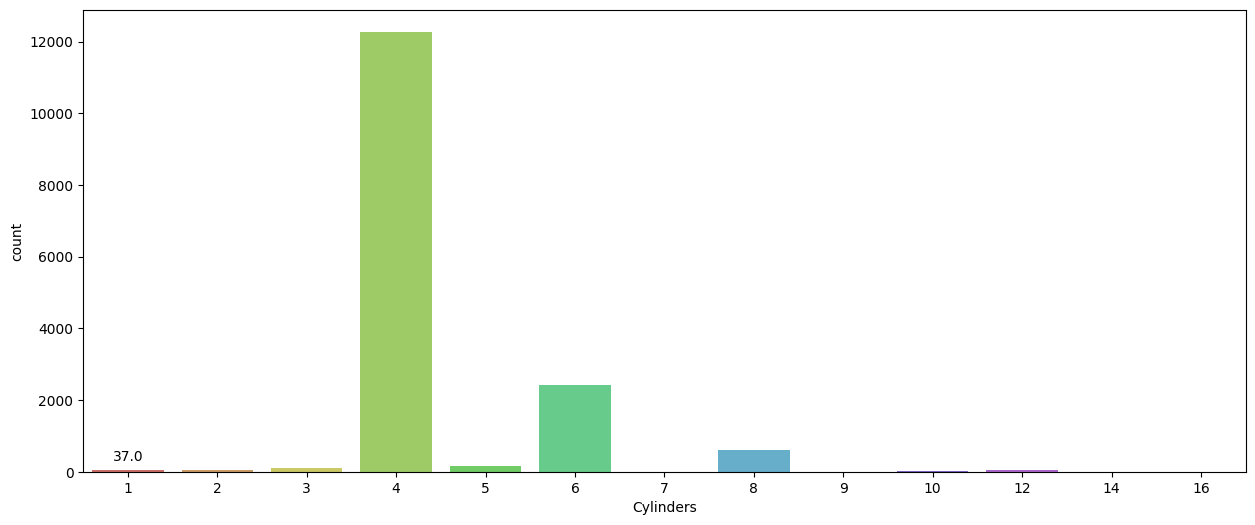

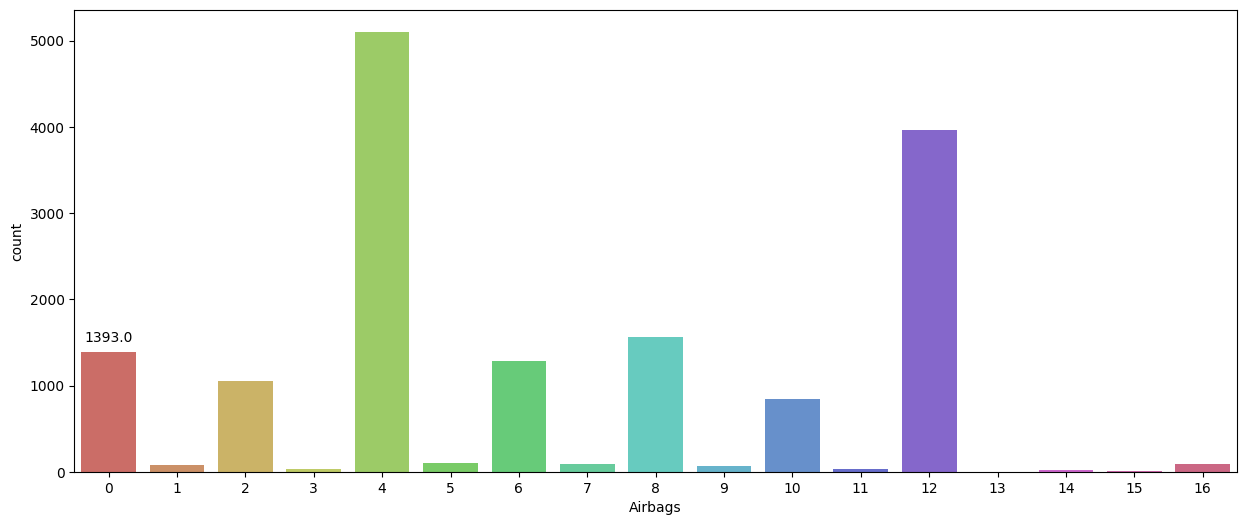

In [ ]:
for i in discrete :
  plt.figure(figsize = (15, 6))
  ax = sns.countplot(x = i, data = df, palette = 'hls')

  for p in ax.patches :
    height = p.get_height()
    ax.annotate(f'{height}',
                xy = (p.get_x() + p.get_width()/2., height),
                xytext = (0, 10),
                textcoords = 'offset points',
                ha = 'center', va = 'center' )
    plt.show()

In [ ]:
## plotly is a  module that helps us in interactive data visualization
import plotly.express as px

for i in discrete :
  counts = df[i].value_counts()
  fig = px.pie(counts, values = counts.values, names = counts.index, title =f'Distribution of {i}')
  fig.show()

In [ ]:
for i in categorical :
  counts = df[i].value_counts()
  fig = px.pie(counts, values = counts.values, names = counts.index, title =f'Distribution of {i}')
  fig.show()

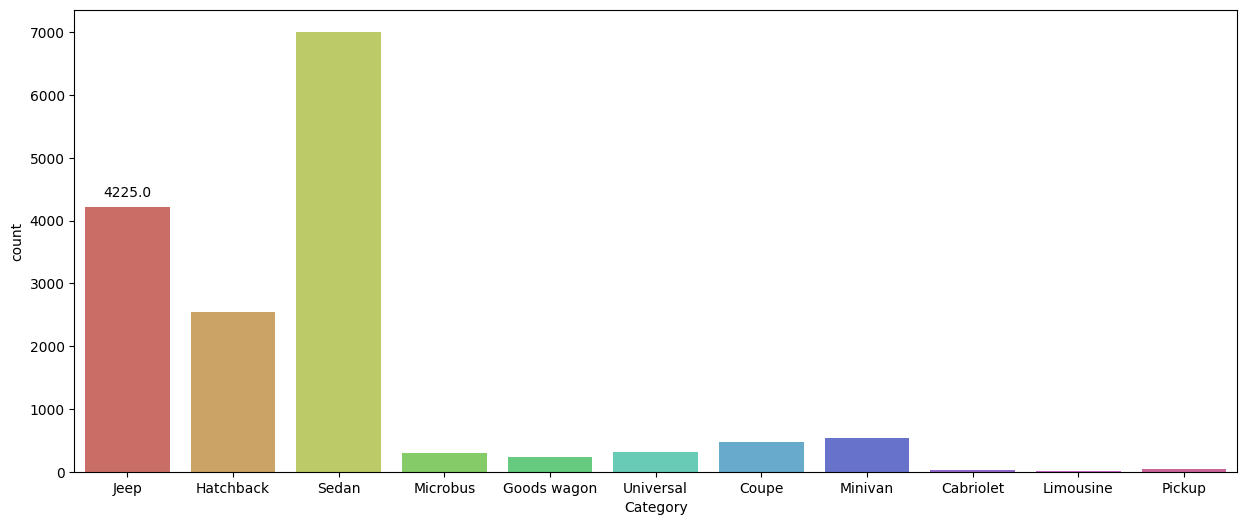

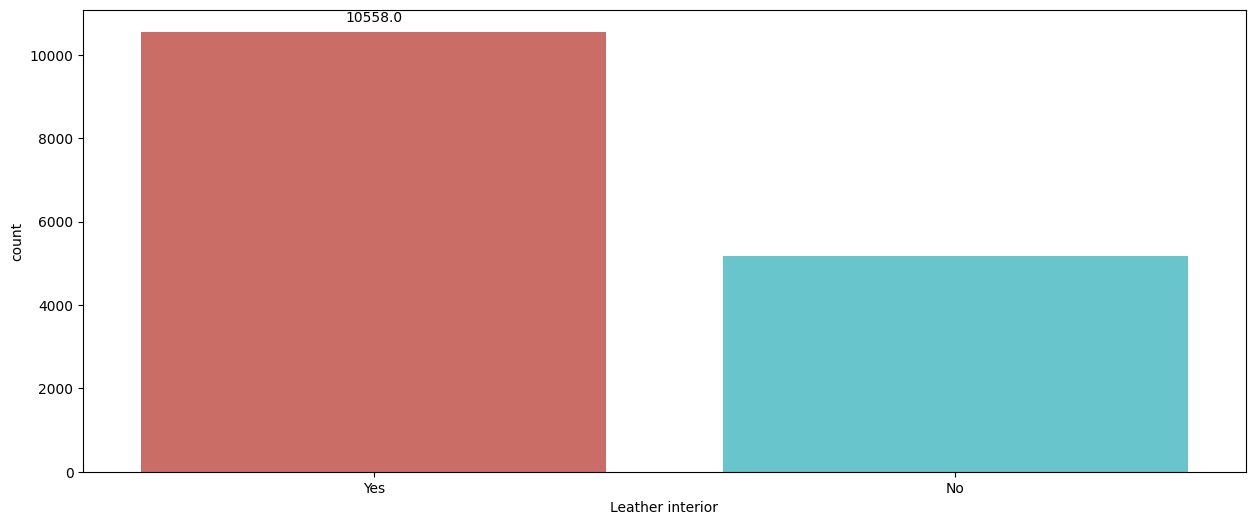

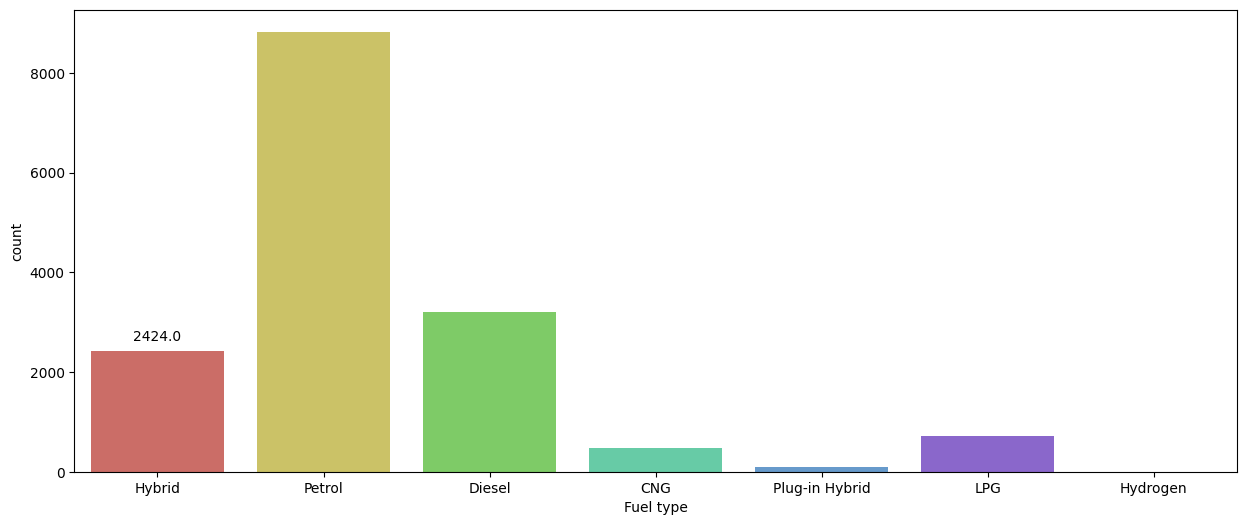

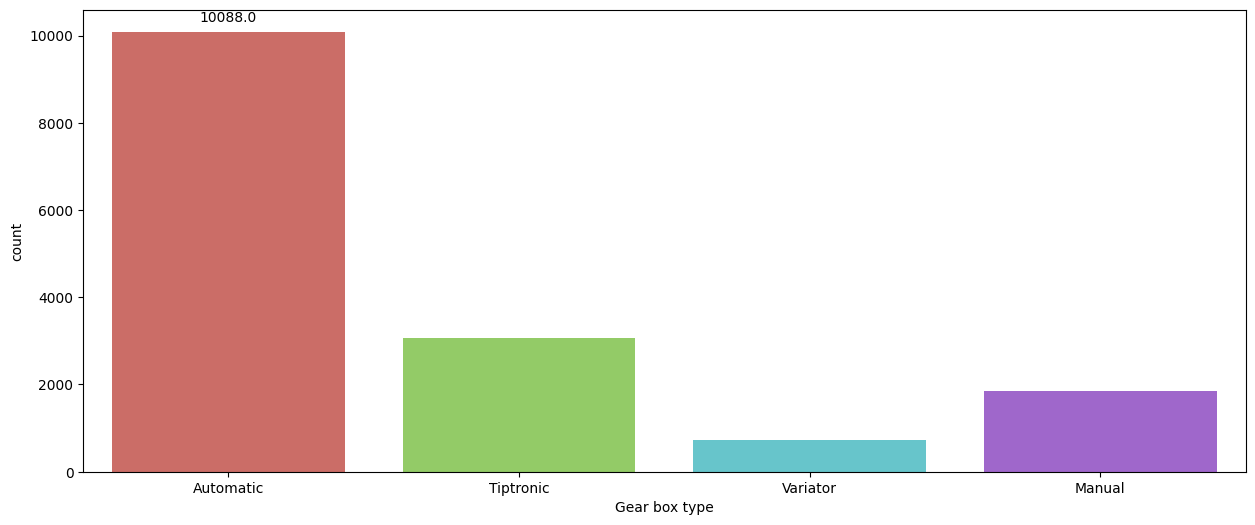

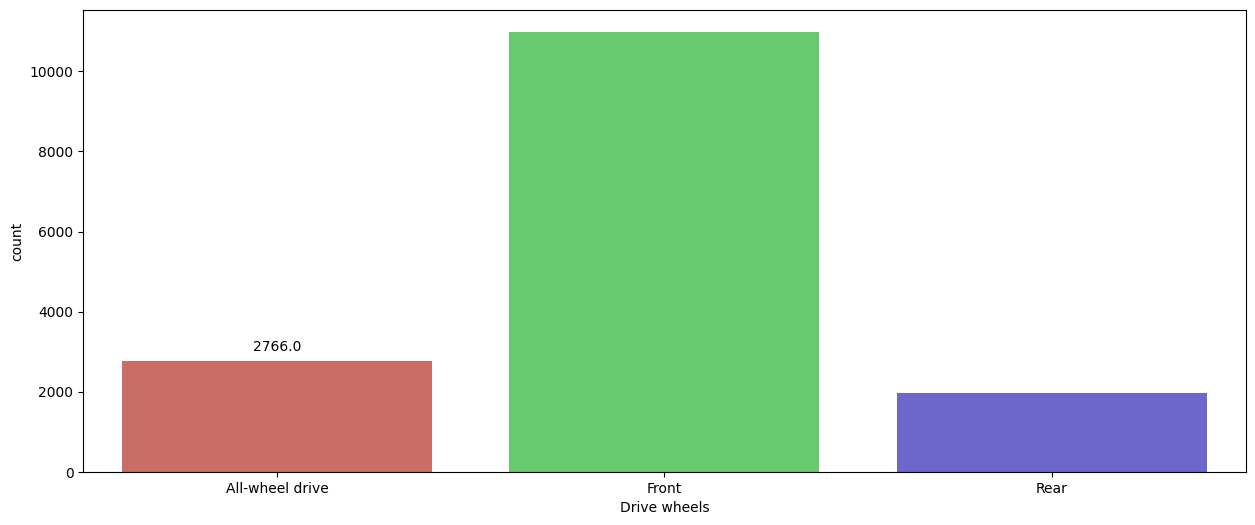

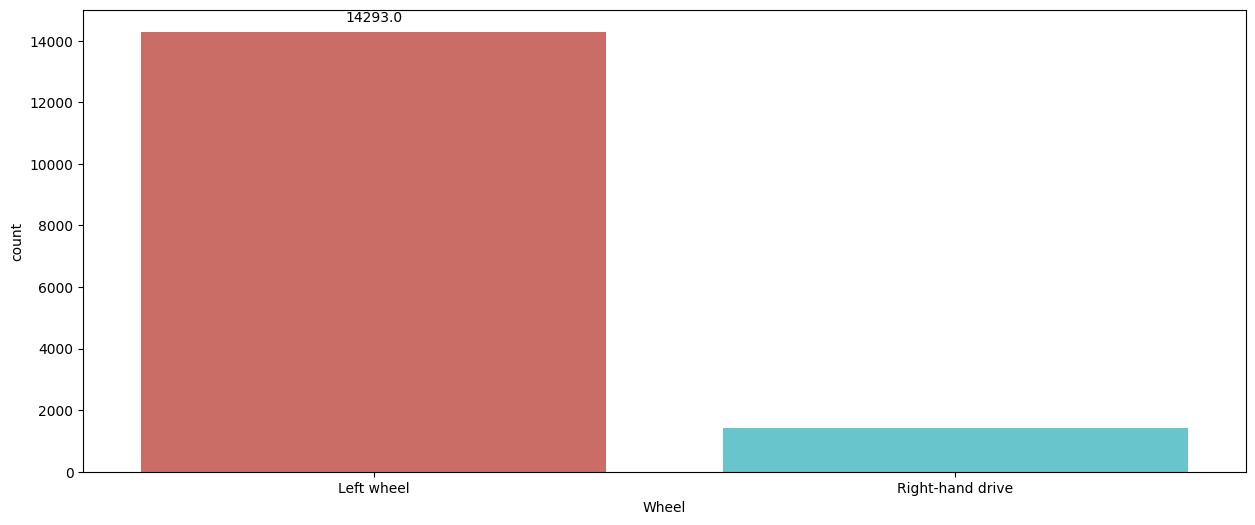

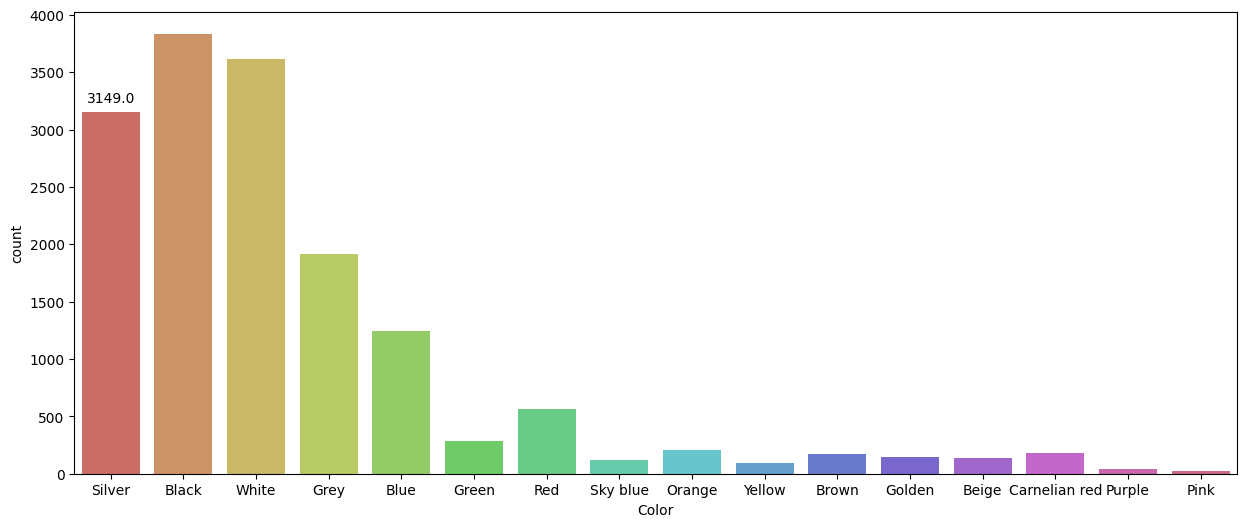

In [ ]:
for i in categorical :
  plt.figure(figsize = (15, 6))
  ax = sns.countplot(x = i, data = df, palette = 'hls')

  for p in ax.patches :
    height = p.get_height()
    ax.annotate(f'{height}',
                xy = (p.get_x() + p.get_width()/2., height),
                xytext = (0, 10),
                textcoords = 'offset points',
                ha = 'center', va = 'center' )
    plt.show()

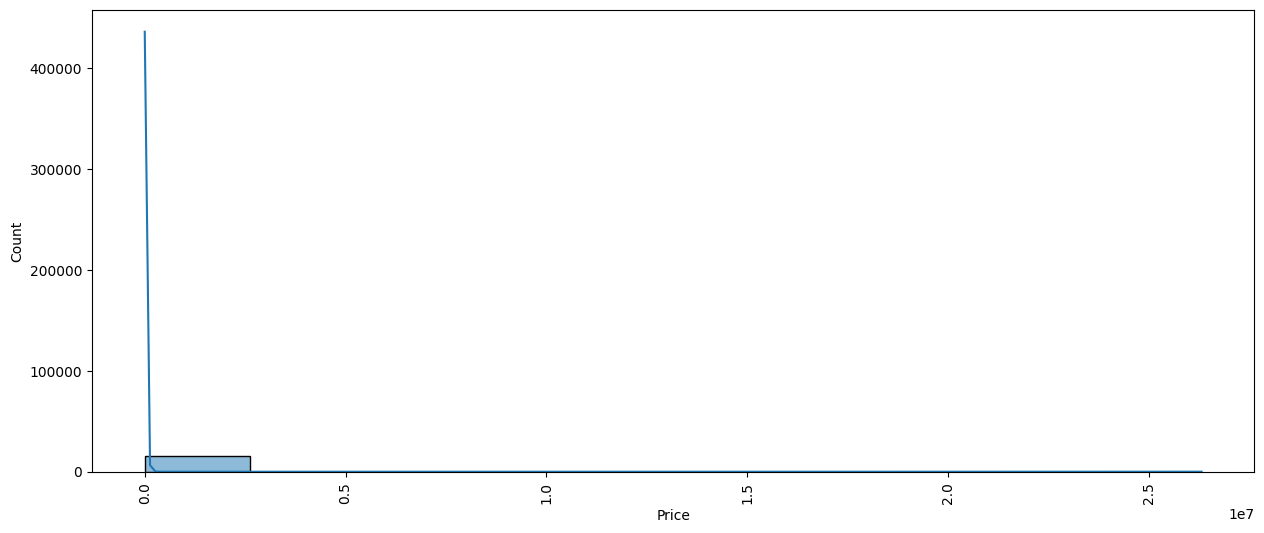

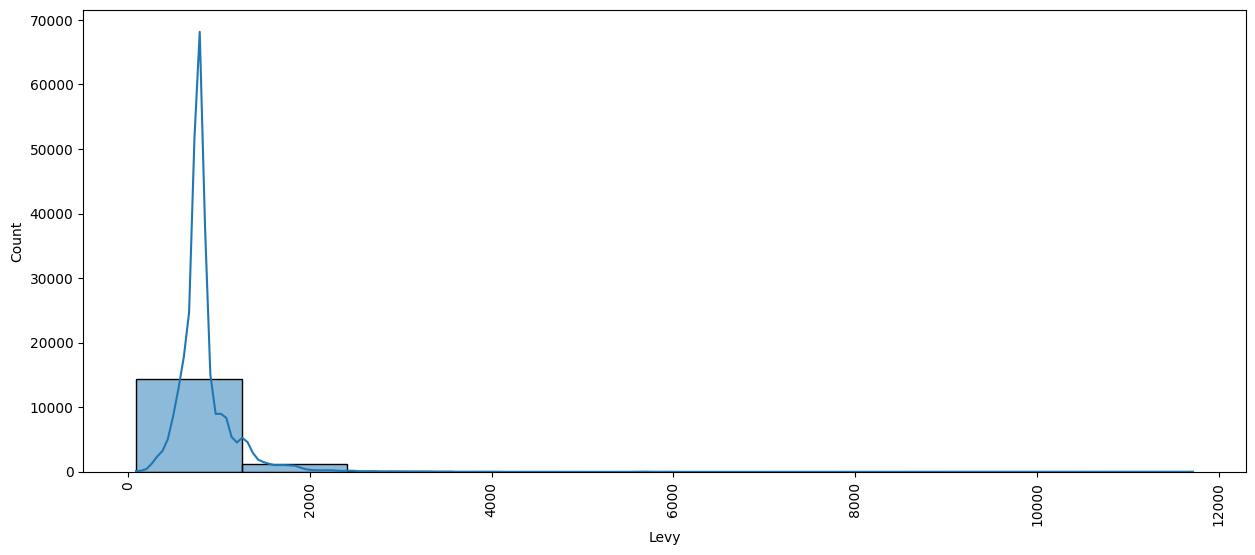

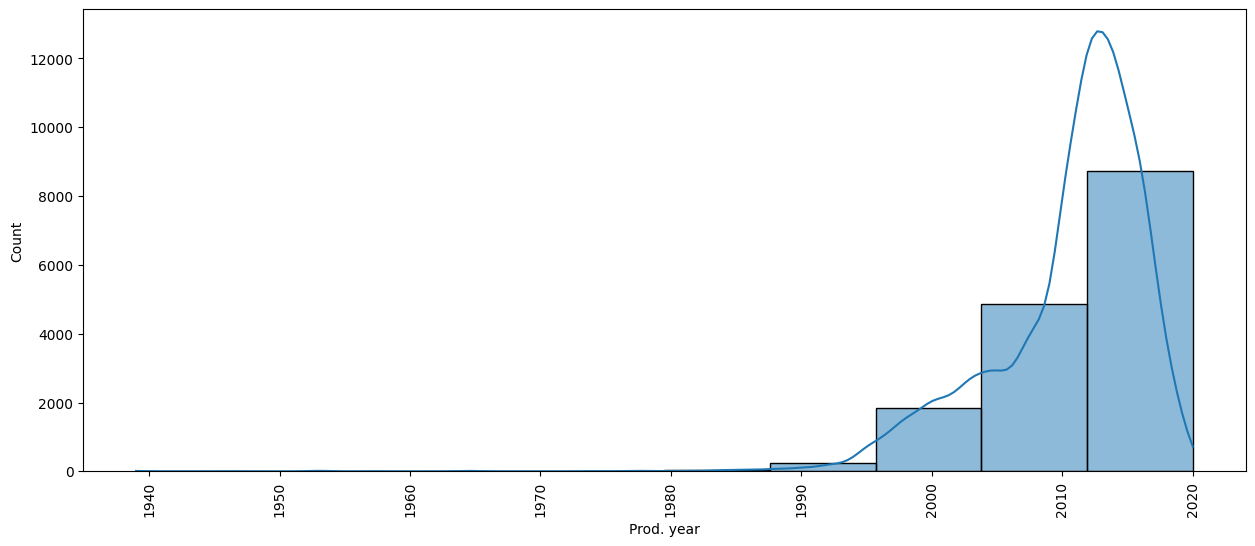

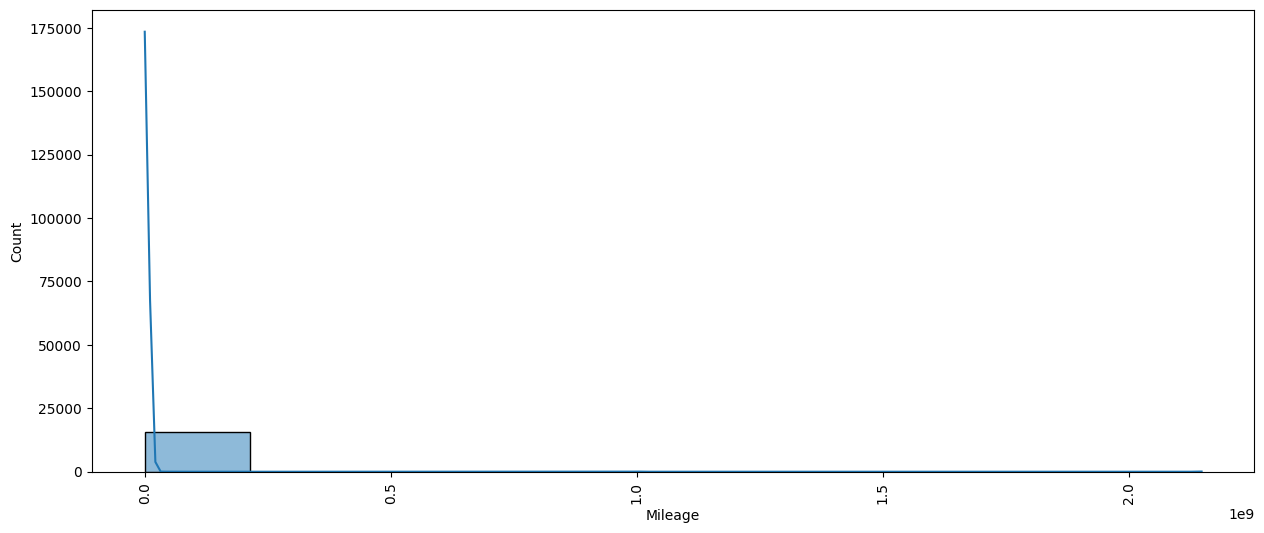

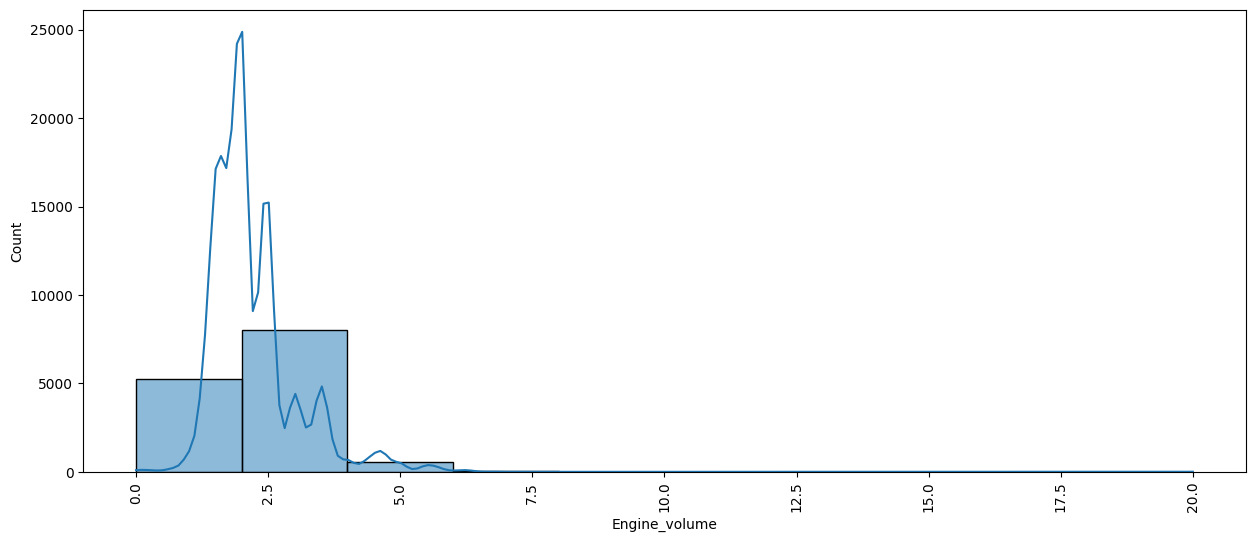

In [ ]:
for i in continuous :
  plt.figure(figsize = (15, 6))
  sns.histplot(df[i], bins = 10, kde = True, palette = 'hls')
  plt.xticks(rotation = 90)
  plt.show()

  ## kde (Kernel(Normal) Density Estimation)(That means we are finding that if the distribution is normal or not or is it close to the normal distribution)  gives us the distribution of the data.
  ##It gives us an idea that whether the data is left skewed , right skewed or normal (We want the normal data).
  ## The Normal Distriution is symmetric, not skewed.

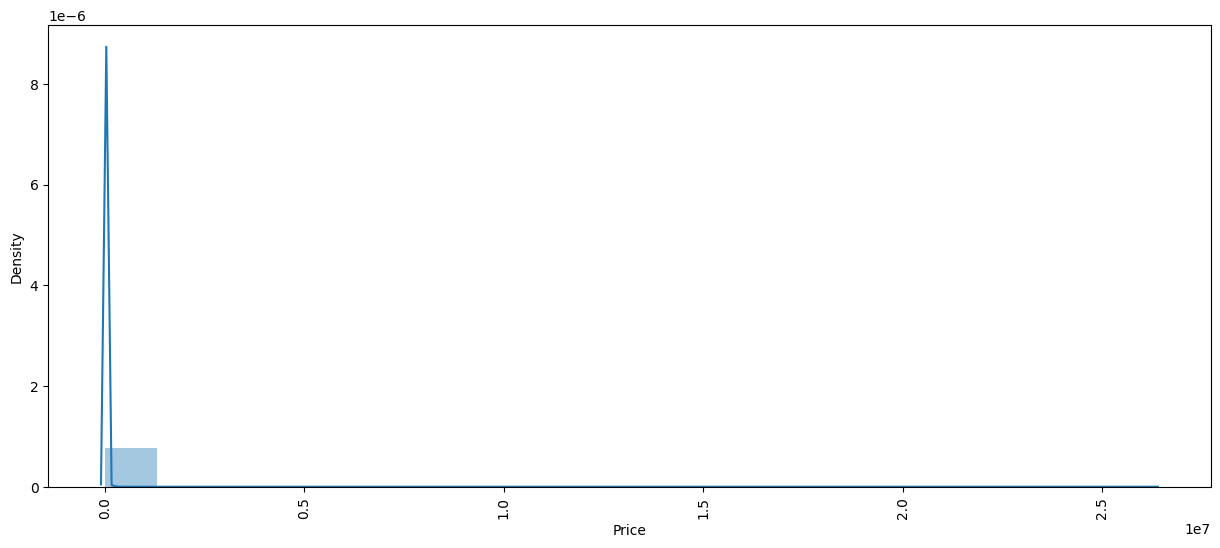

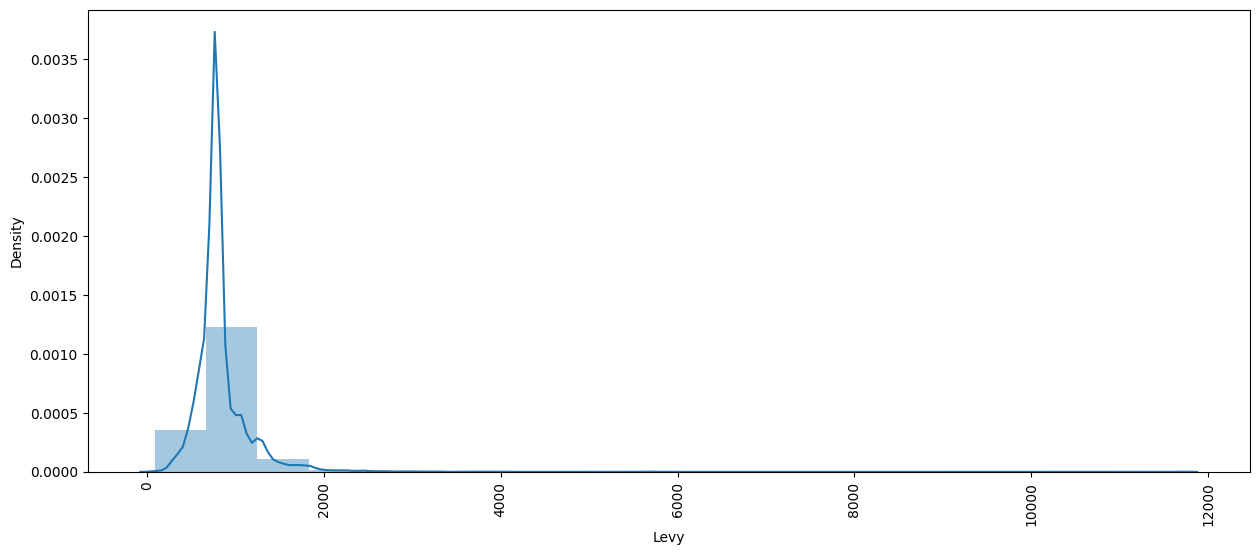

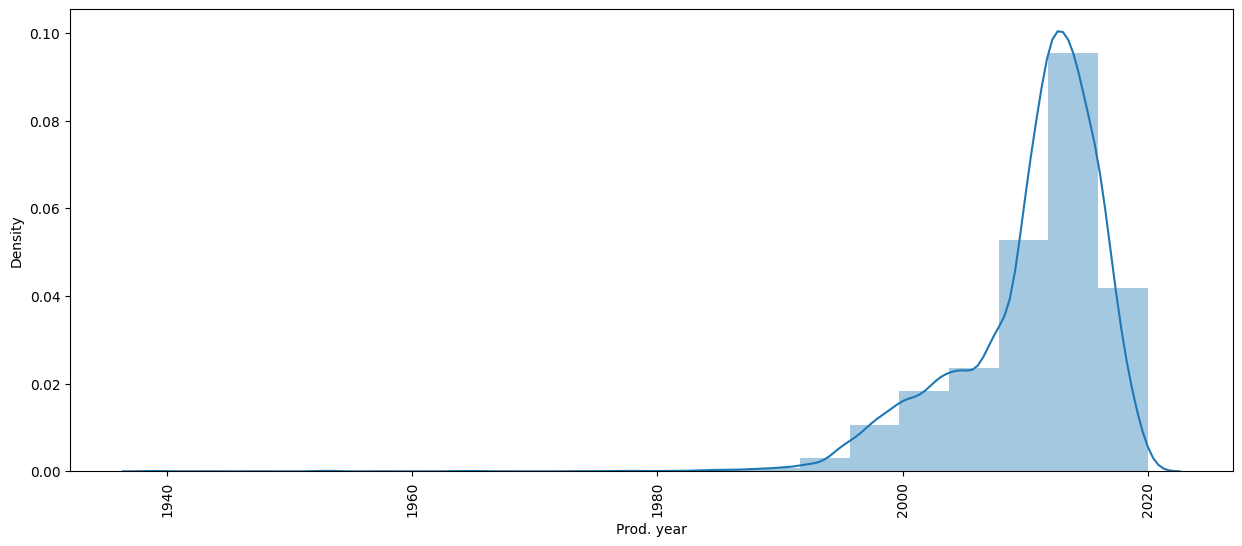

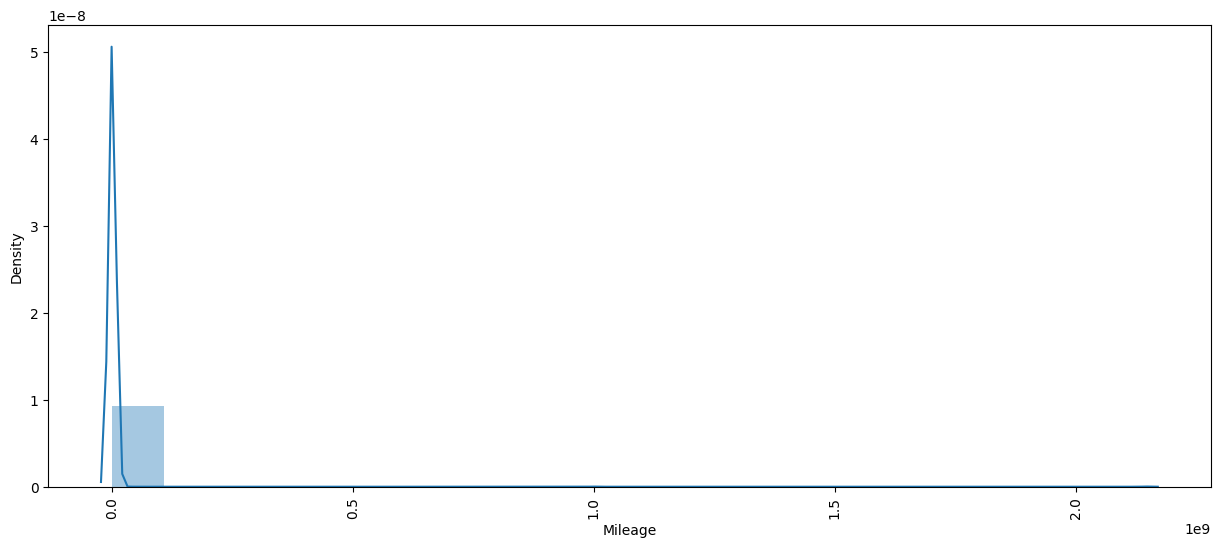

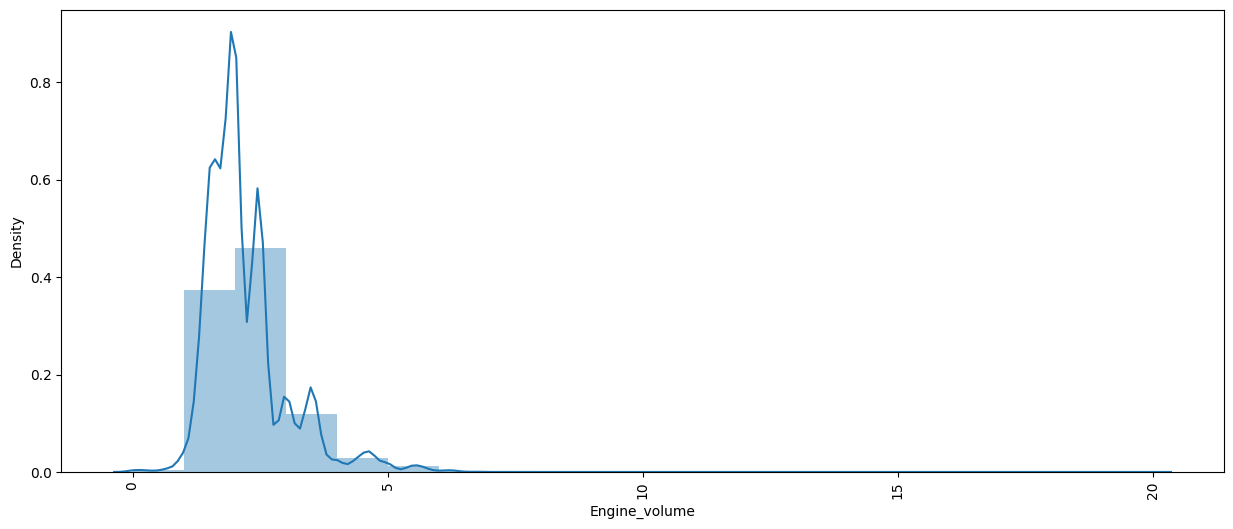

In [ ]:
## If the total distribution is 1 then how much percentage 0 to 5 range of values is holding is density.

for i in continuous :
  plt.figure(figsize = (15, 6))
  sns.distplot(df[i], bins = 20, kde = True)
  plt.xticks(rotation = 90)
  plt.show()

In [ ]:
## probabilily Density Function is a function which is defined over a distribution which is continuous.
## This describes the likelihood of a random variable X taking upon a value from this continuous  range.

## skewness - Degree of Asymmetry and Kurtosis - Degree of Peakedness(flatness)

##                                       Mean                                                             Median                                                                              Mode
##  +ve skewness              greater than median, mode                       greater than mode less than mean                                          less than mean and median
## -ve skeweness              less than median, mode                            greater than mean less than mode                                          greater than mean and median


## Kurtosis :         1. Mesokurtic - there is symmetry. (the peak is normal)
##                          2. Leptokurtic - The peak is maximum(higher kurtosis)(The data is spread in a certain region)
##                          3. Plattykurtic - The peak is low(low kurtosis)

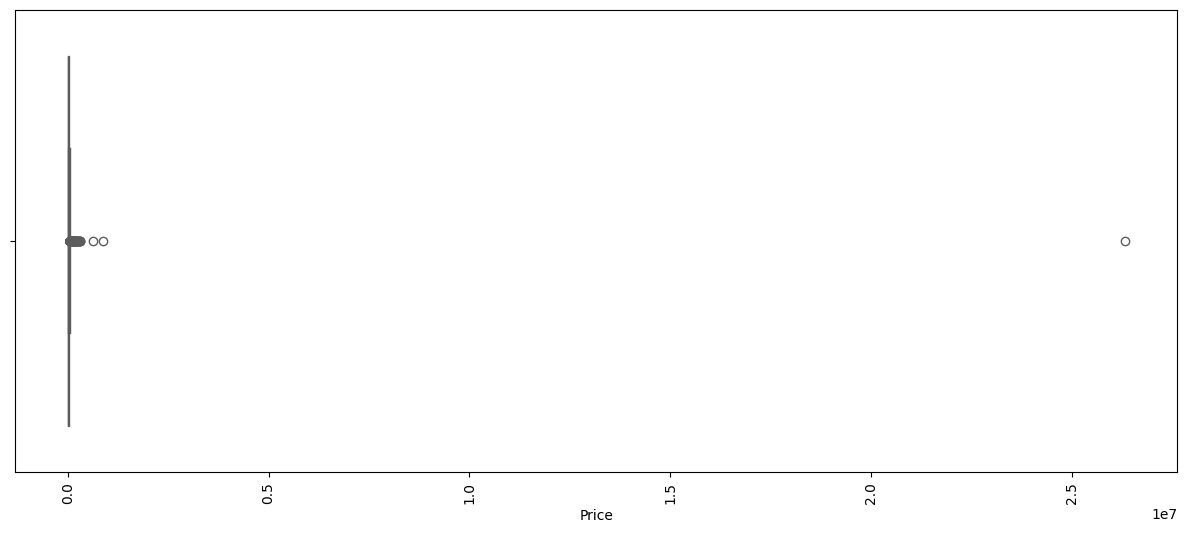

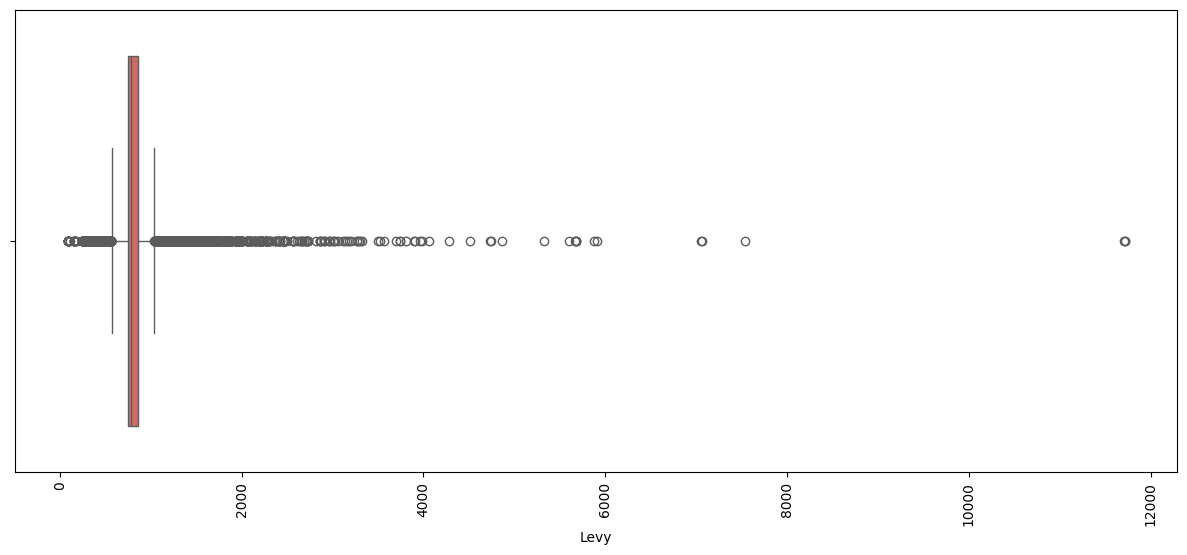

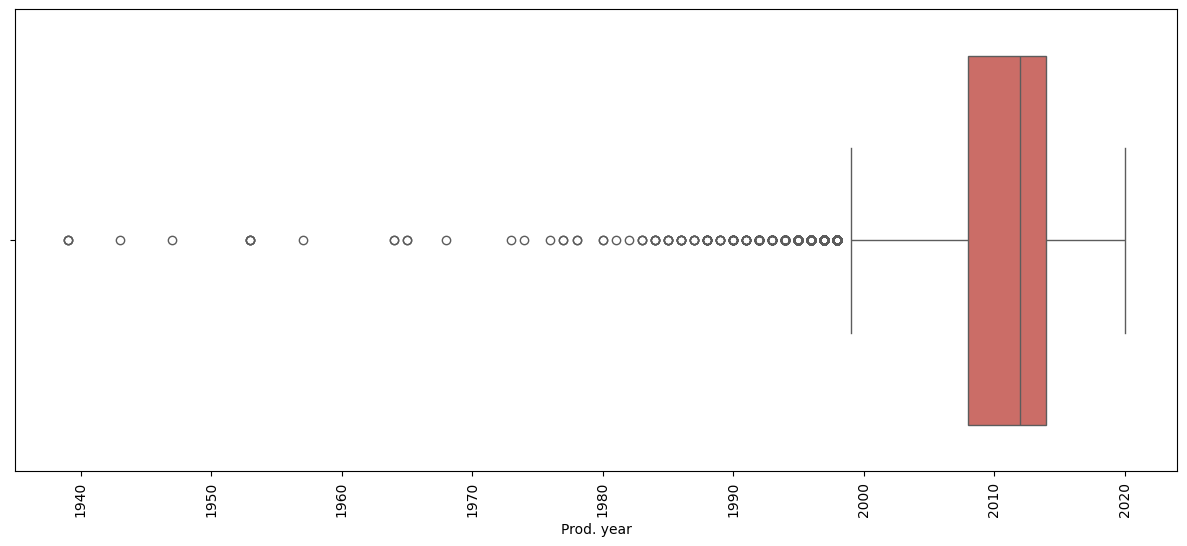

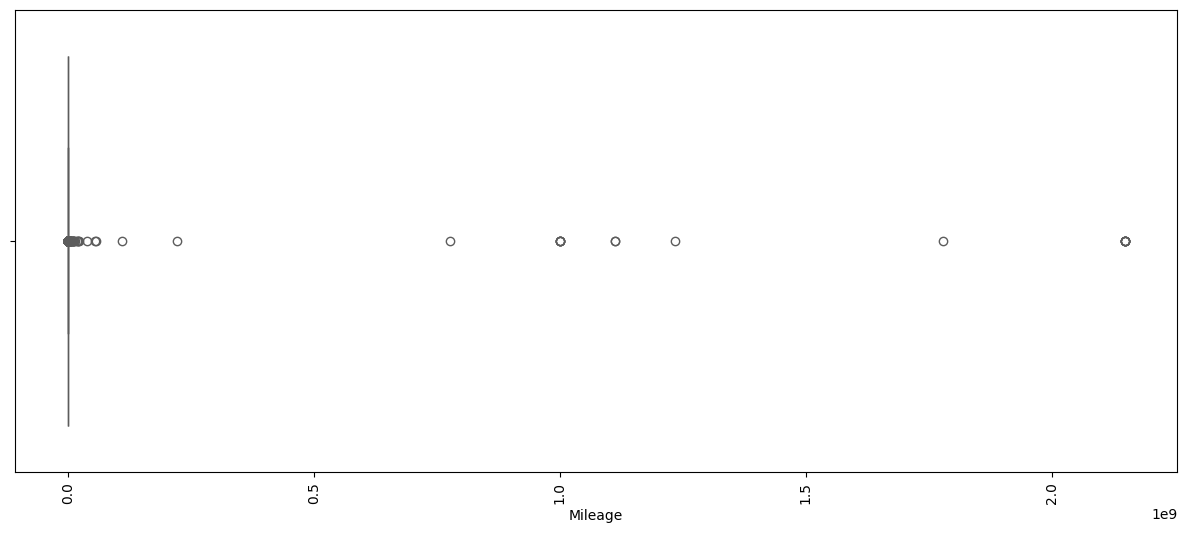

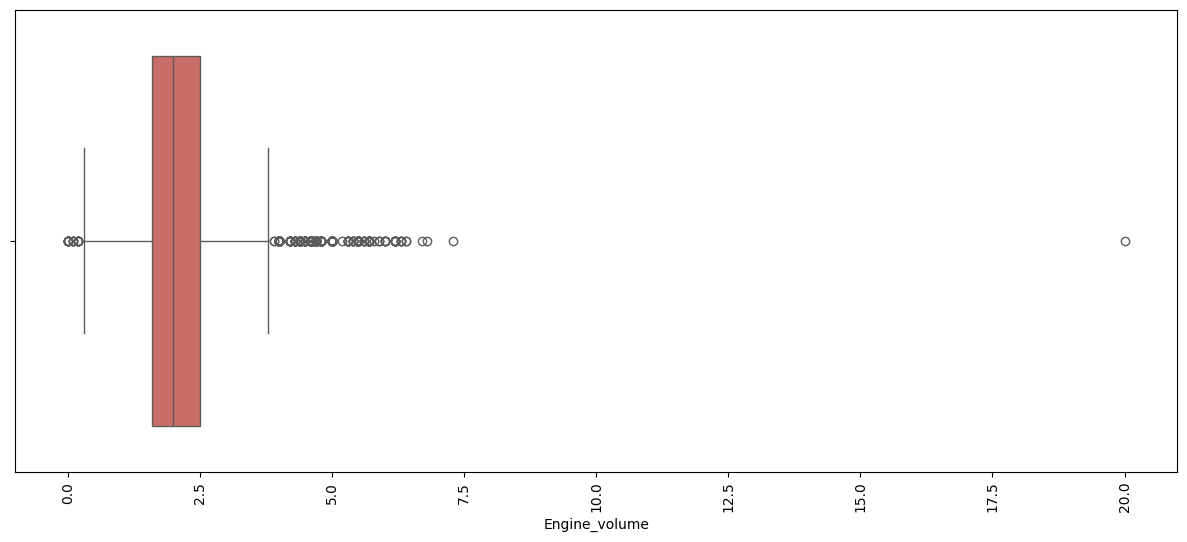

In [ ]:
## Identify the outliers in the data.(for only continuous features)
for i in continuous :
  plt.figure(figsize = (15, 6))
  sns.boxplot(x = i, data = df, palette = 'hls')
  plt.xticks(rotation = 90)
  plt.show()

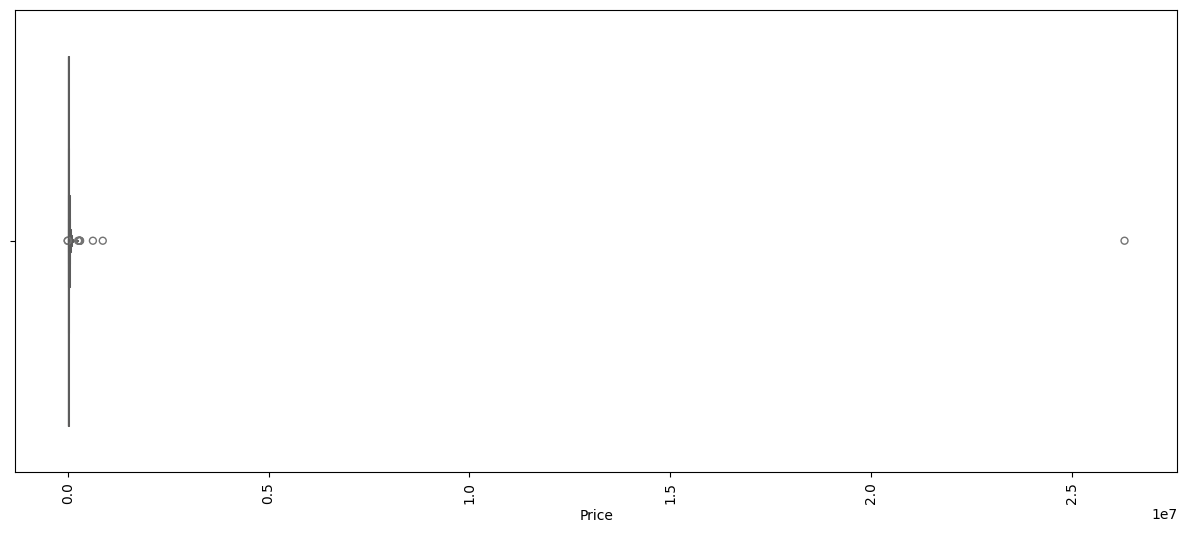

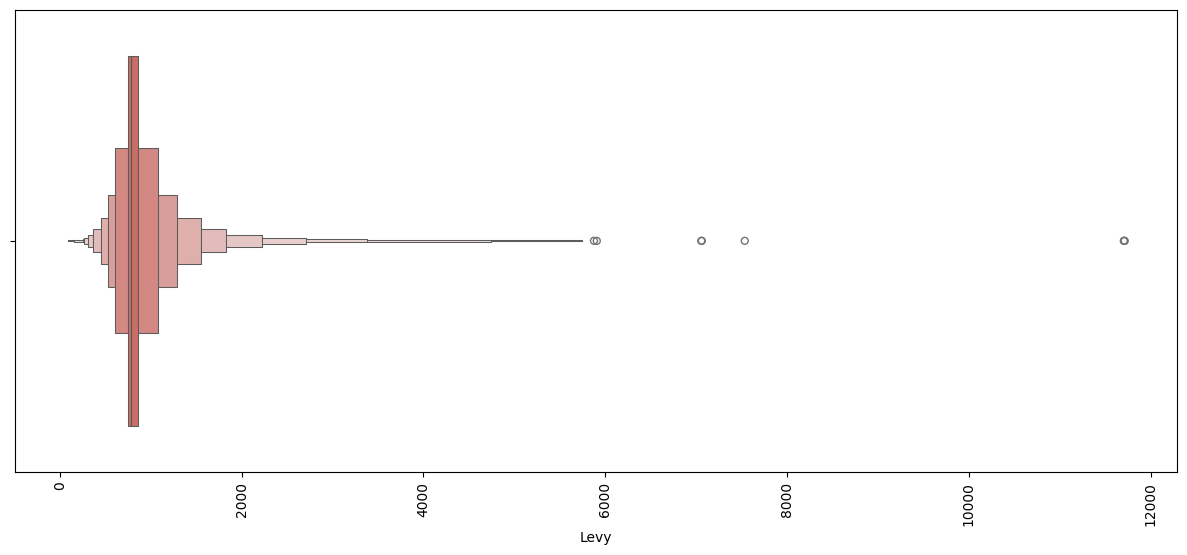

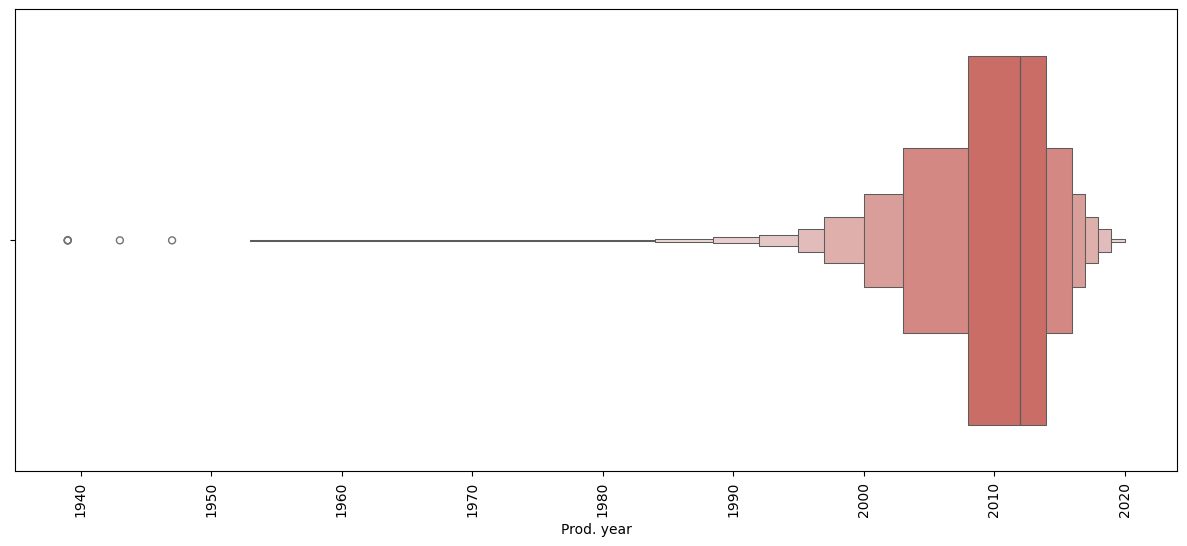

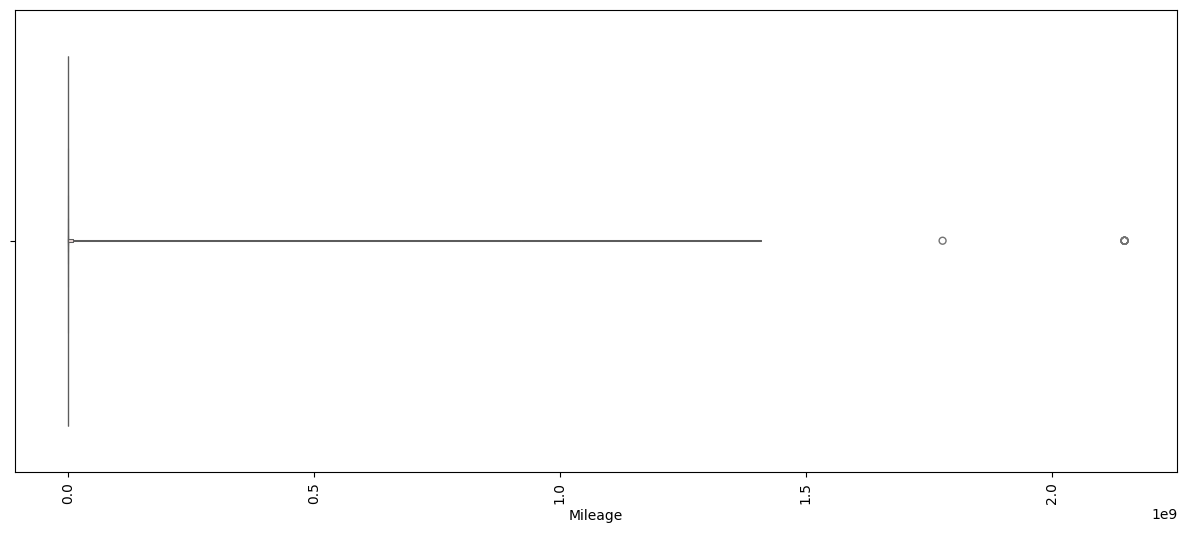

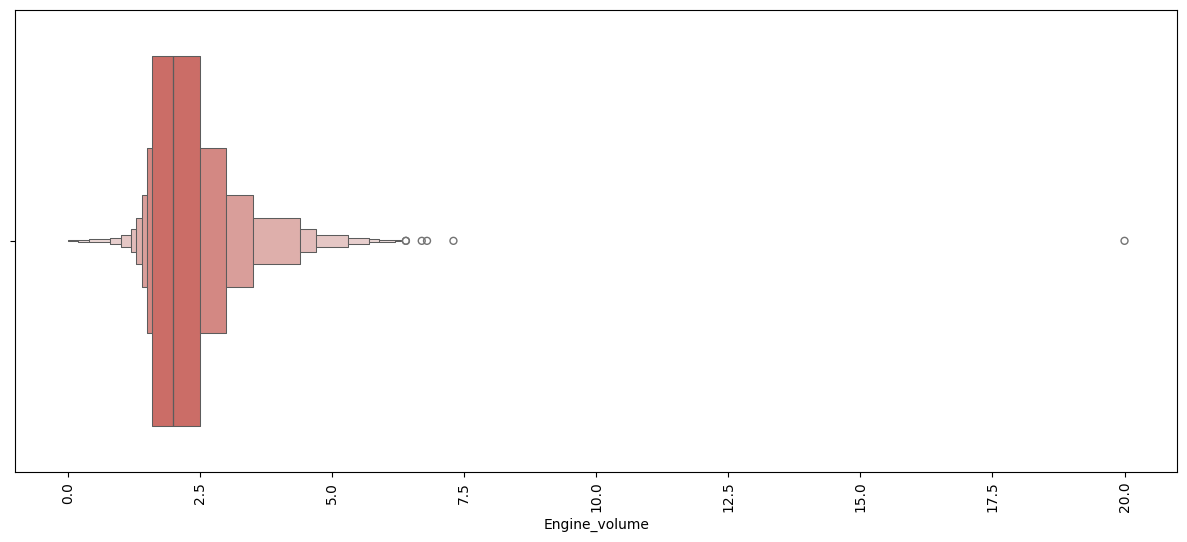

In [ ]:
for i in continuous :
  plt.figure(figsize = (15, 6))
  sns.boxenplot(x = i, data = df, palette = 'hls')
  plt.xticks(rotation = 90)
  plt.show()

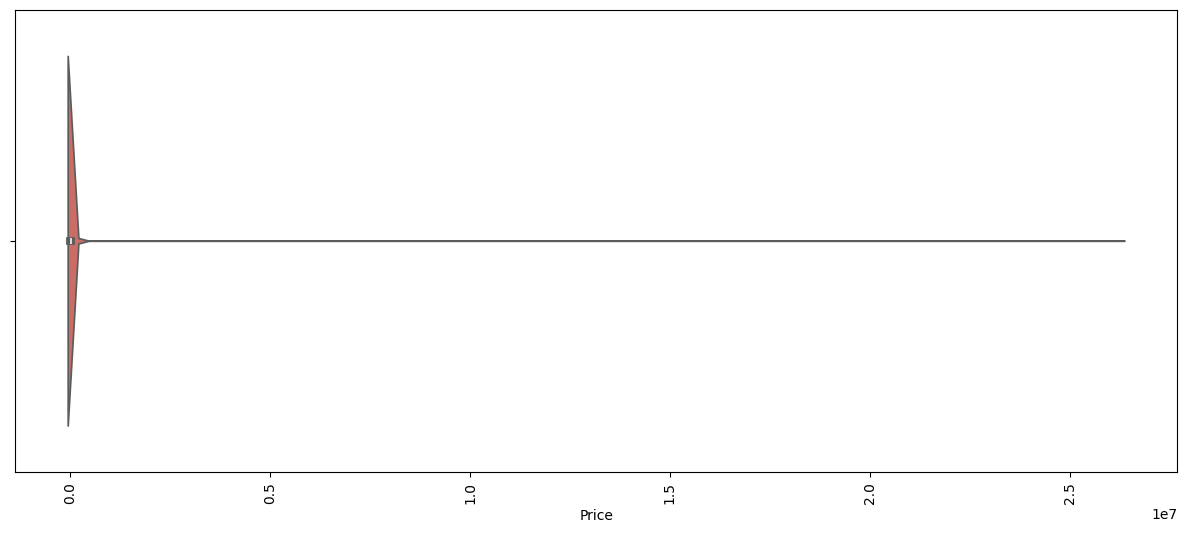

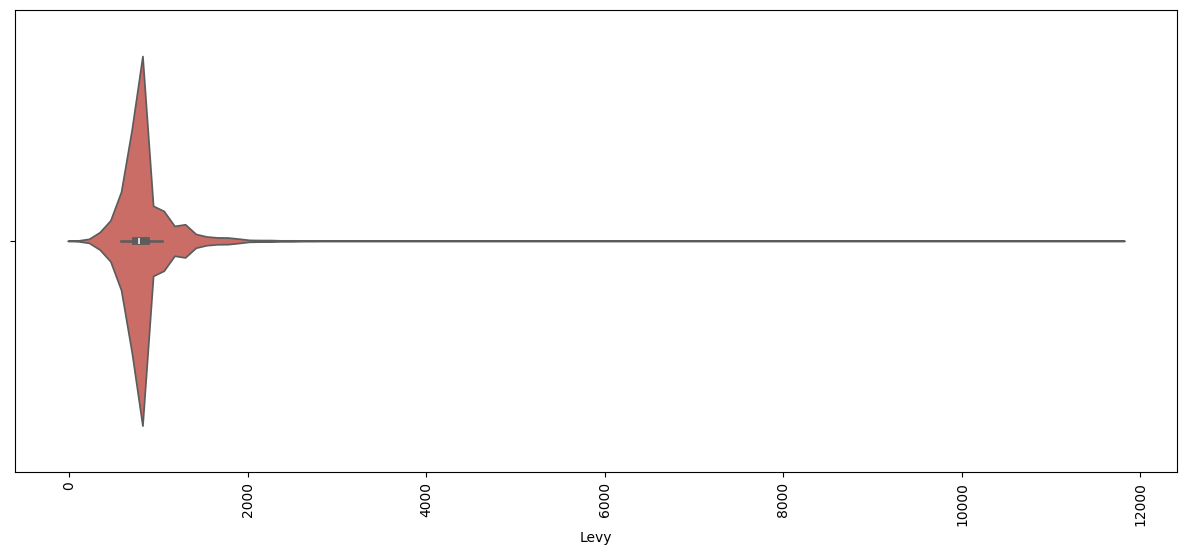

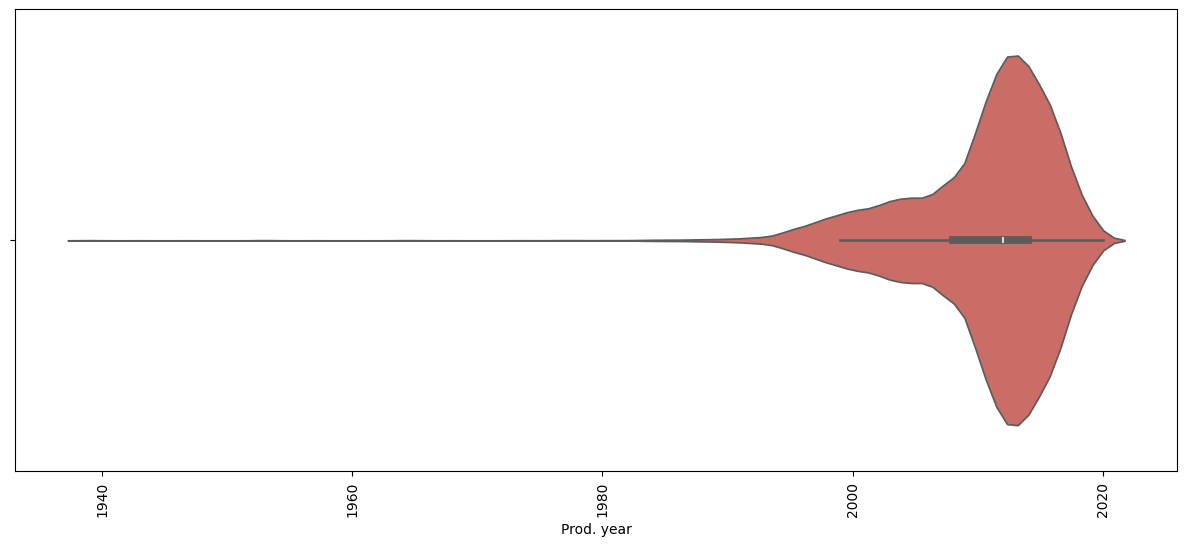

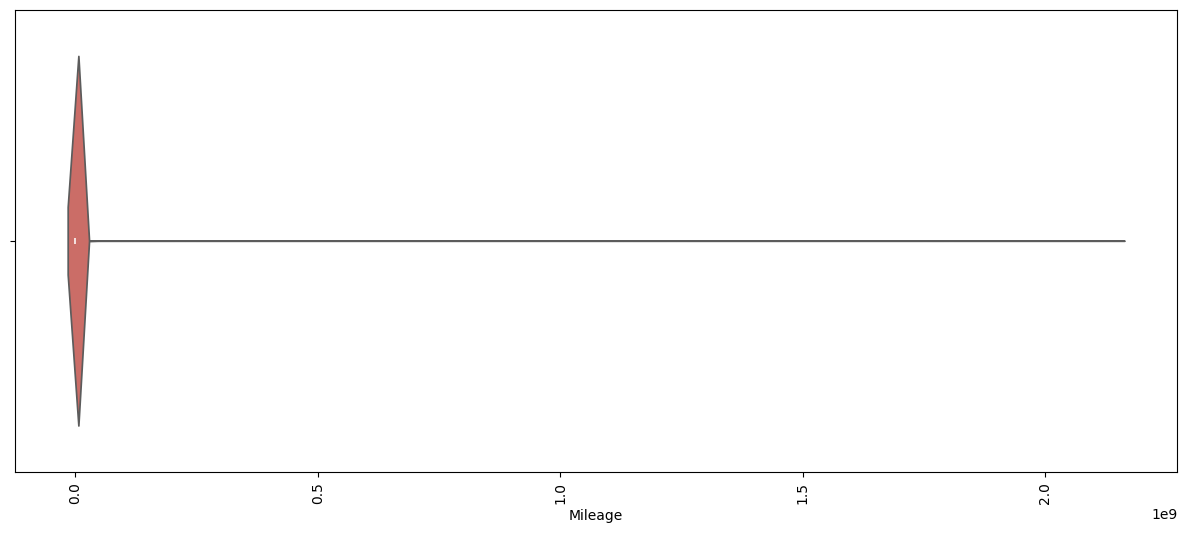

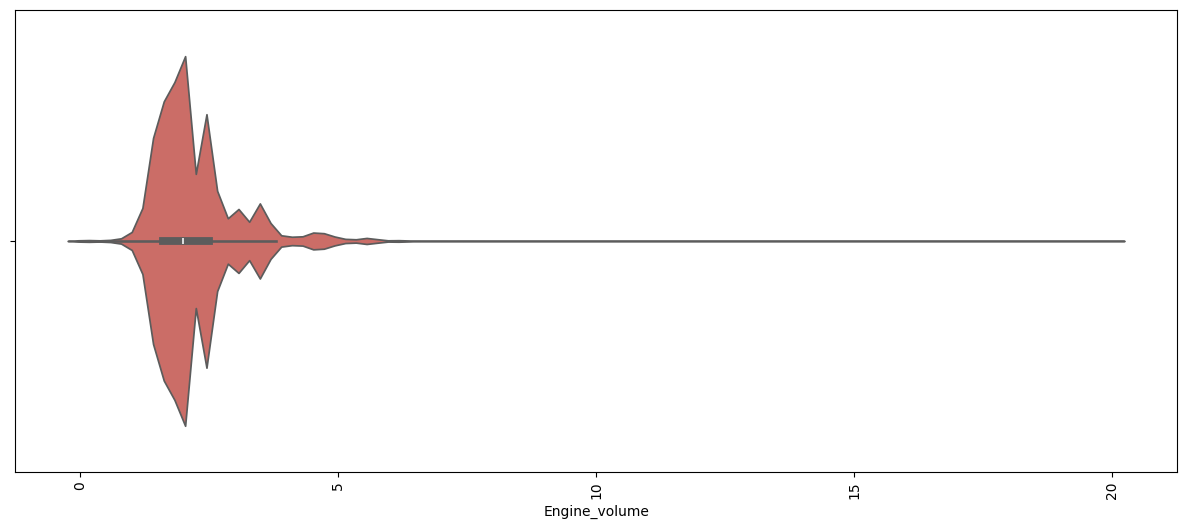

In [ ]:
for i in continuous :
  plt.figure(figsize = (15, 6))
  sns.violinplot(x = i, data = df, palette = 'hls')
  plt.xticks(rotation = 90)
  plt.show()

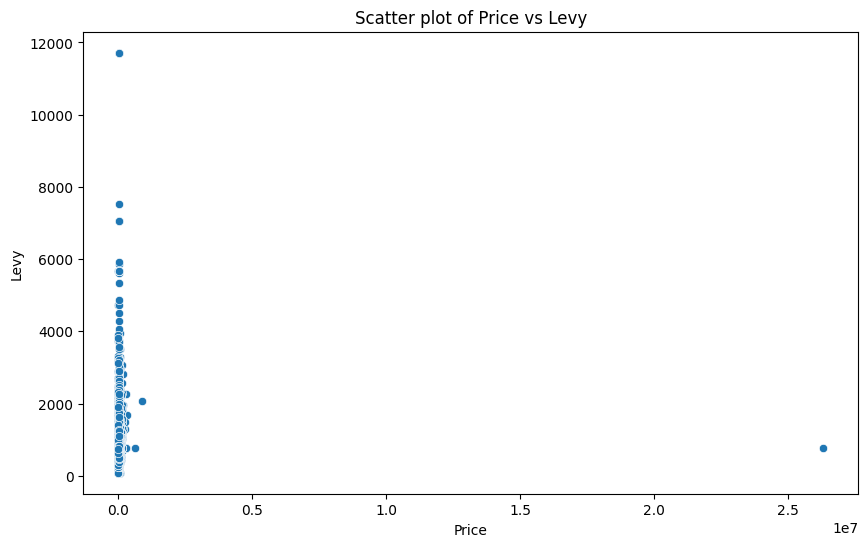

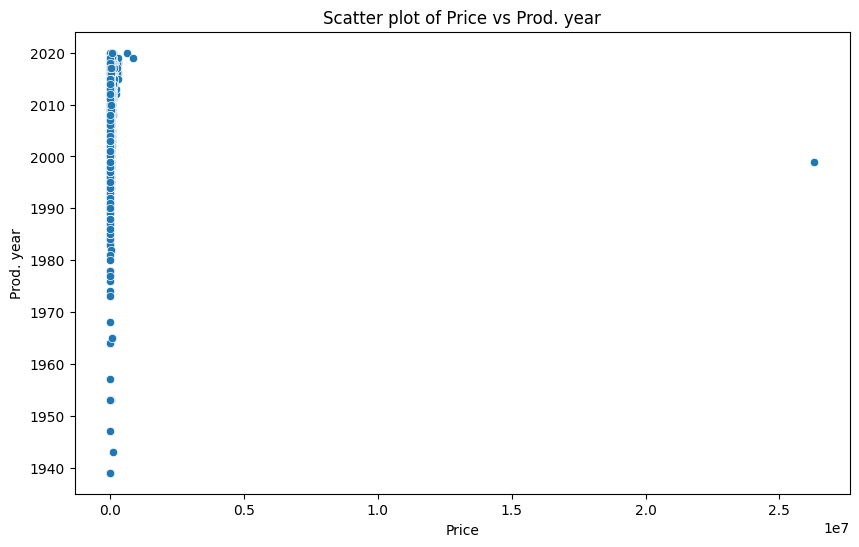

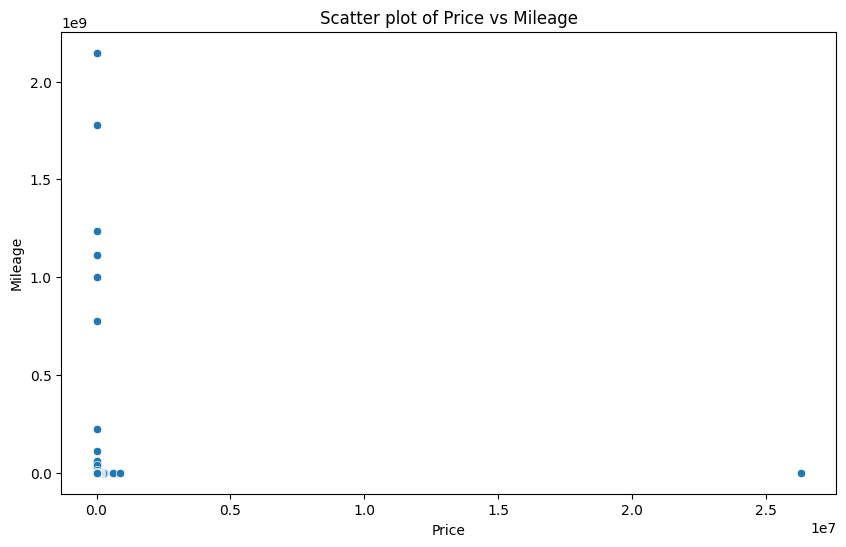

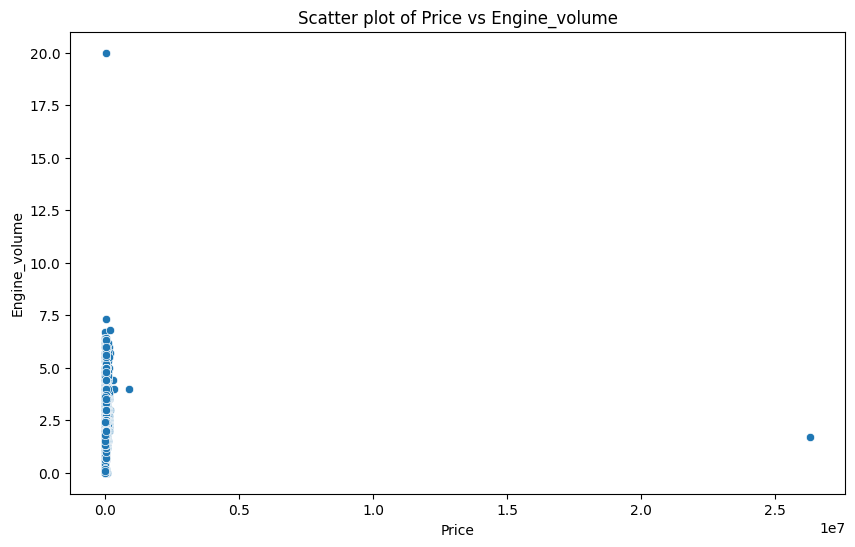

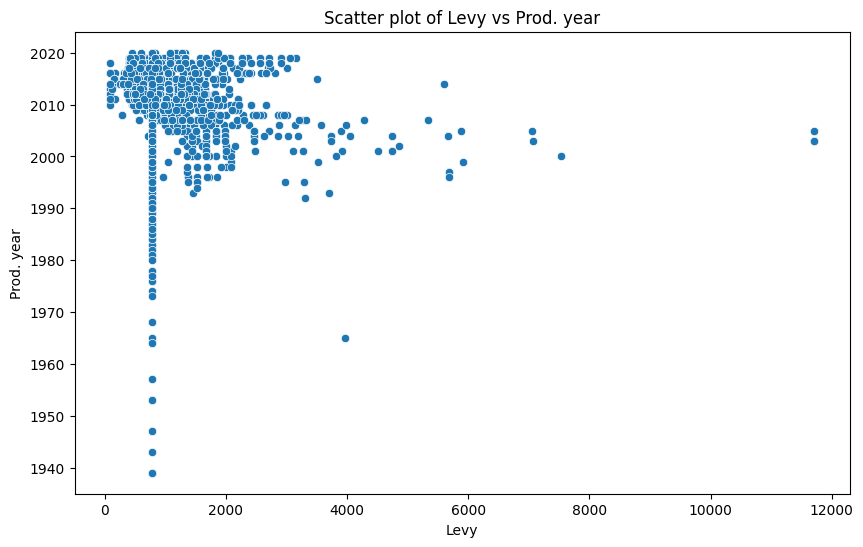

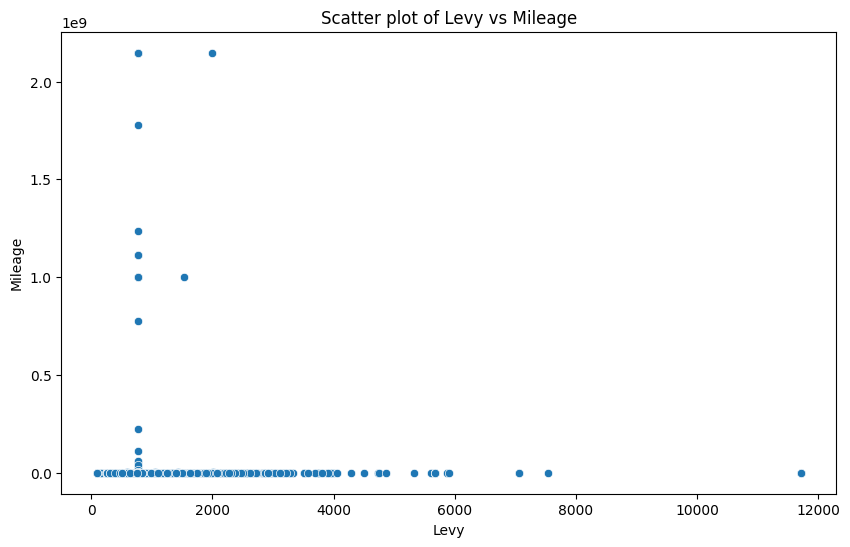

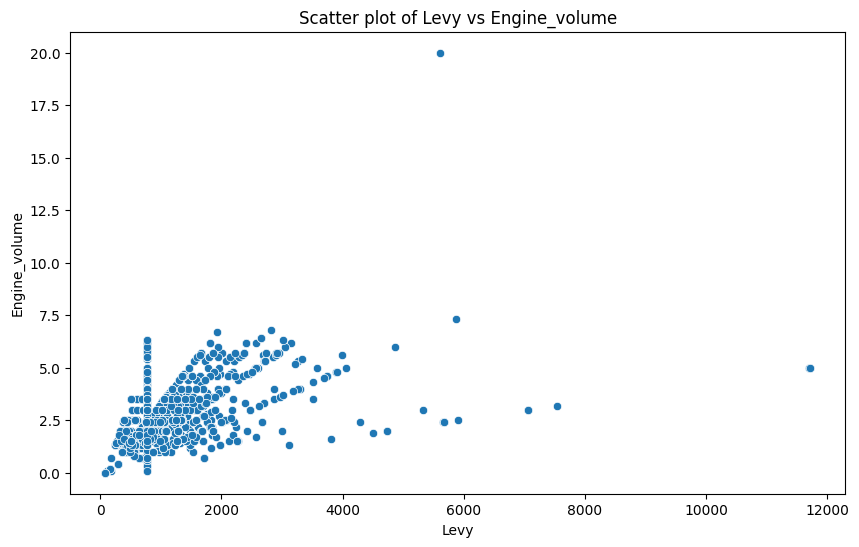

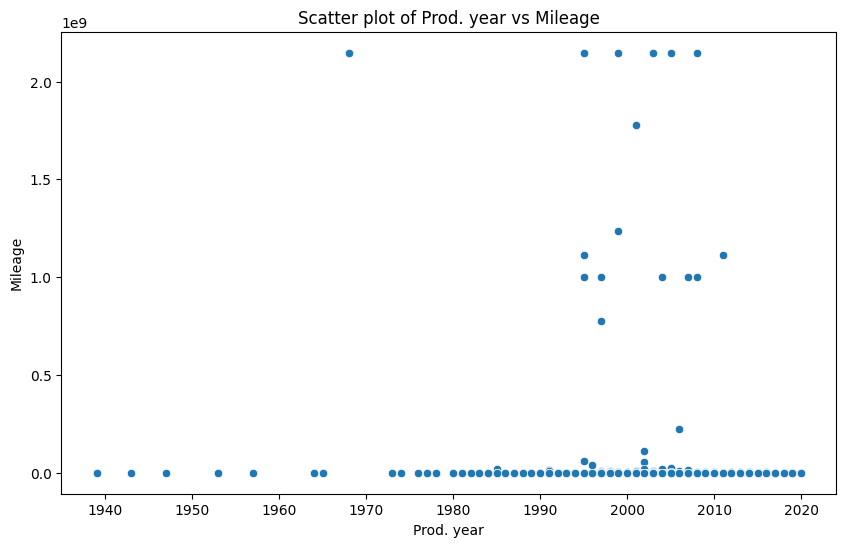

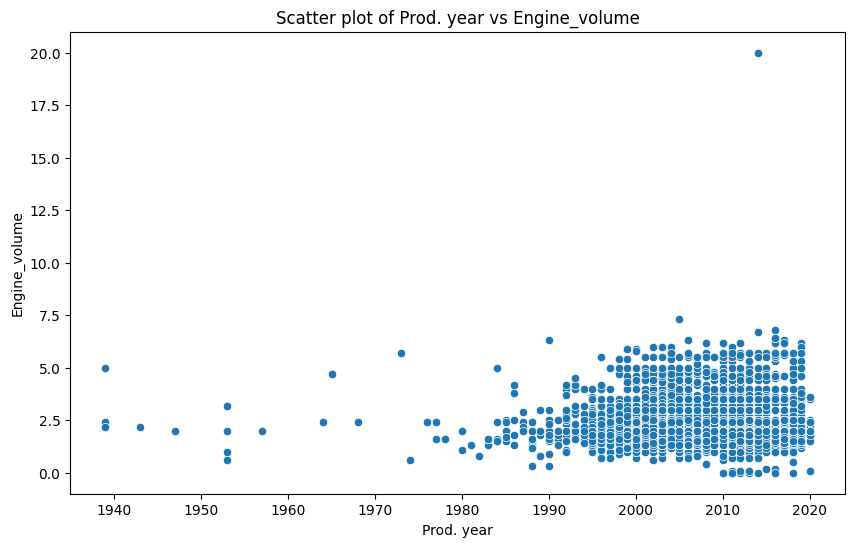

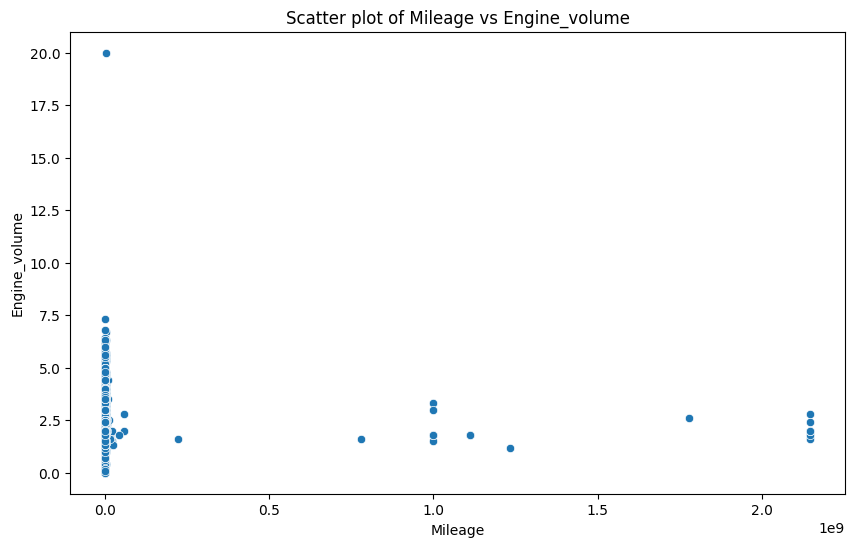

In [ ]:
for i in range(len(continuous)) :
  for j in range(i+1, len(continuous)) :
    plt.figure(figsize = (10, 6))
    sns.scatterplot(x = continuous[i], y = continuous[j], data = df, palette = 'hls')
    plt.title(f'Scatter plot of {continuous[i]} vs {continuous[j]}')
    plt.show()

In [ ]:
##for i in range(len(continuous)) :
##for j in range(i+1, len(continuous)) :
##plt.figure(figsize = (10, 6))
##sns.lineplot(x = continuous[i], y = continuous[j], data = df, palette = 'hls')
##plt.title(f'Scatter plot of {continuous[i]} vs {continuous[j]}')
##plt.show()

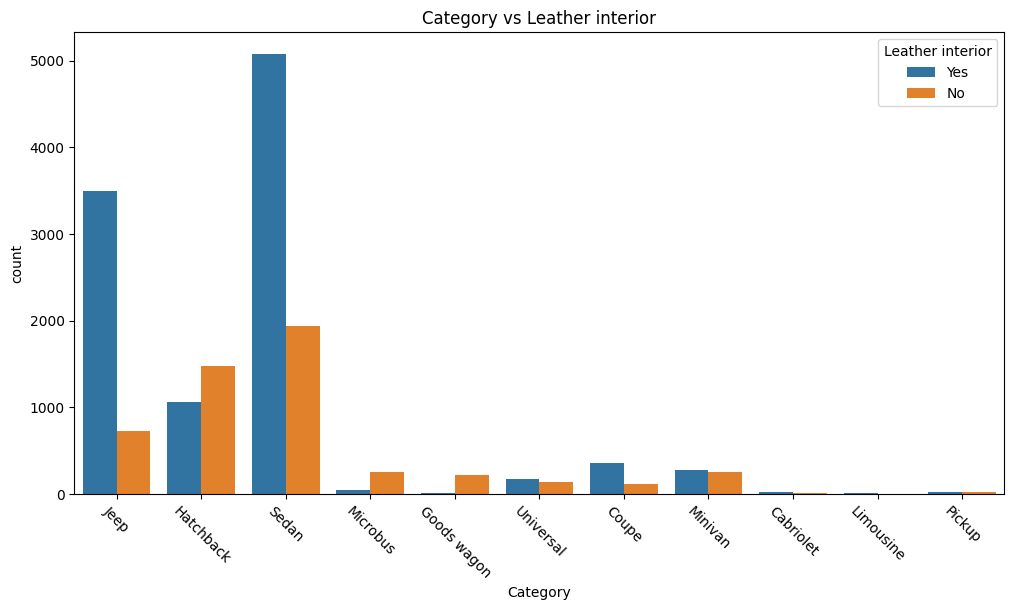

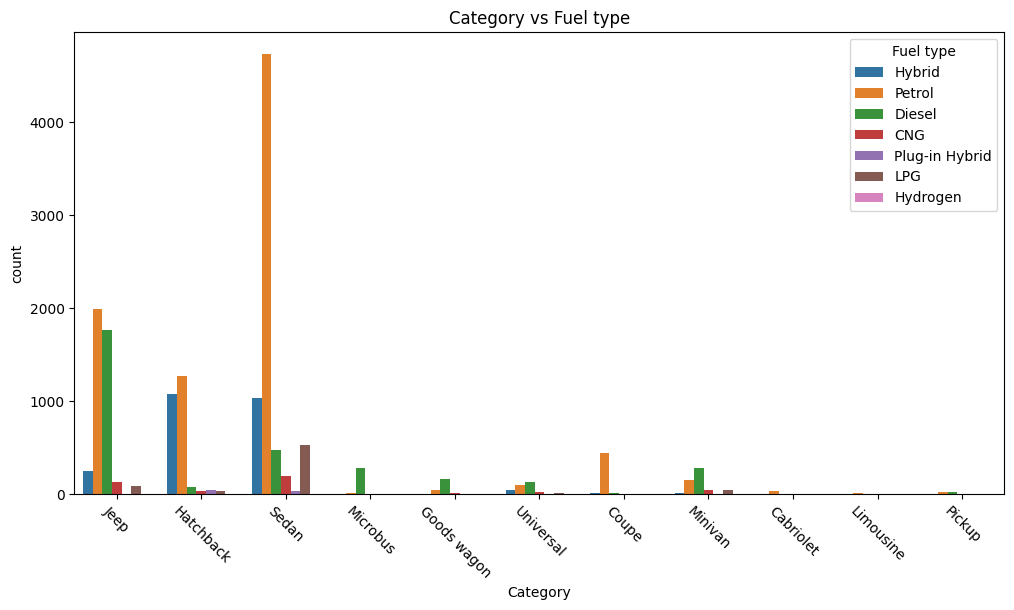

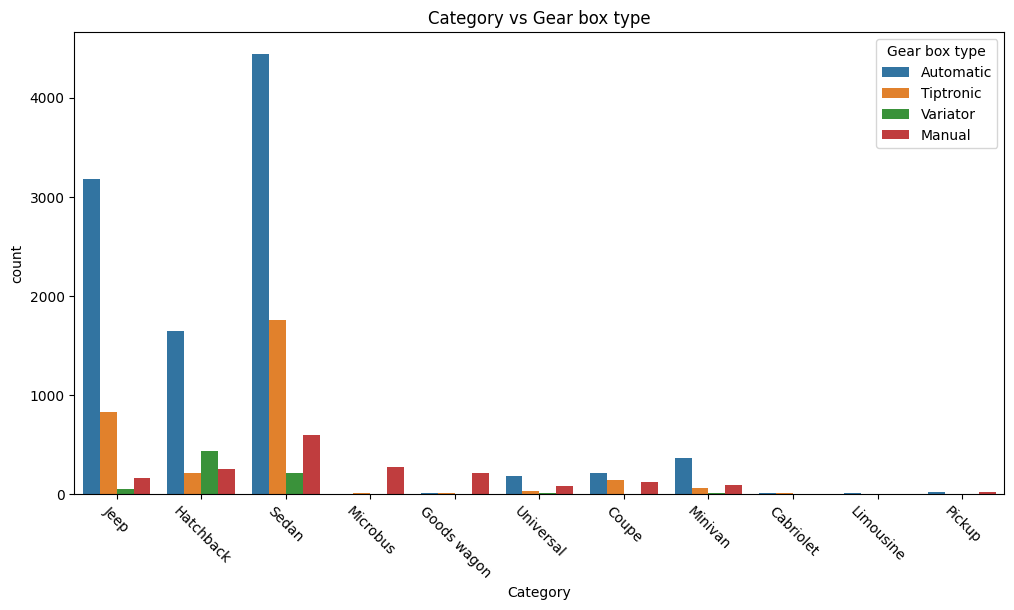

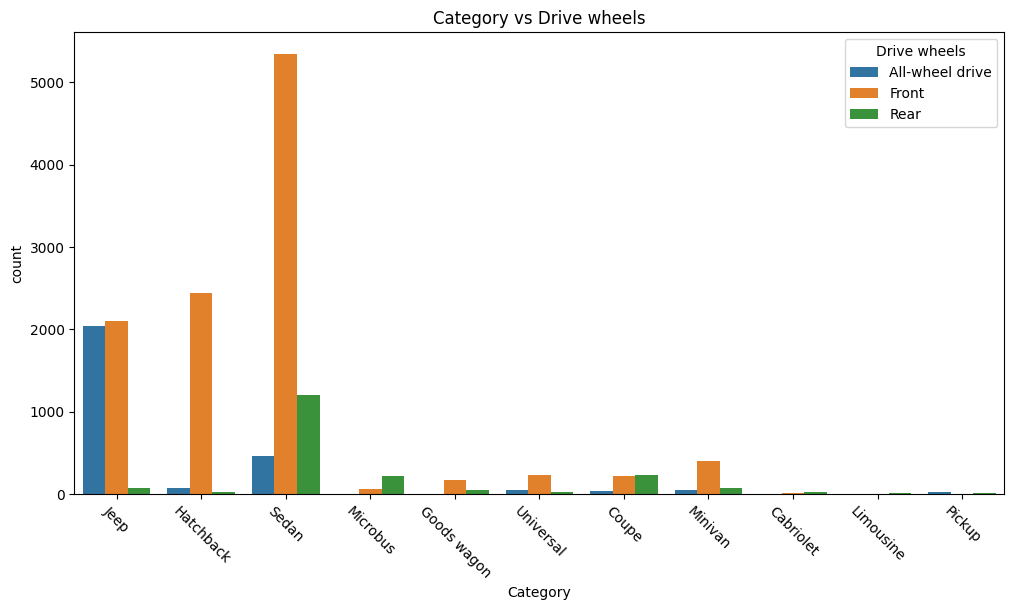

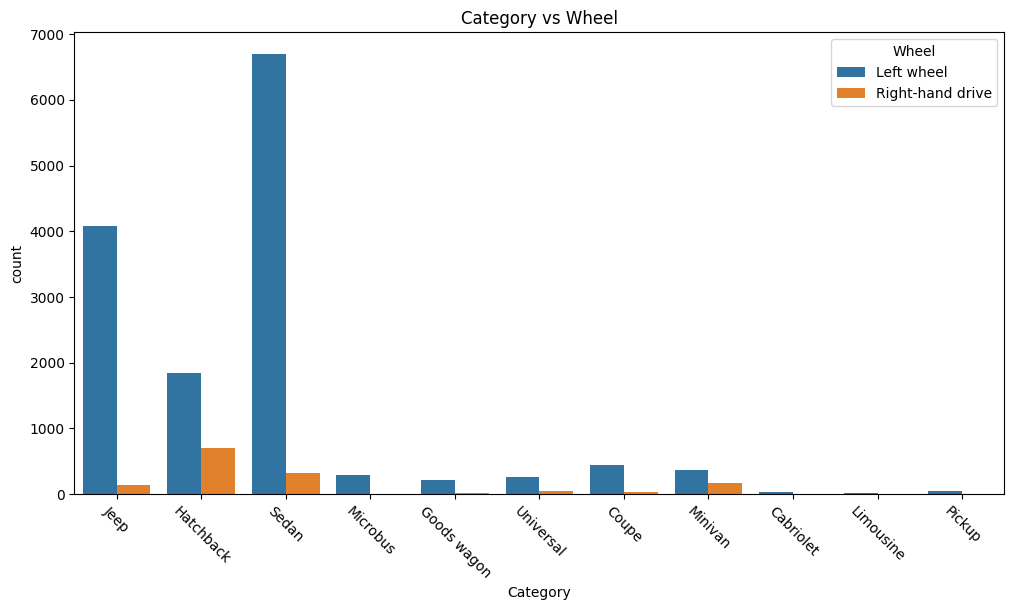

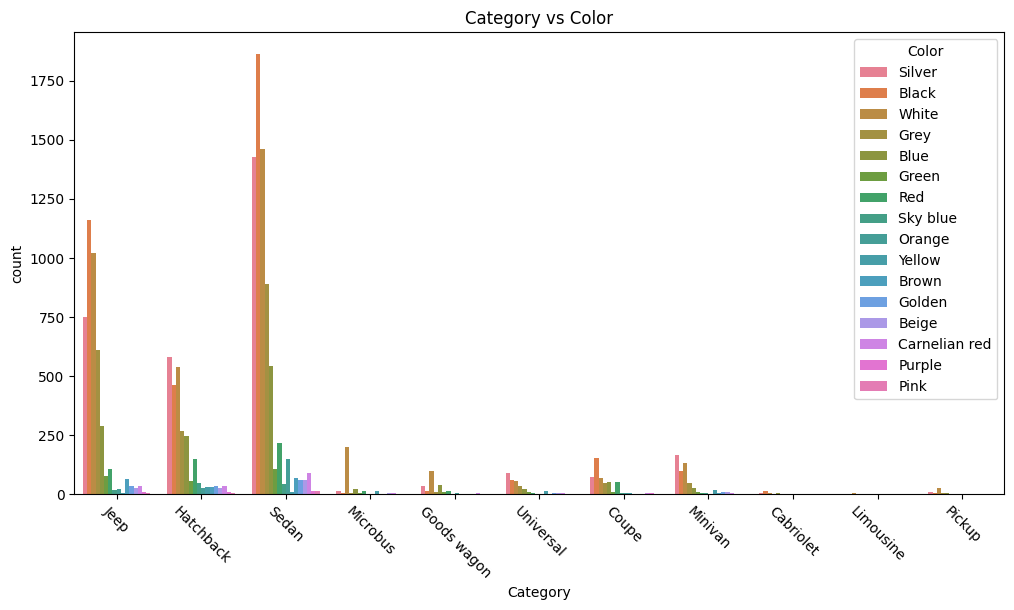

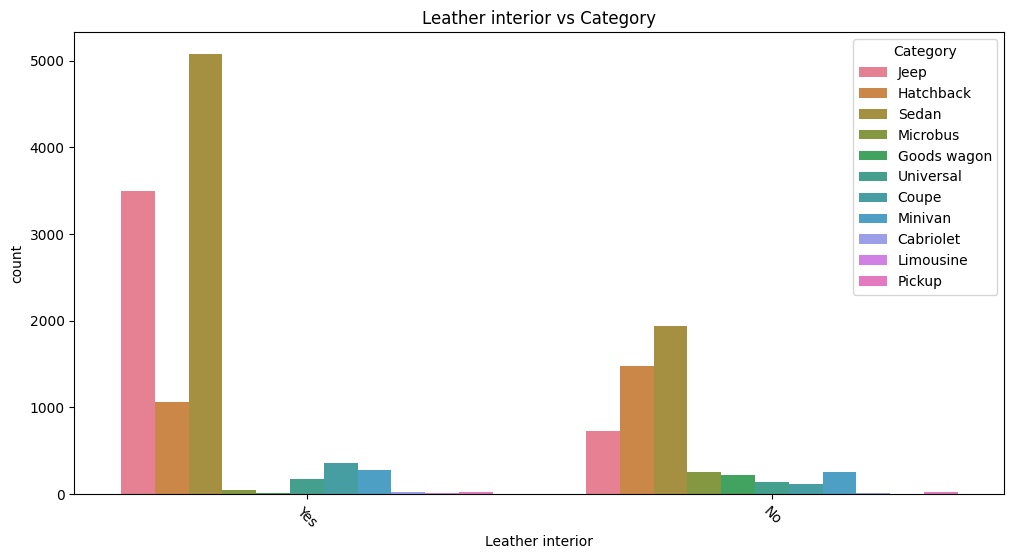

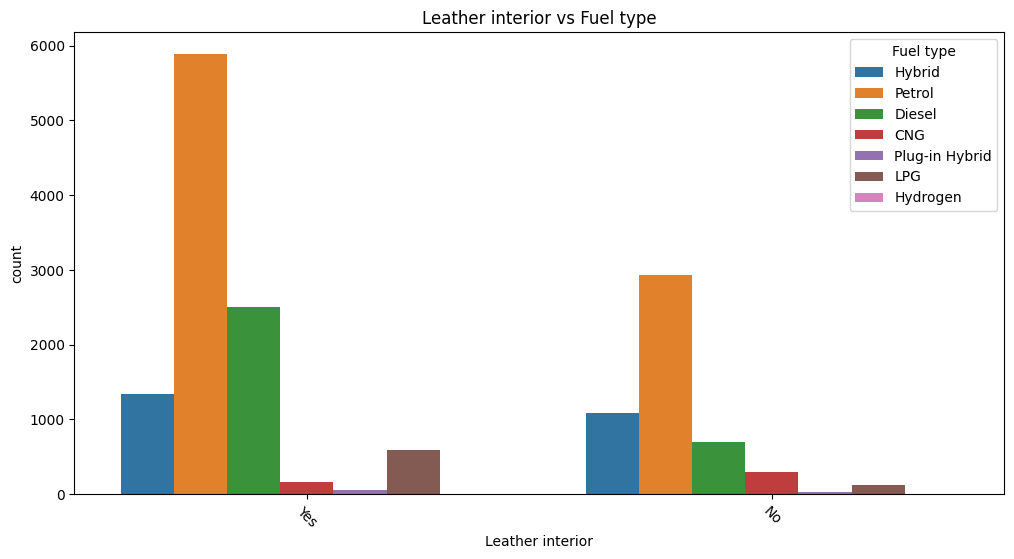

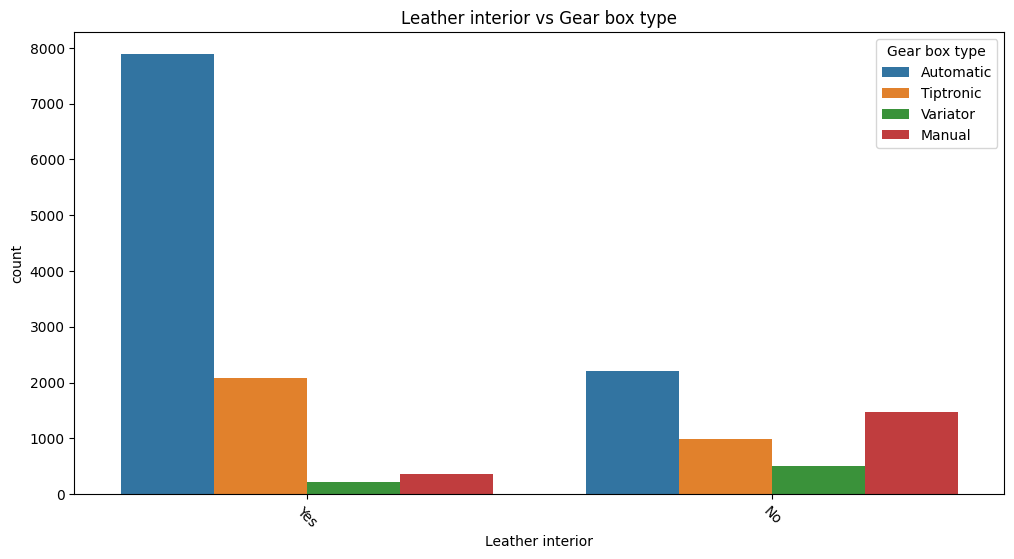

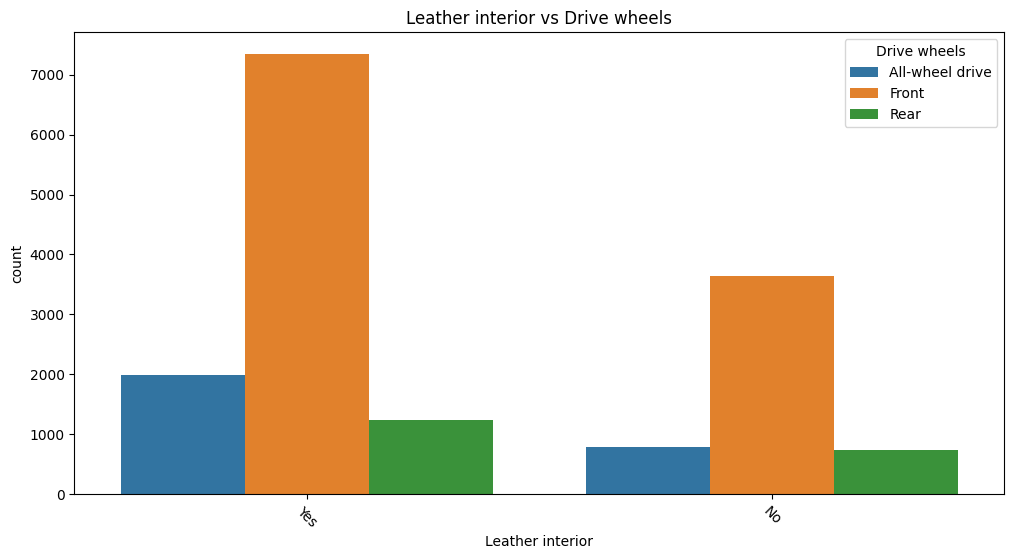

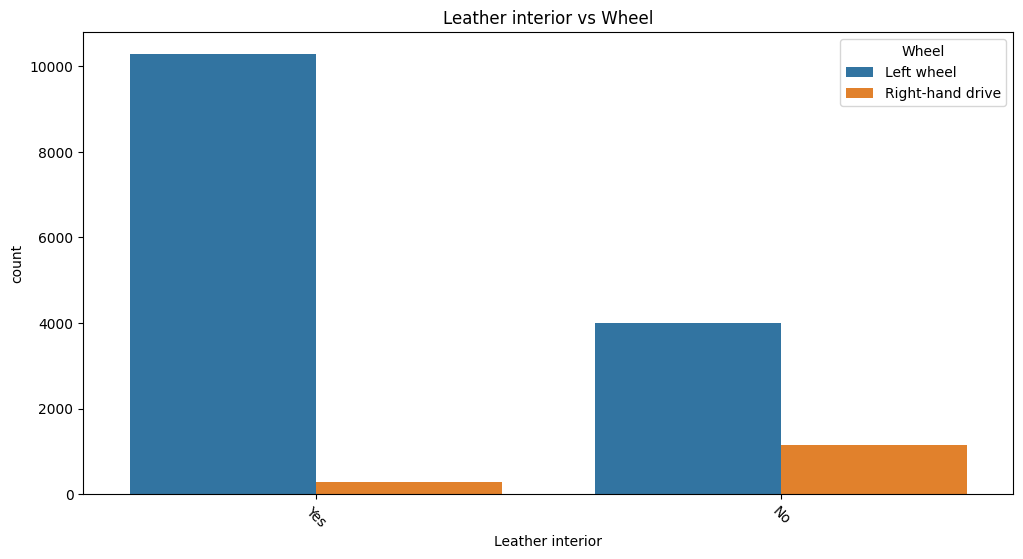

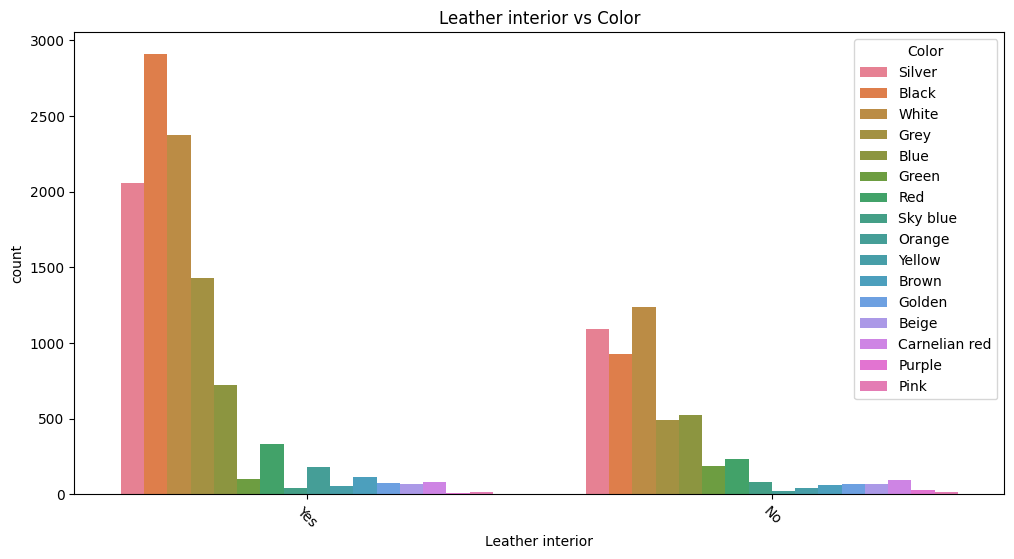

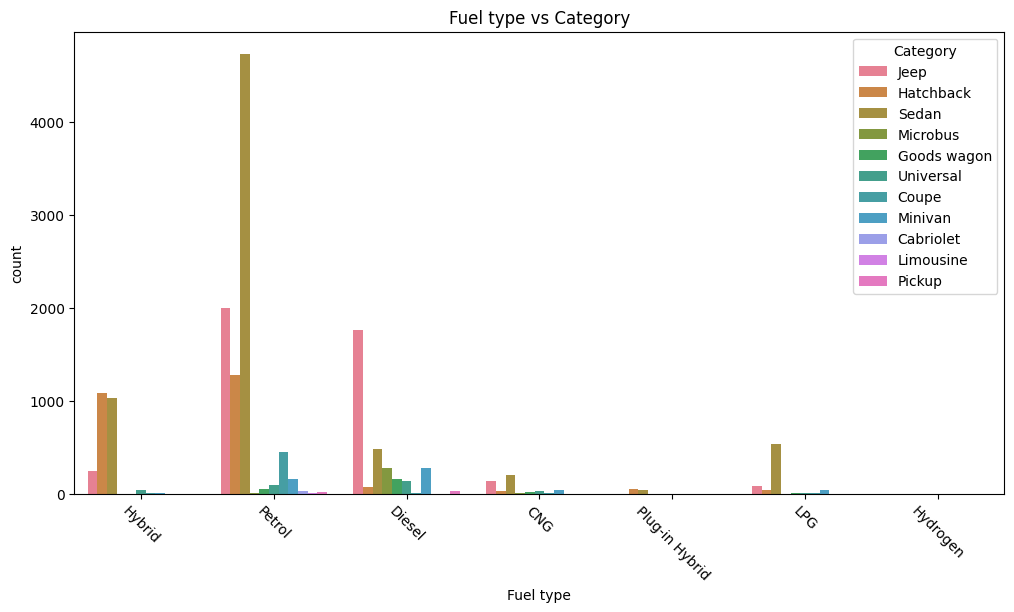

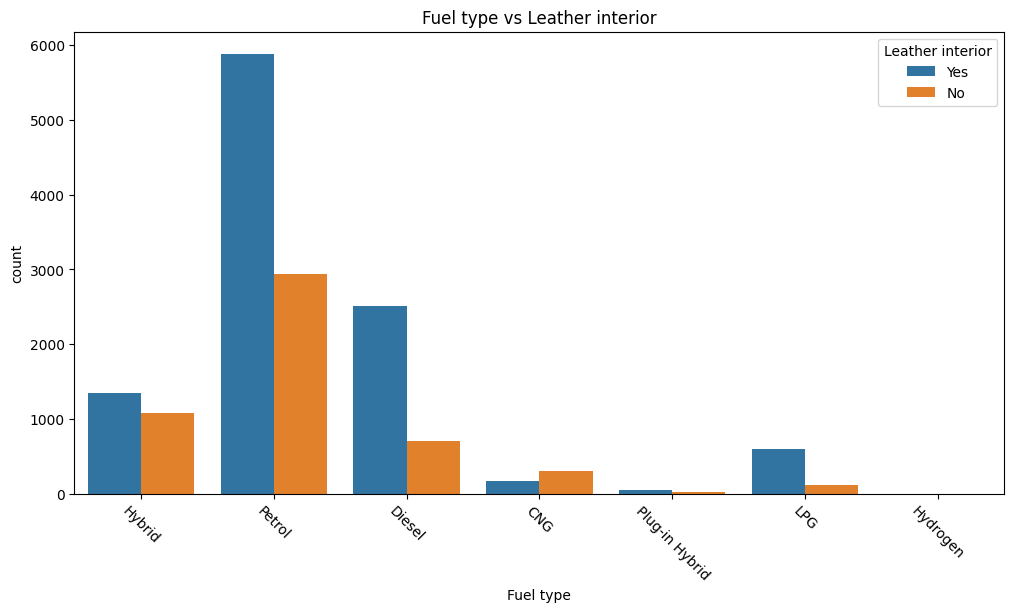

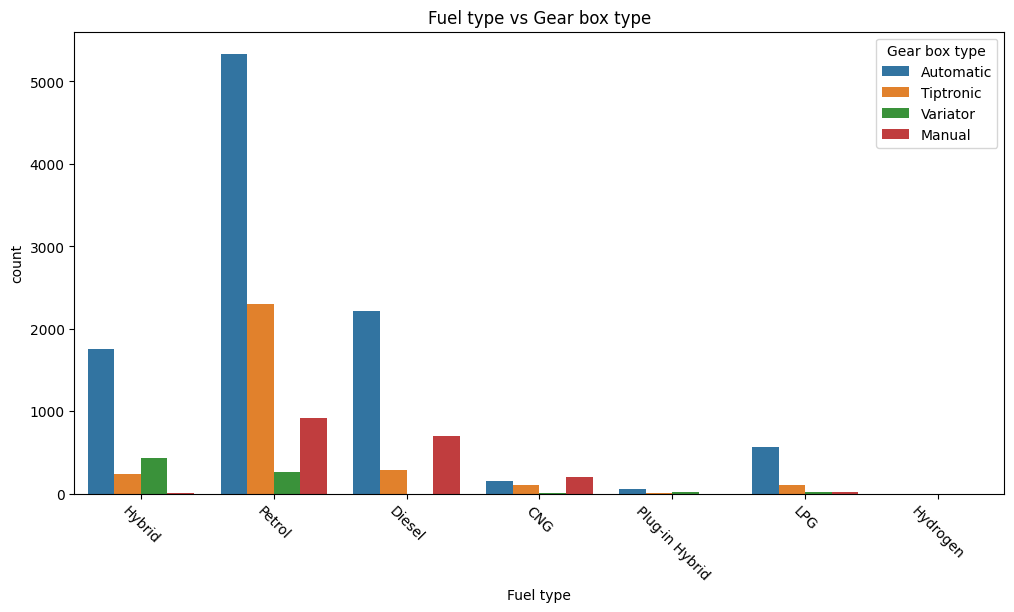

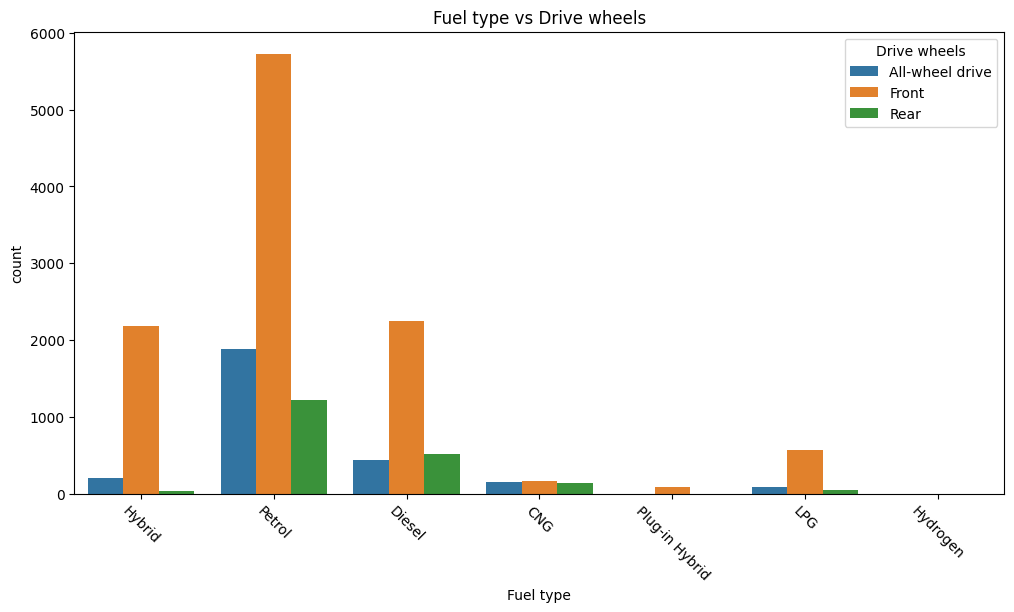

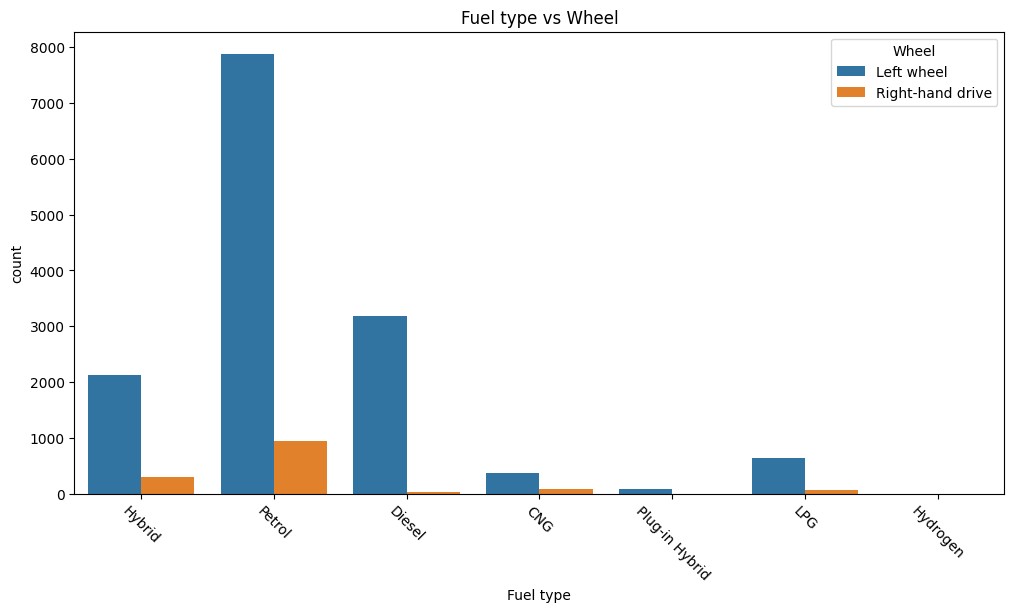

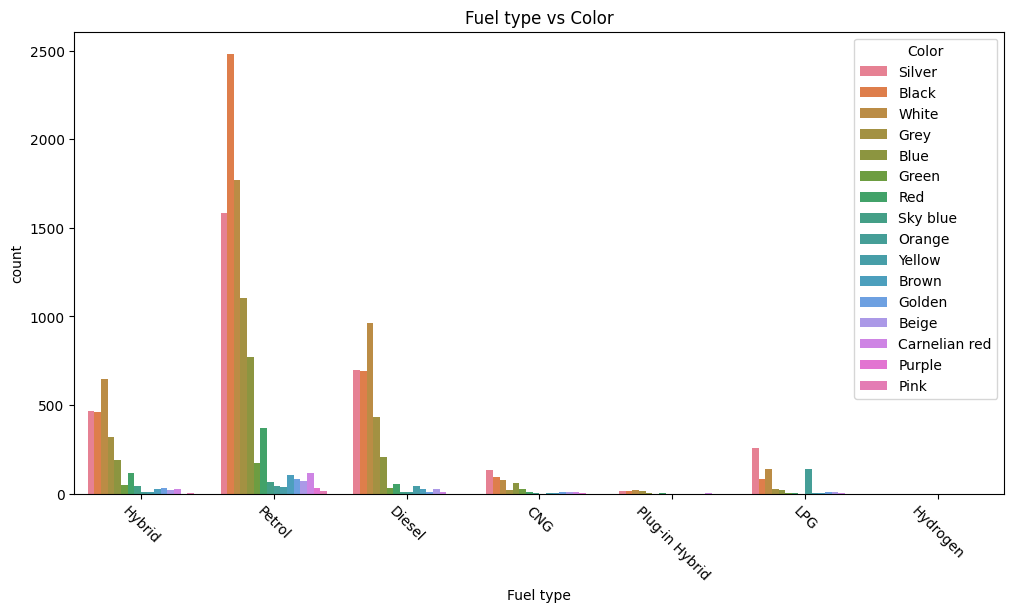

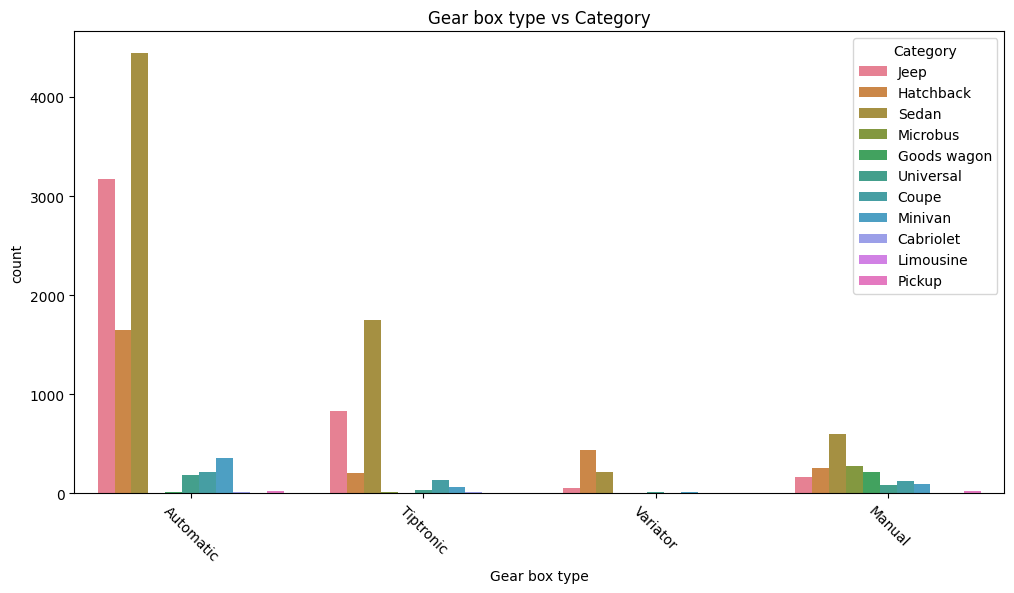

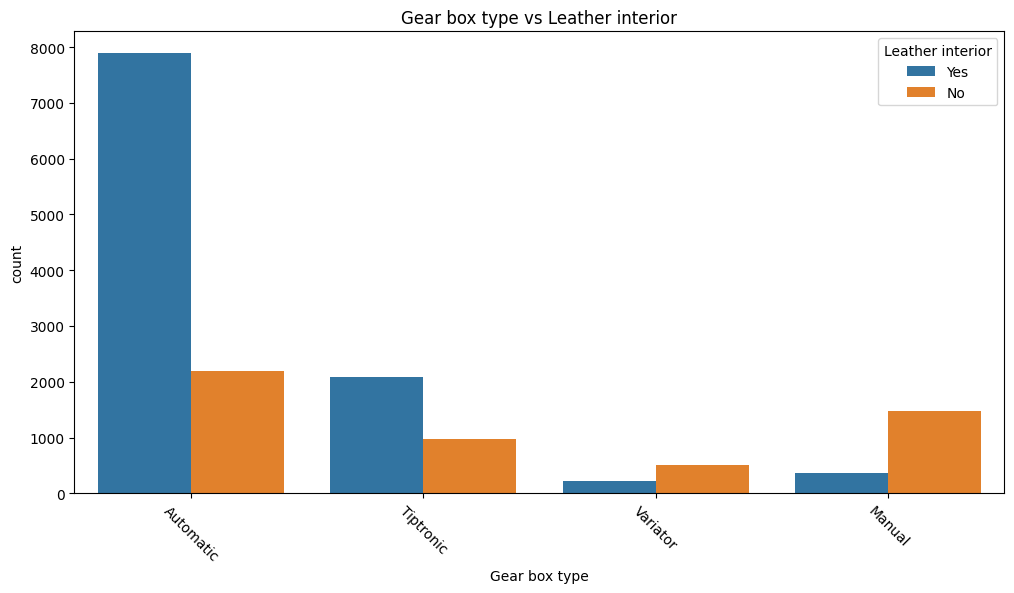

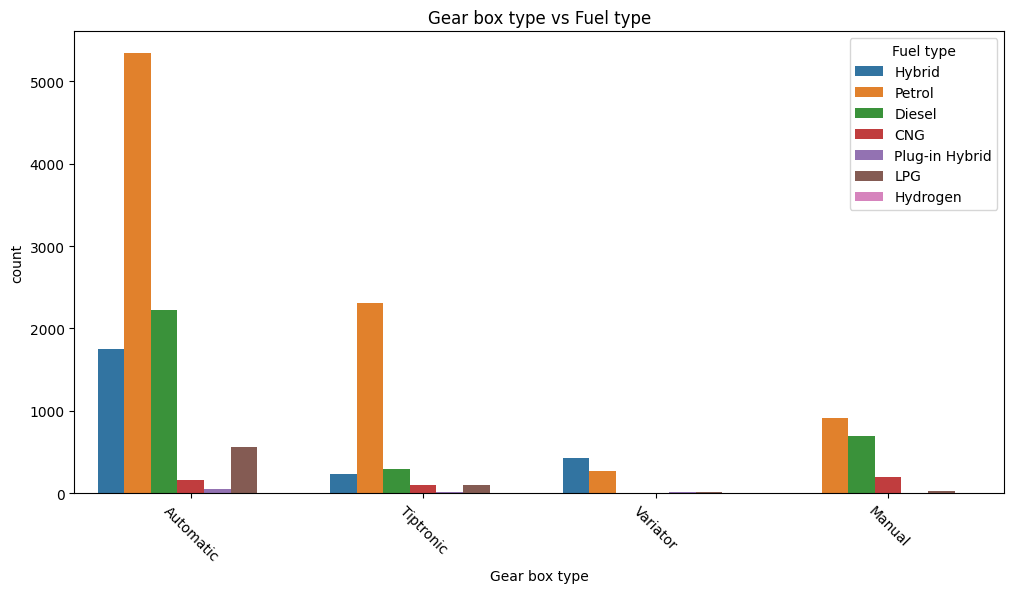

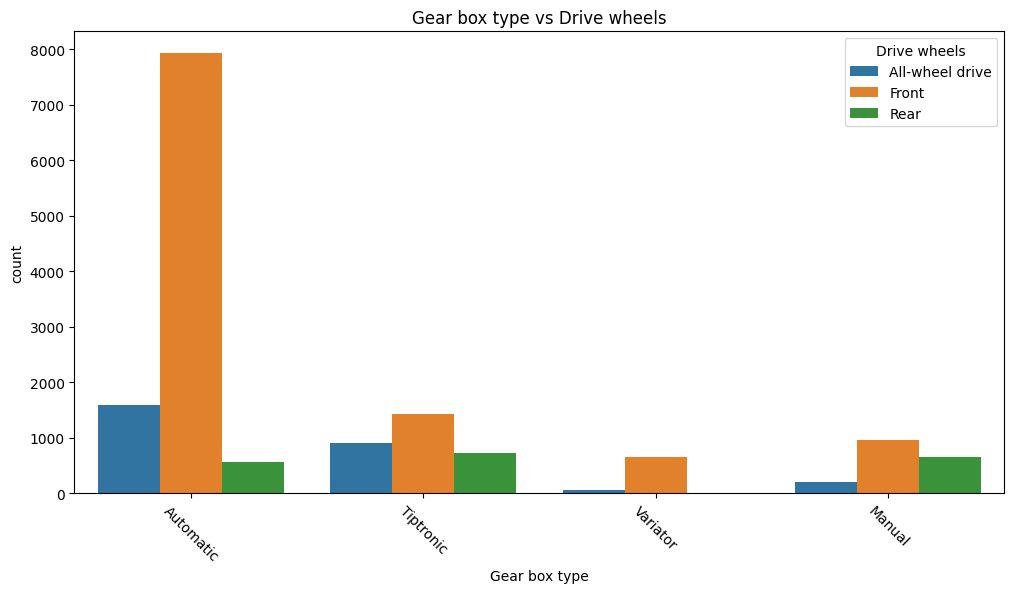

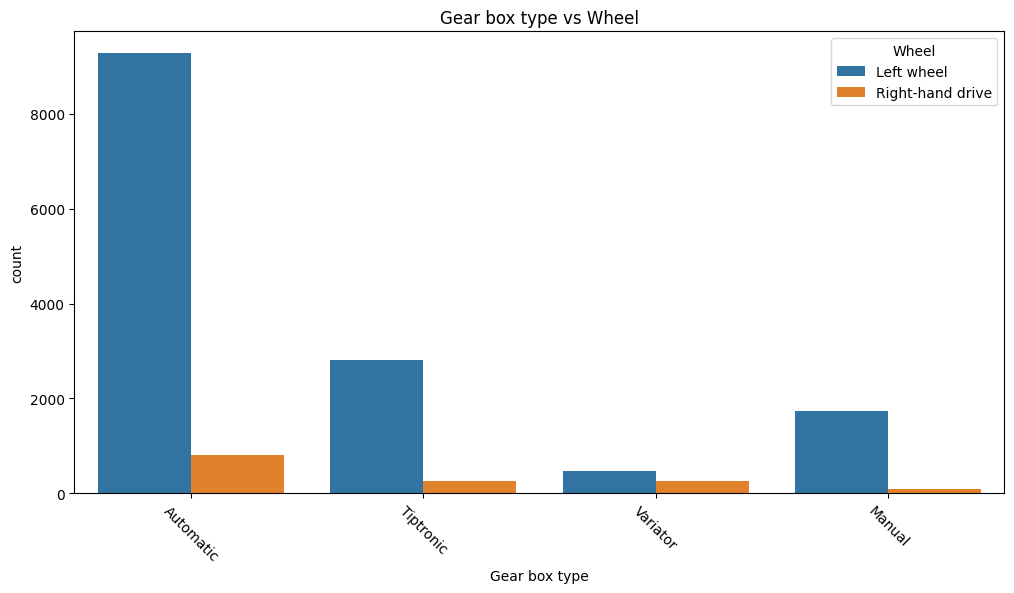

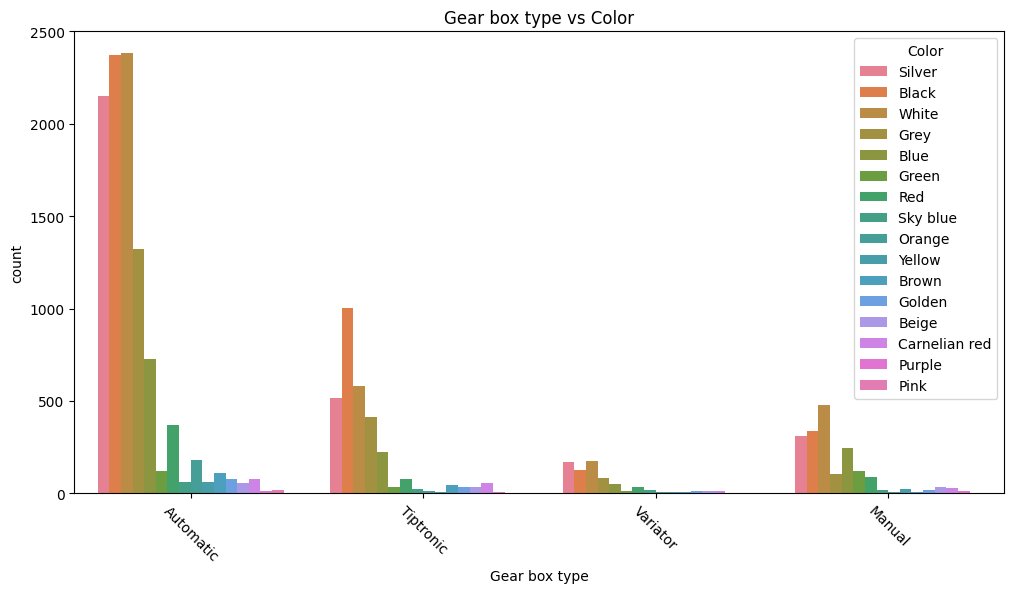

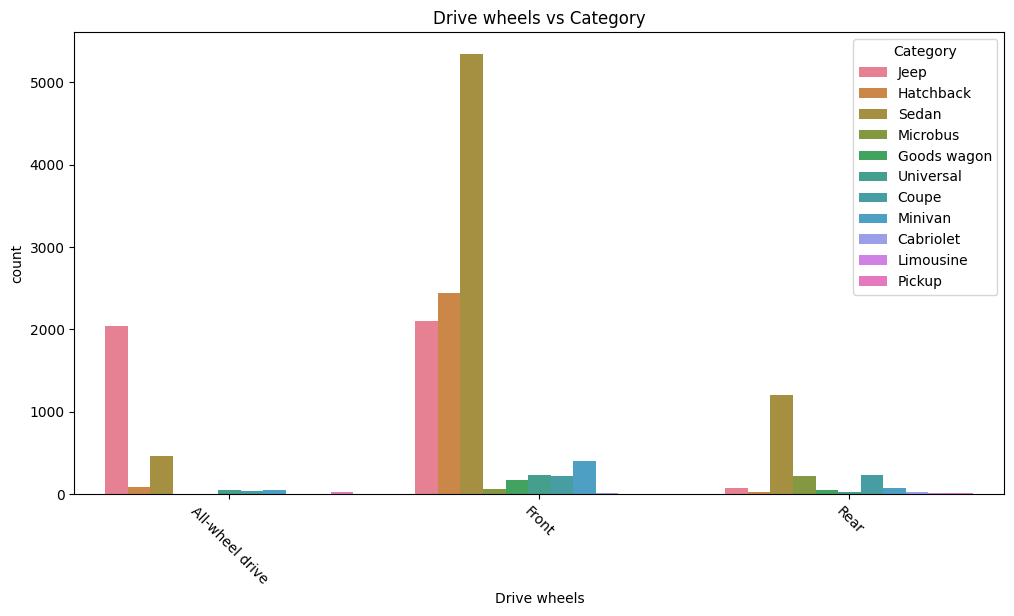

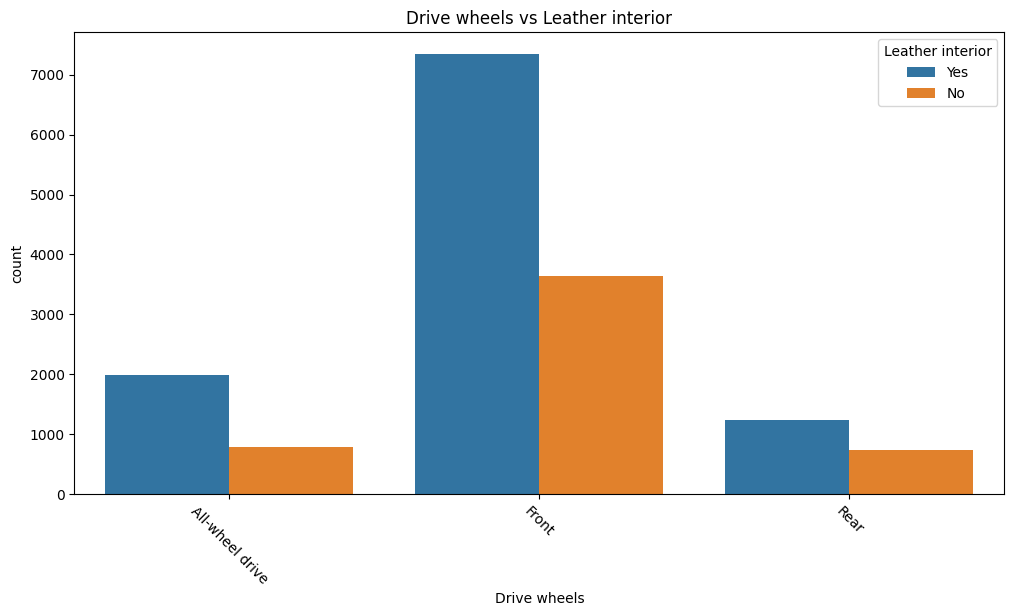

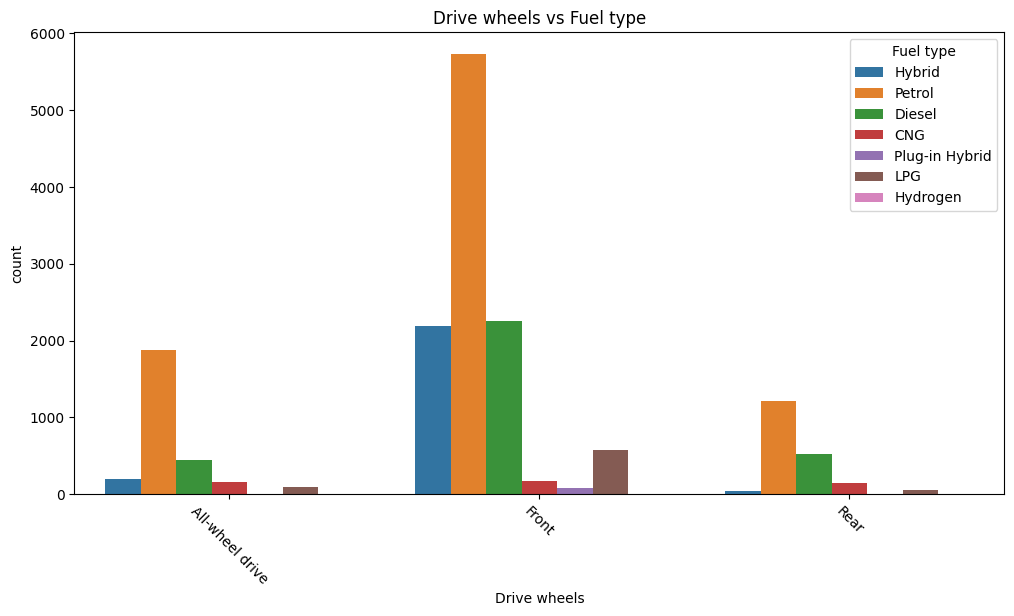

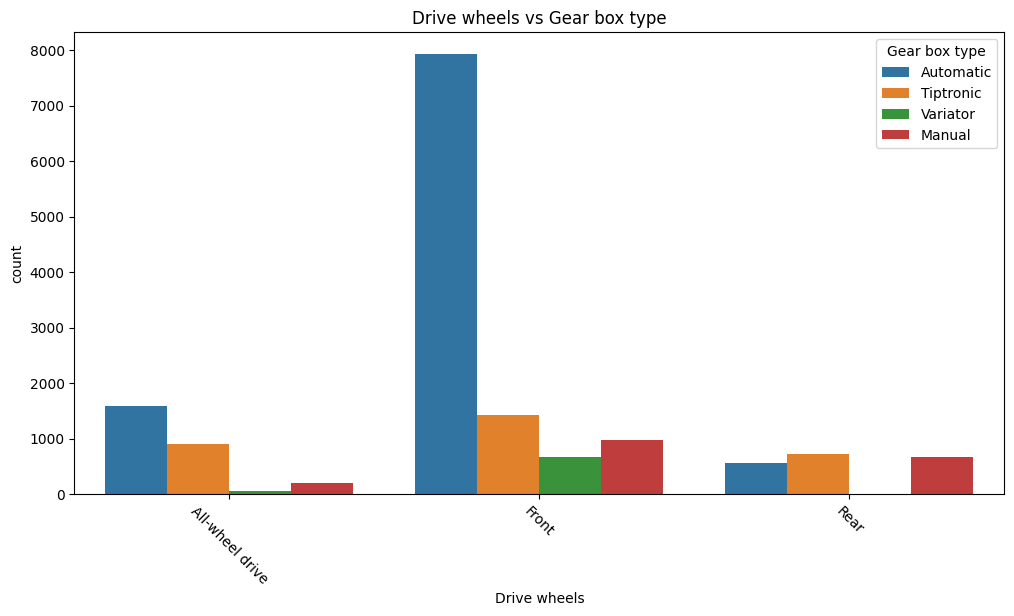

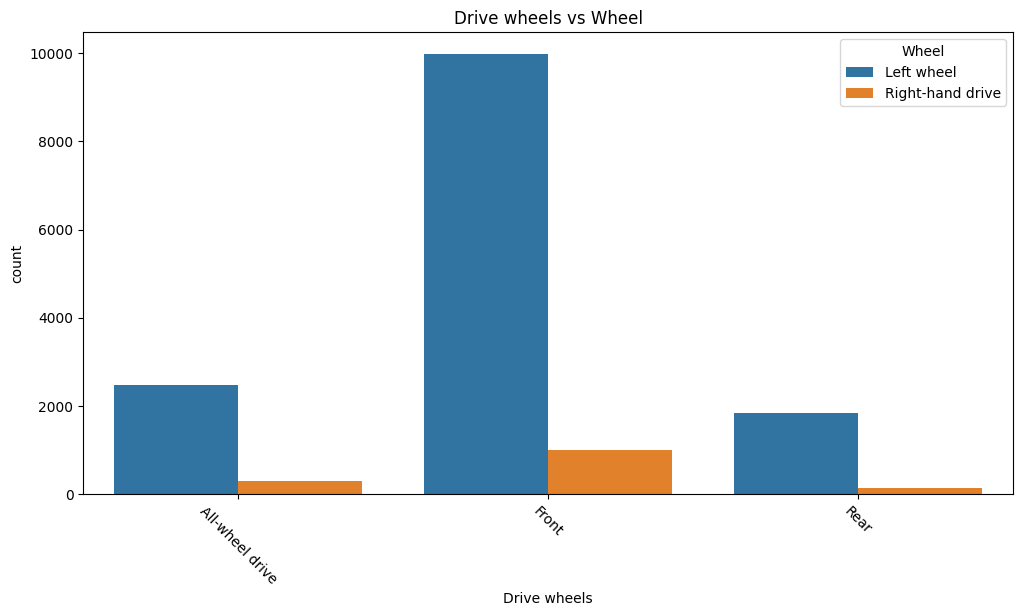

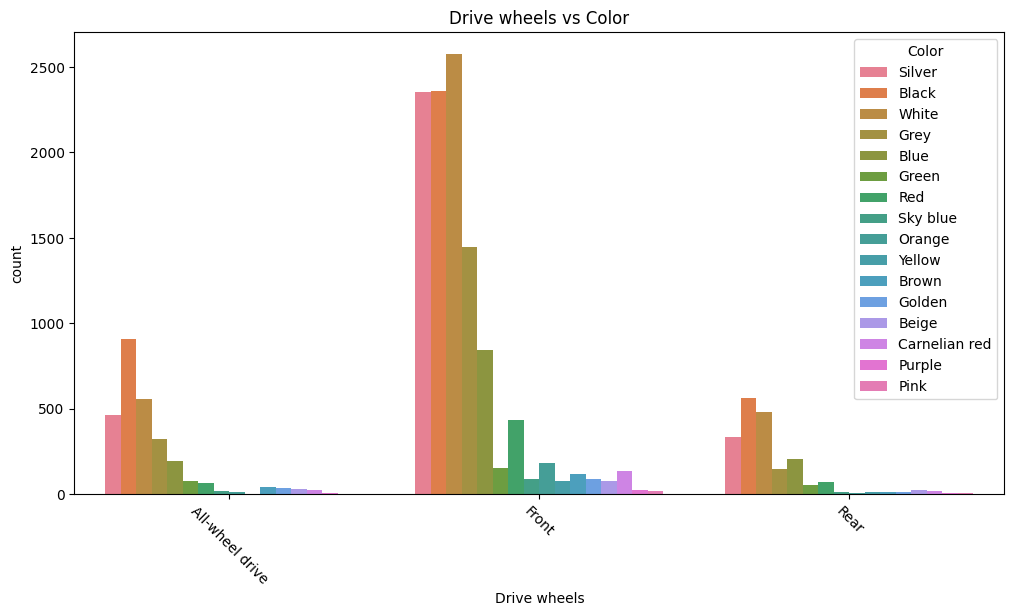

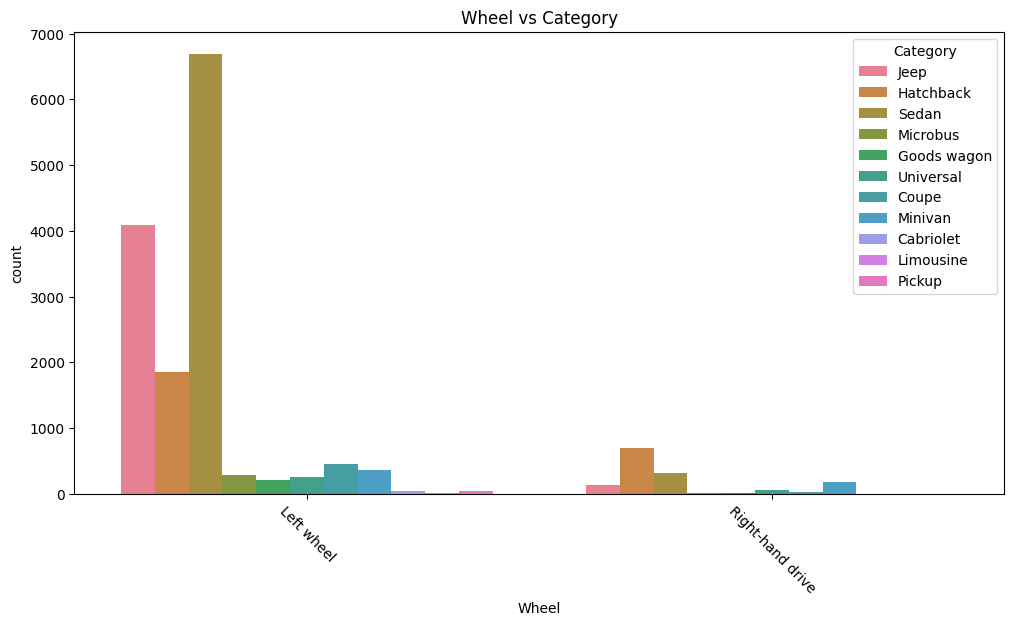

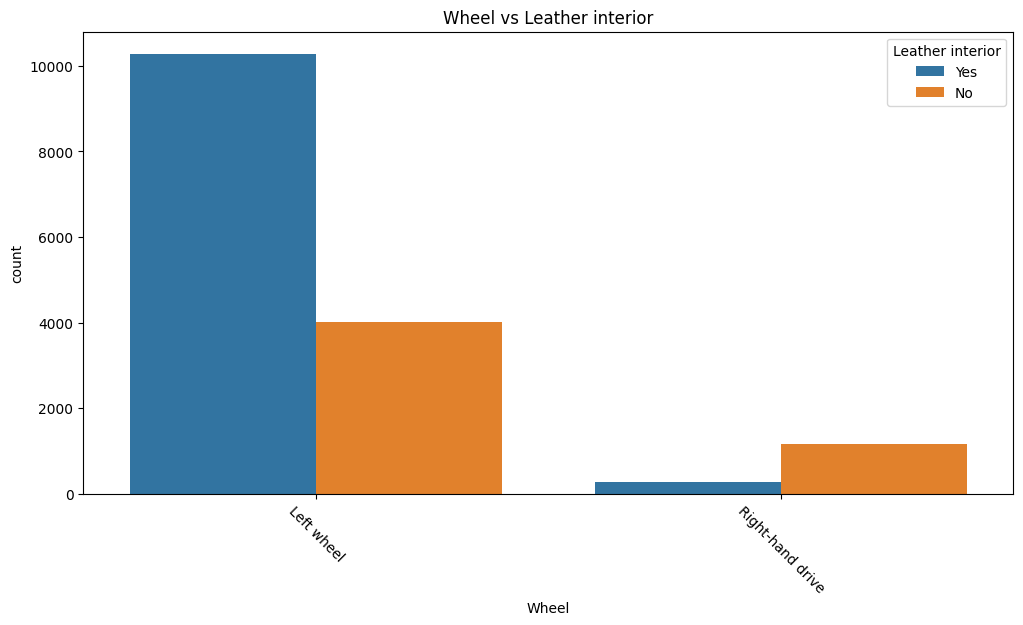

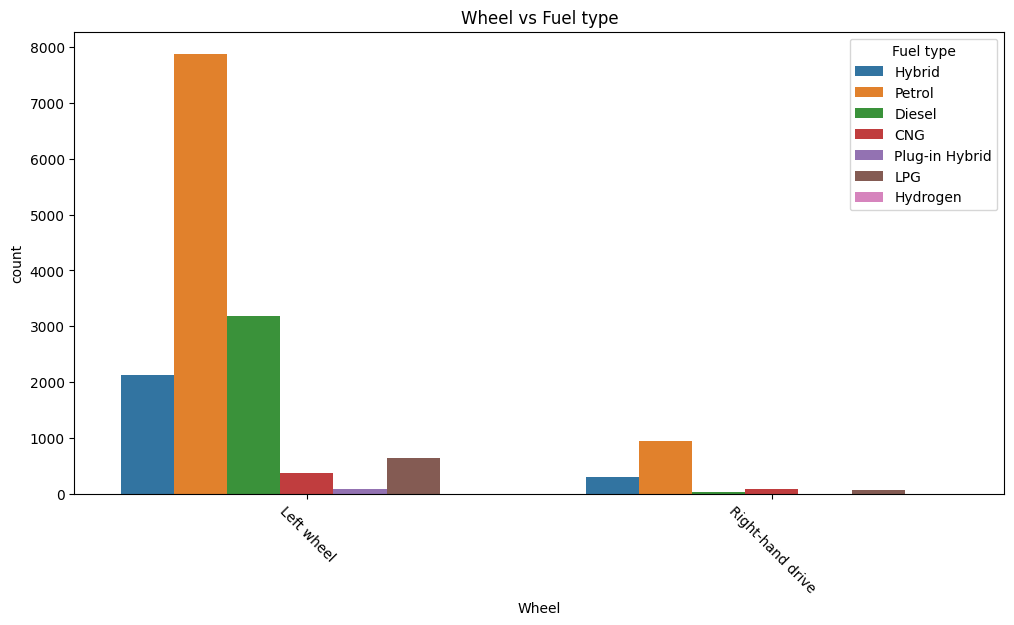

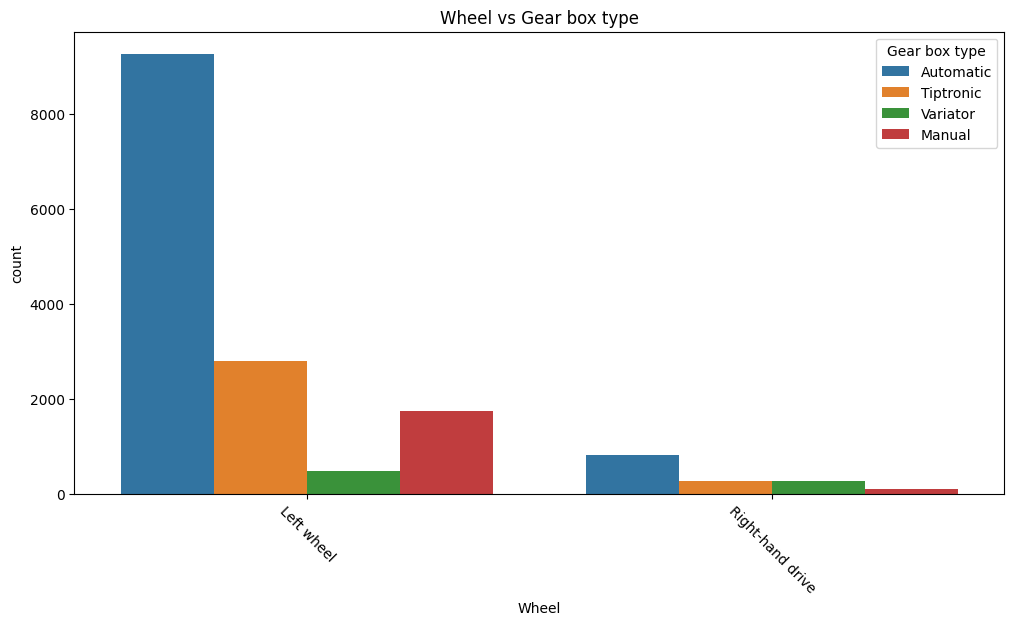

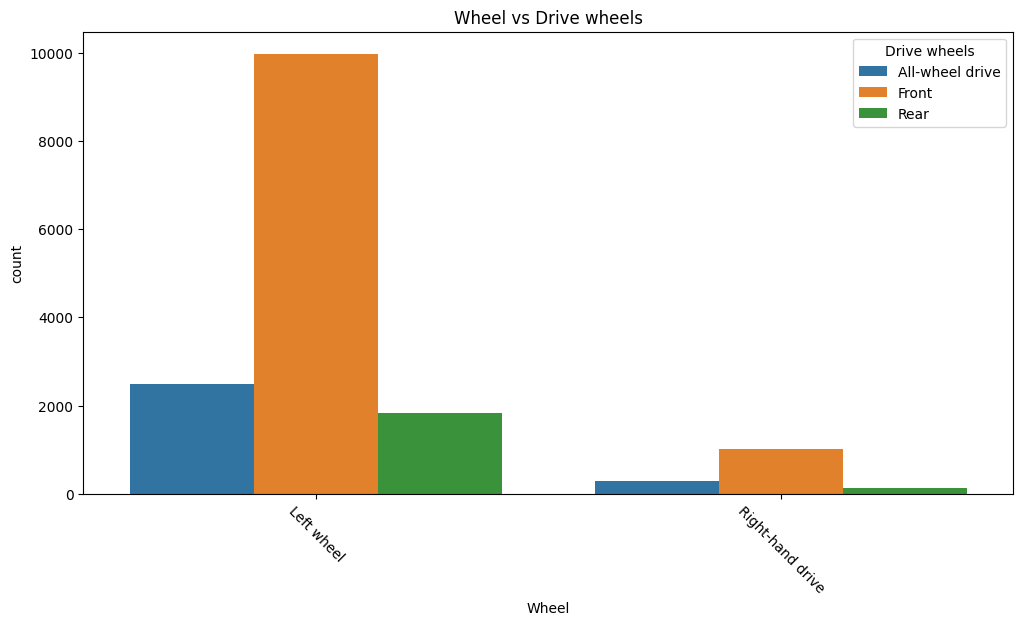

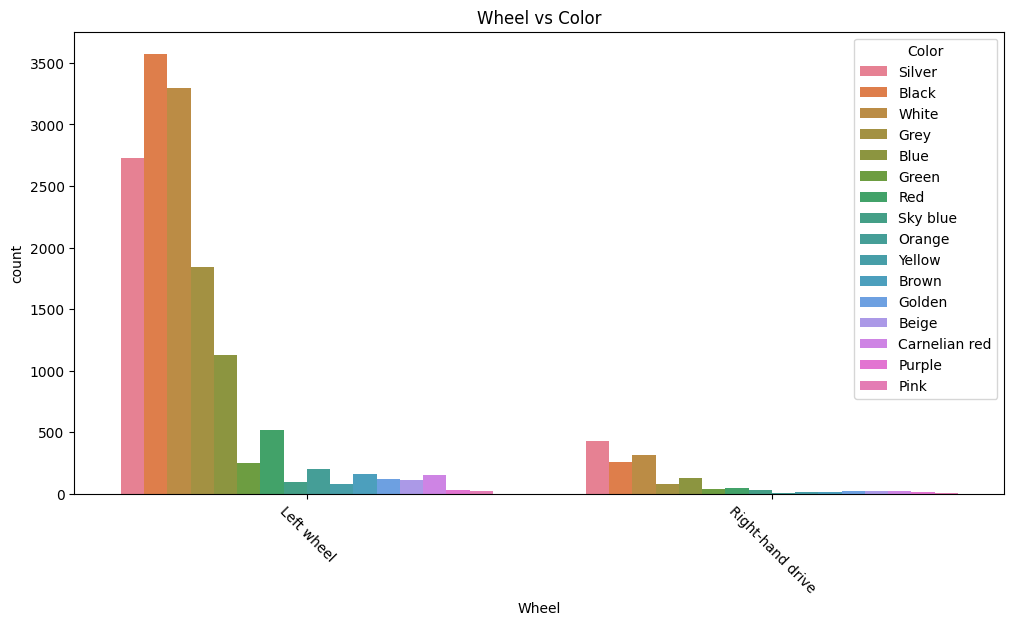

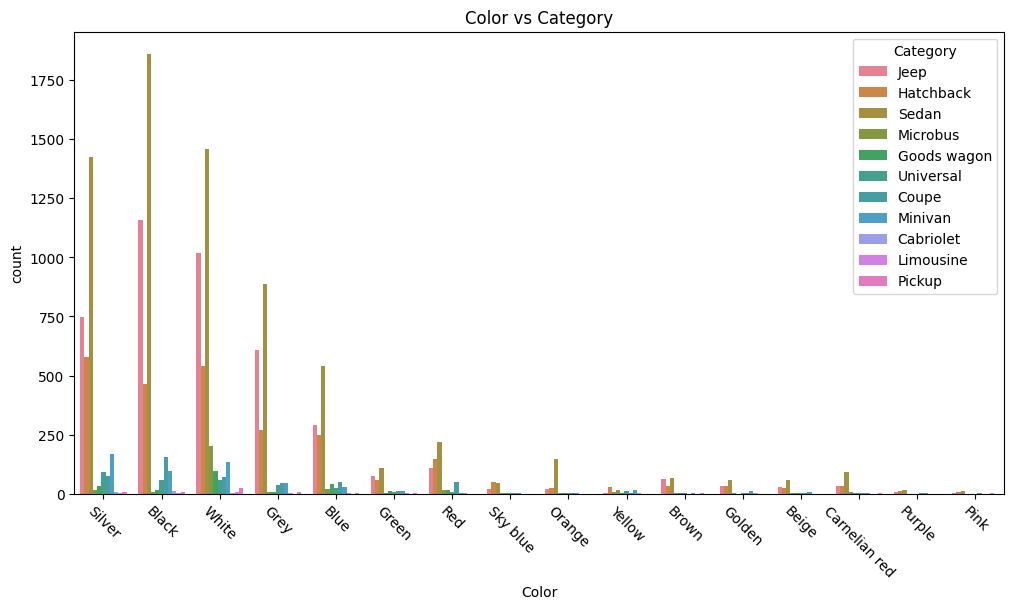

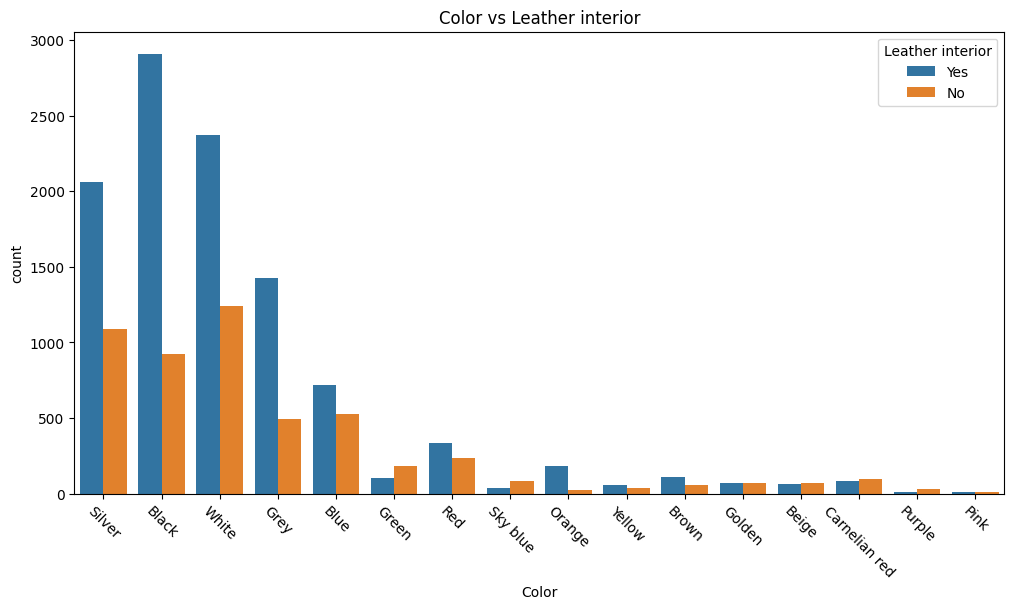

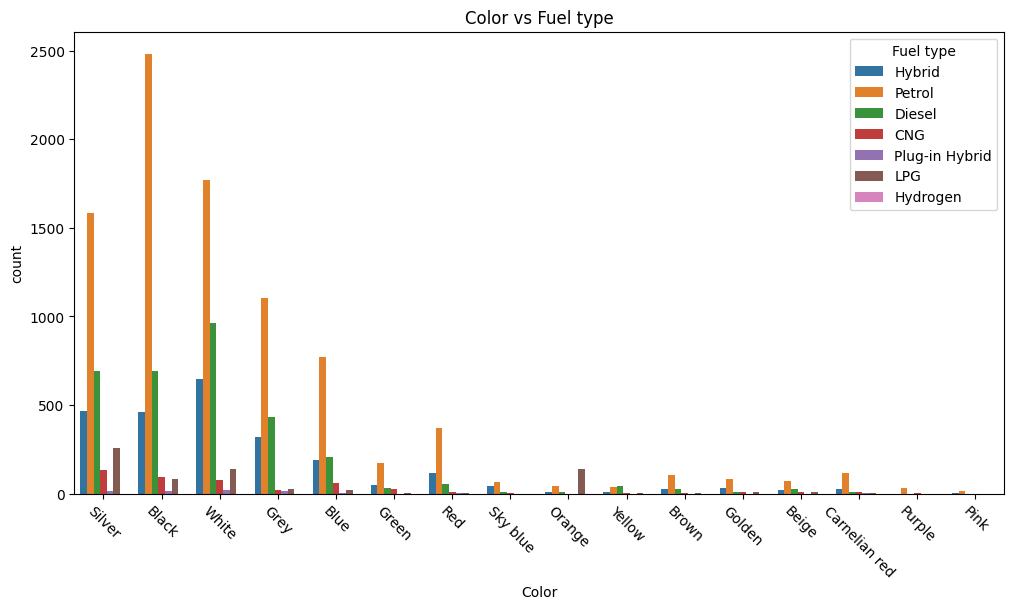

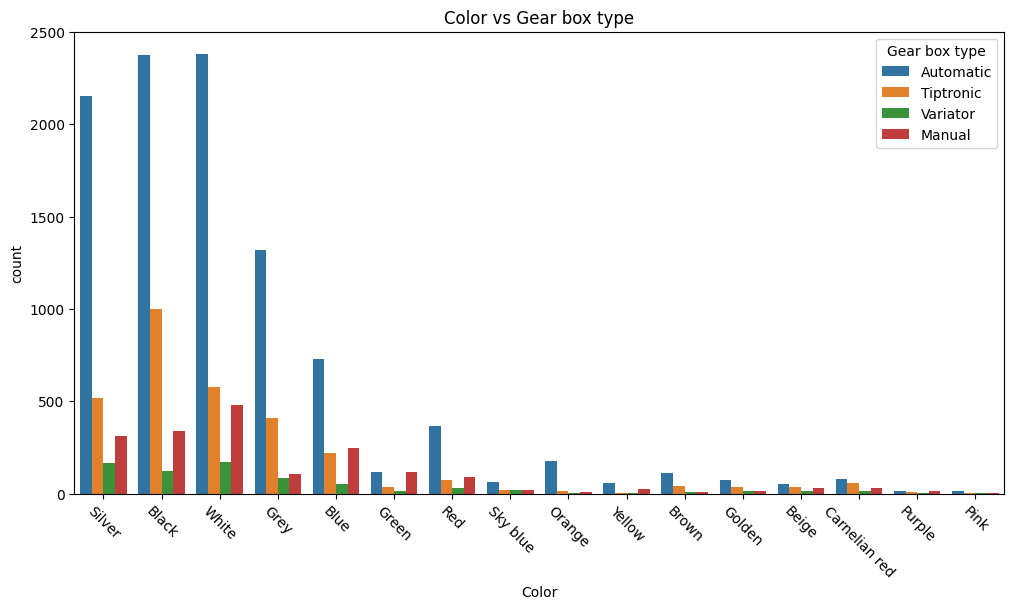

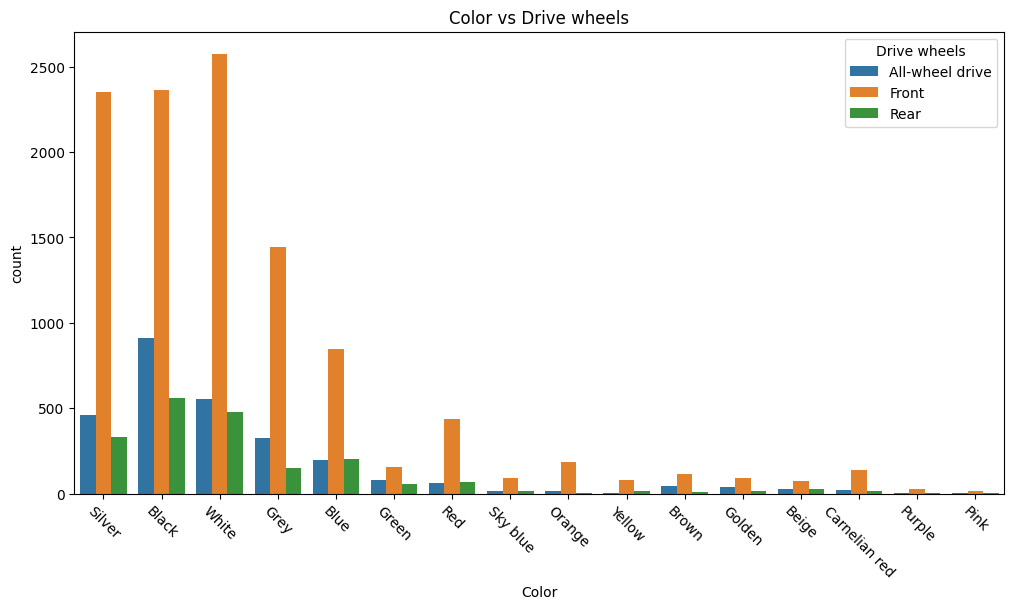

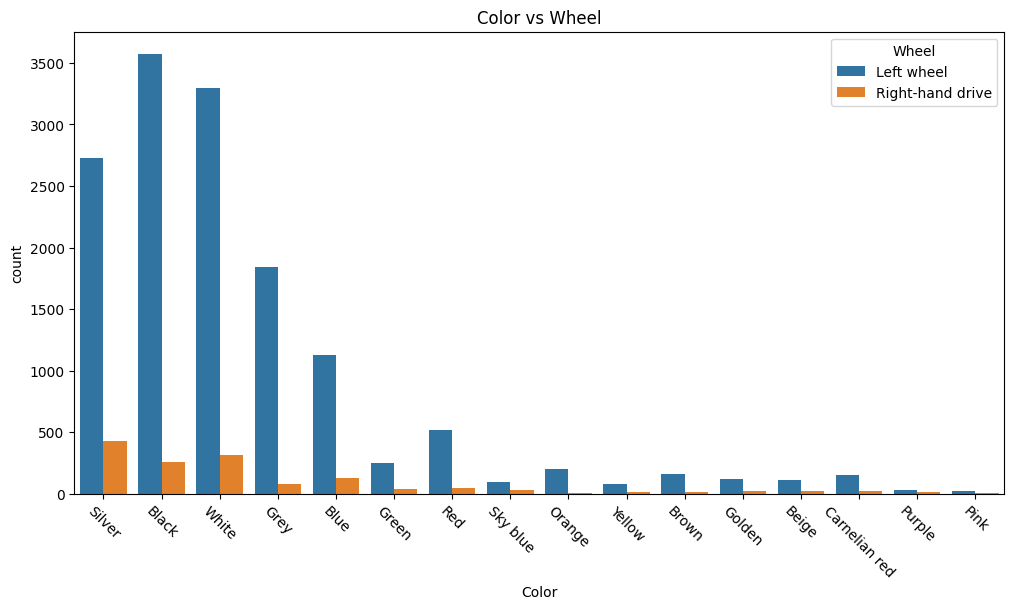

In [ ]:
## Categorical vs Categorical
for cat1 in categorical :
  for cat2 in categorical :
    if cat1 != cat2 :
      plt.figure(figsize = (12, 6))
      sns.countplot(data = df, x = cat1, hue = cat2)
      plt.title(f'{cat1} vs {cat2}')
      plt.xticks(rotation = -45)
      plt.show()

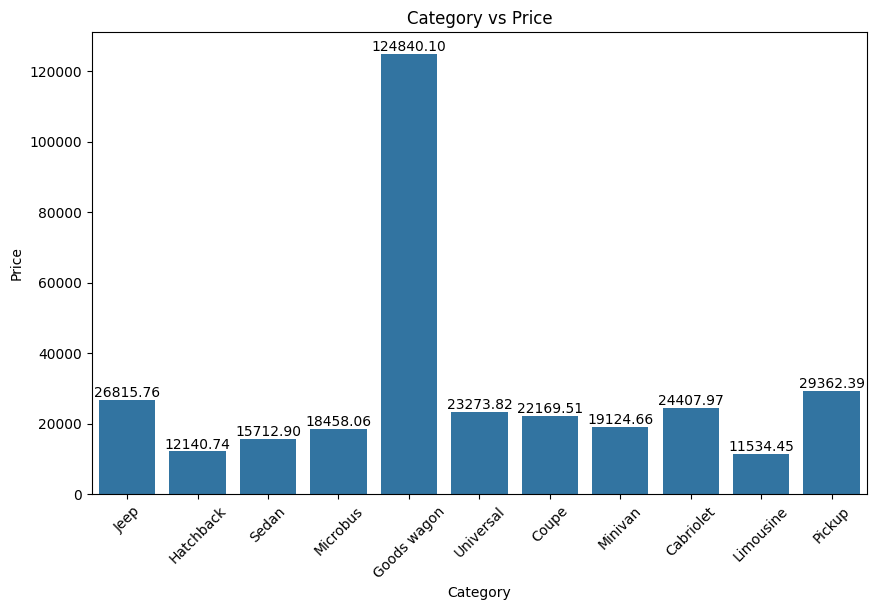

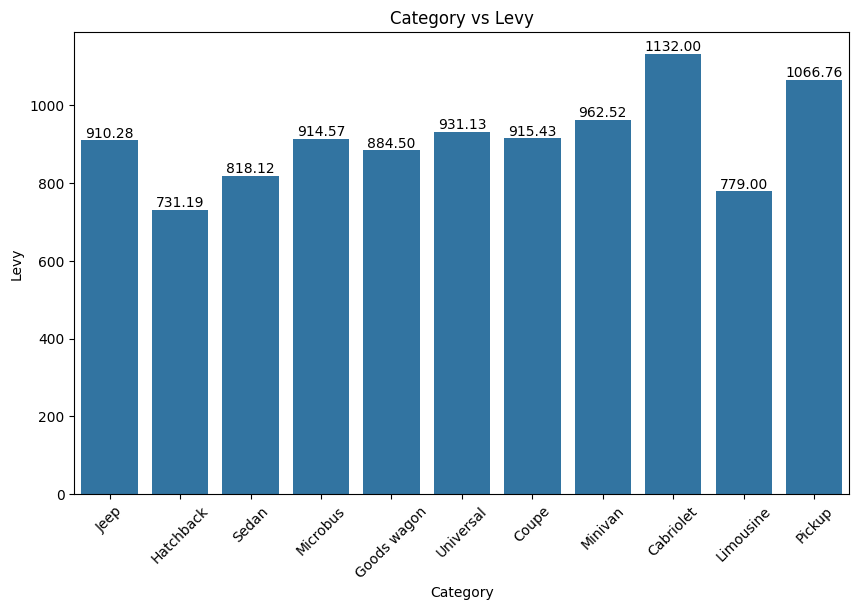

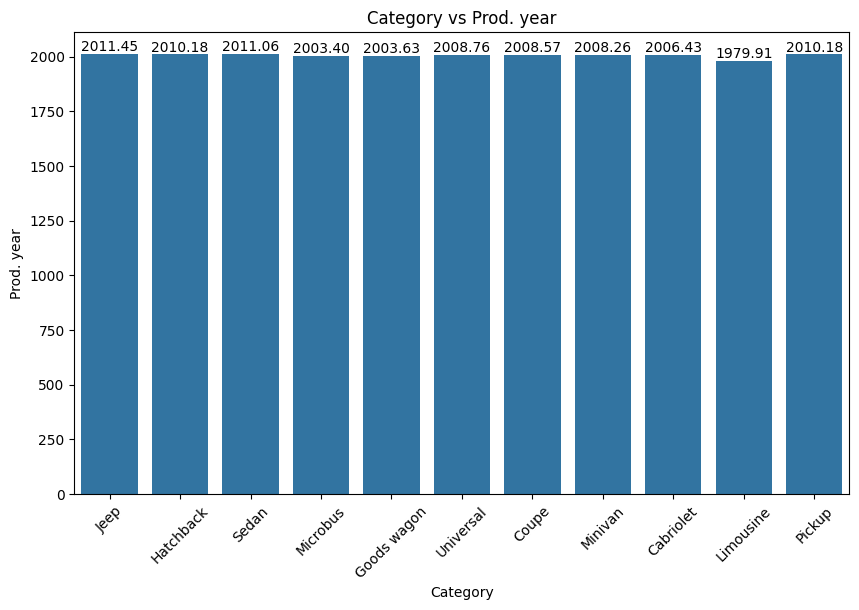

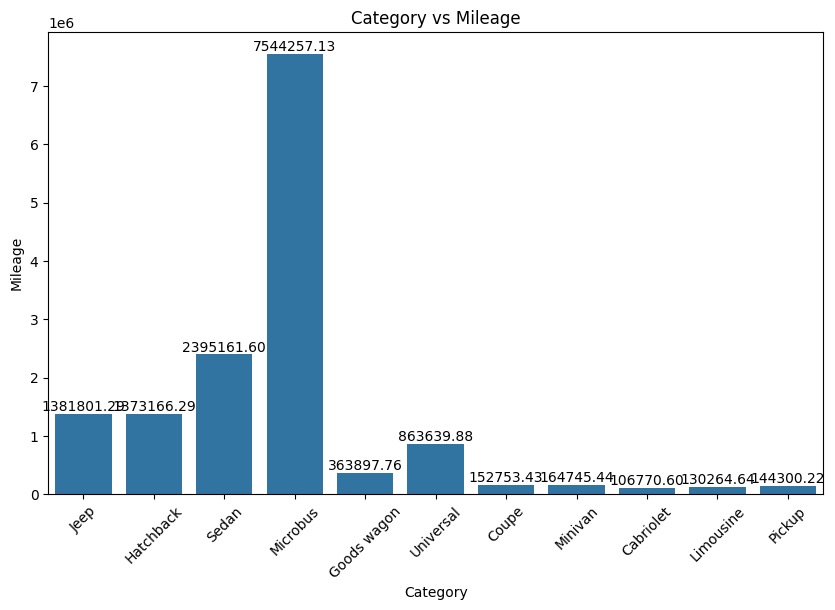

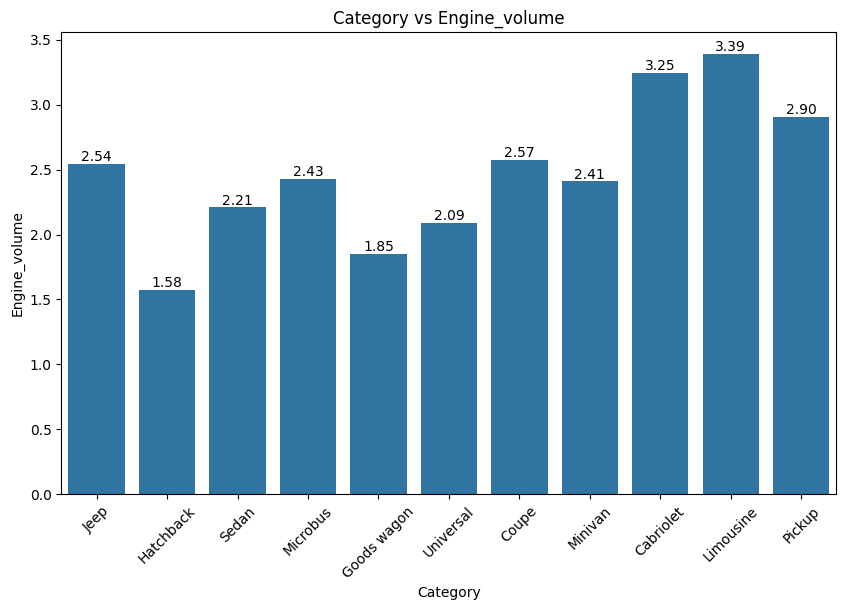

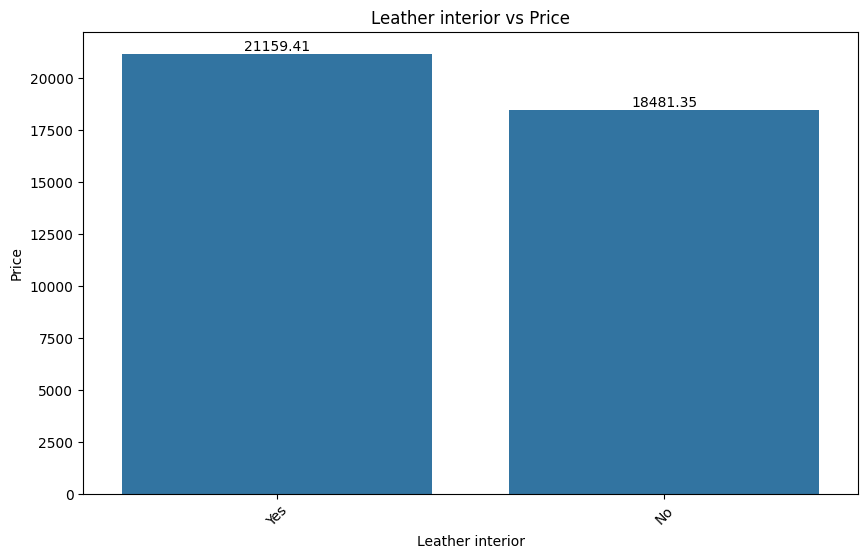

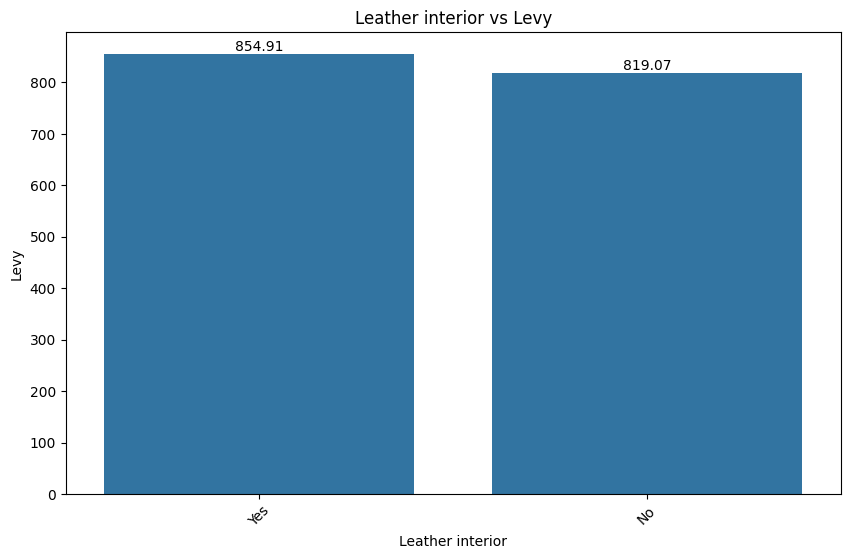

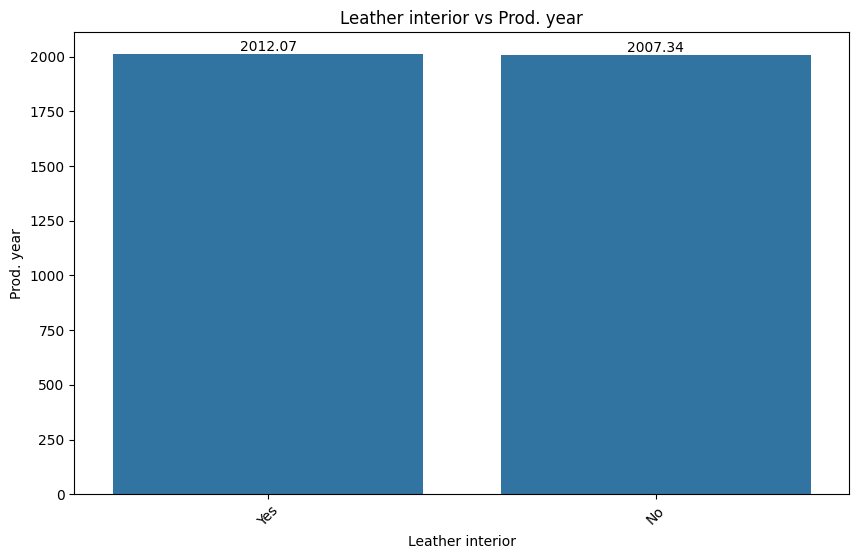

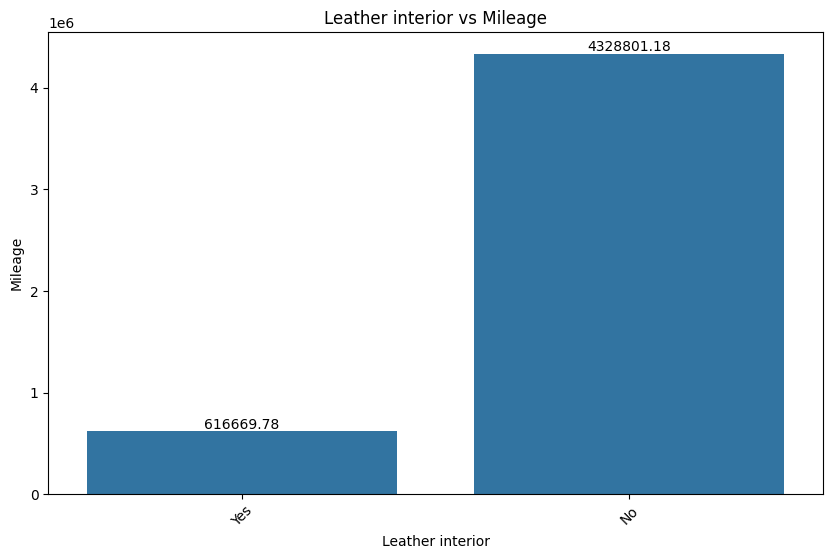

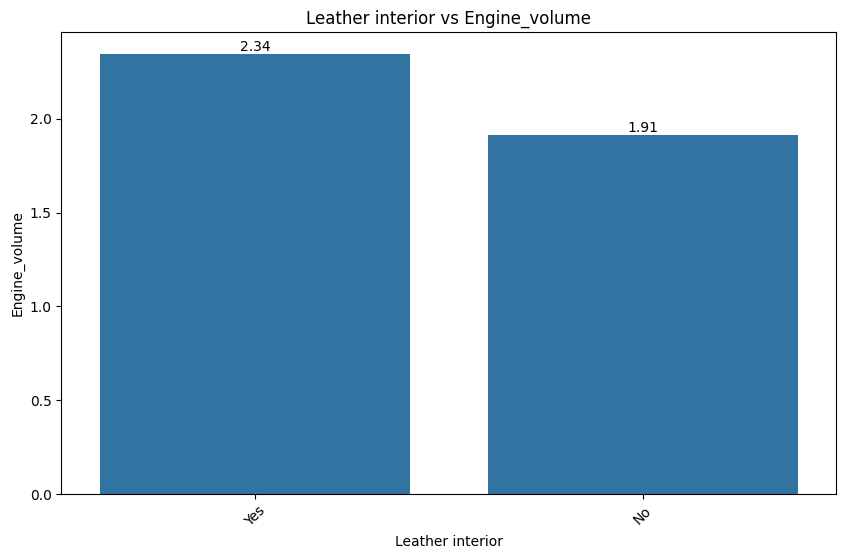

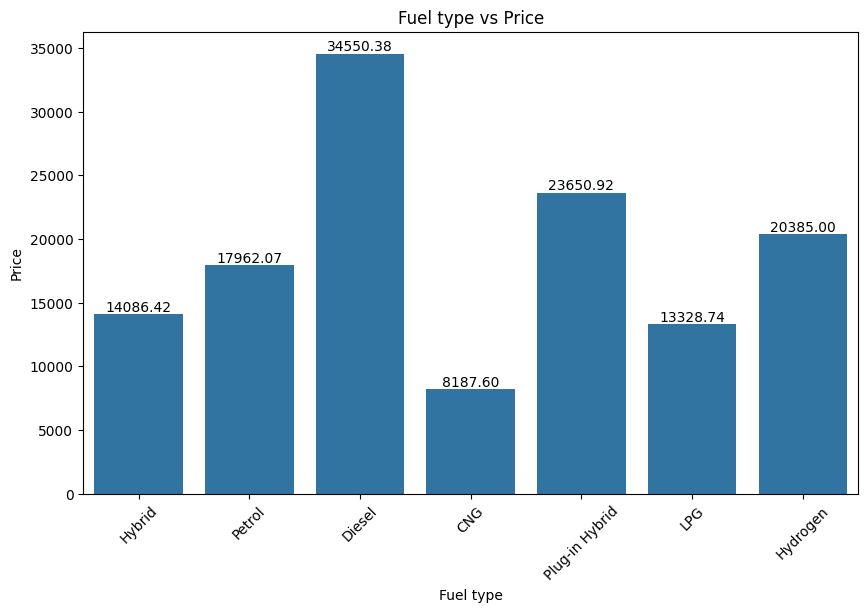

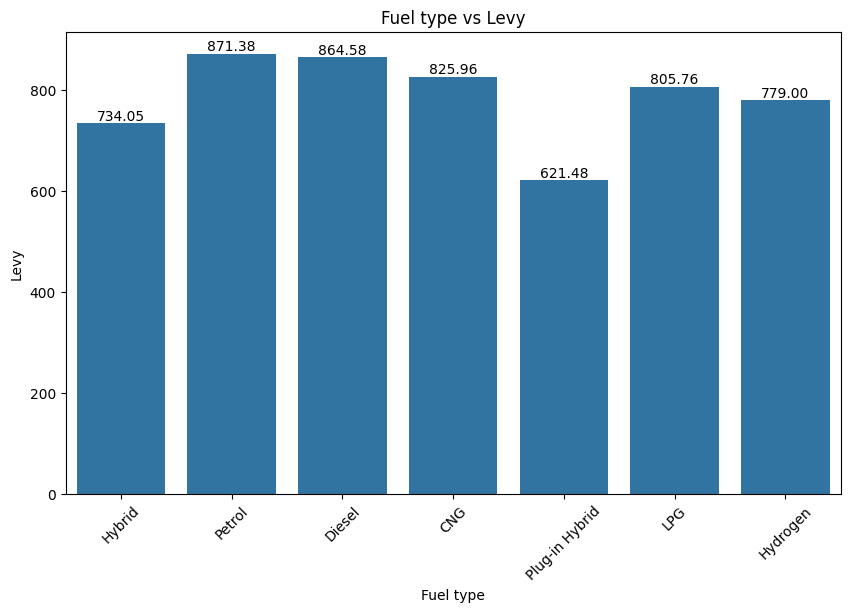

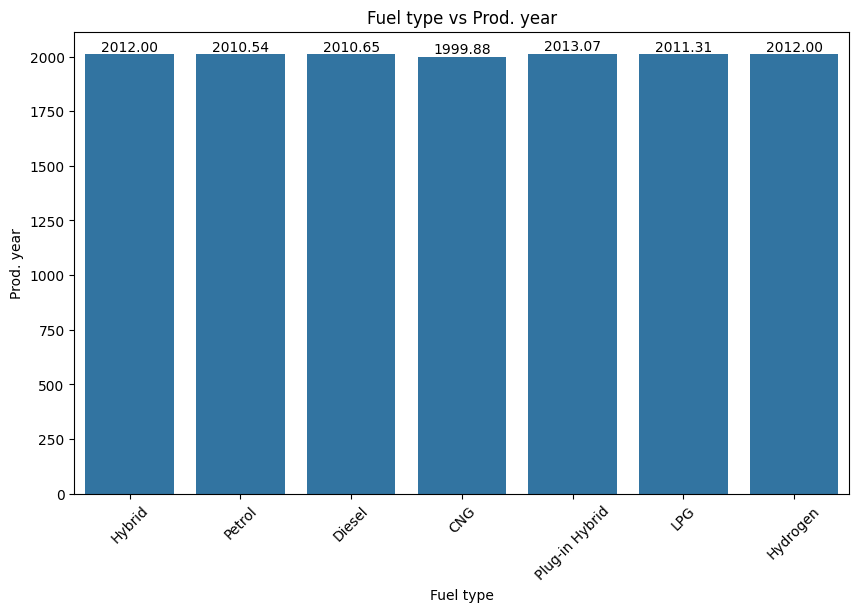

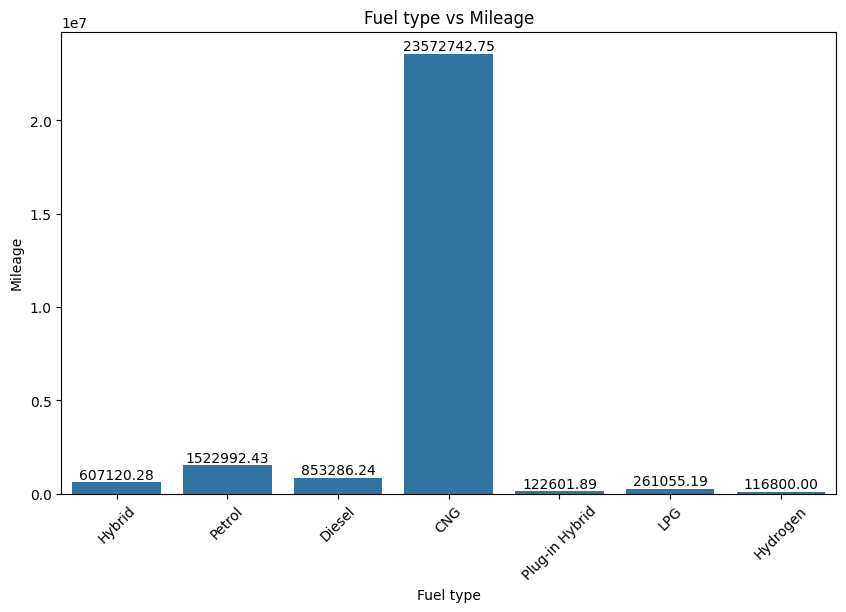

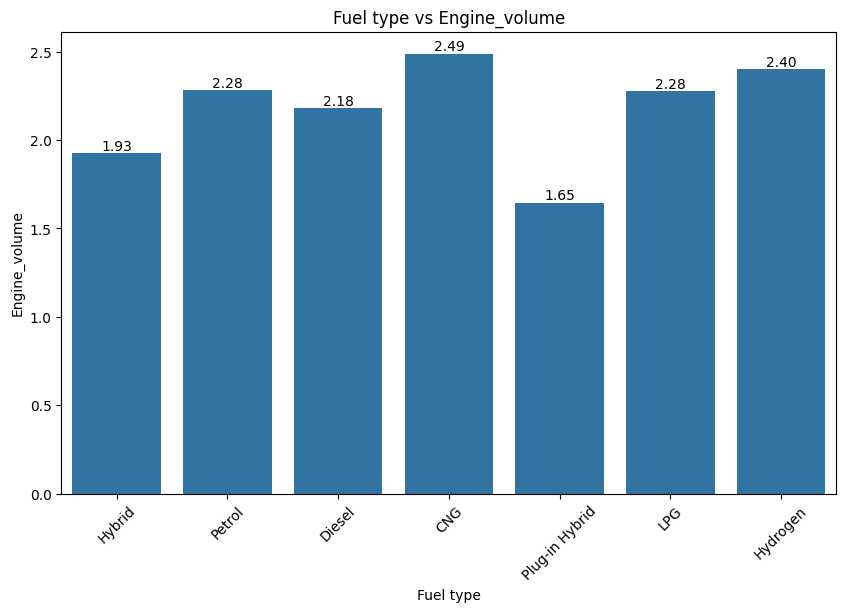

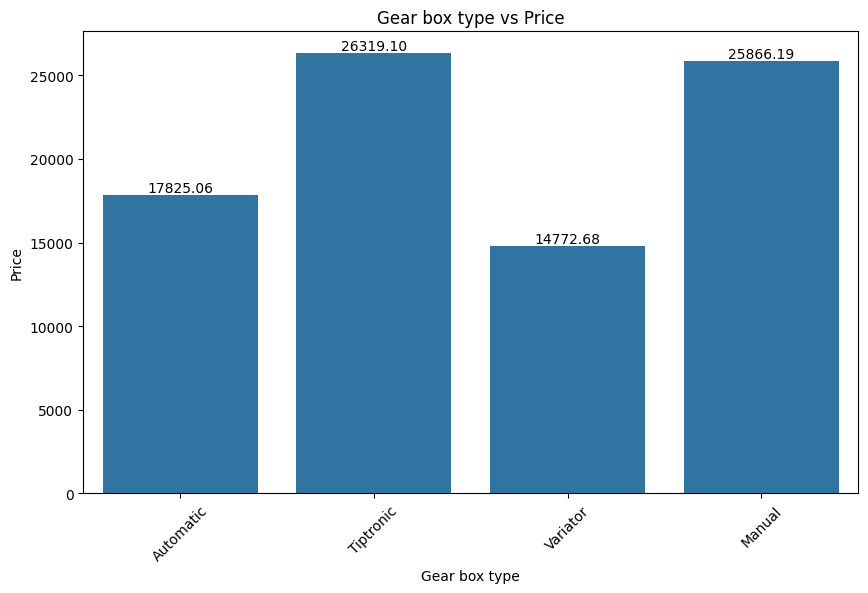

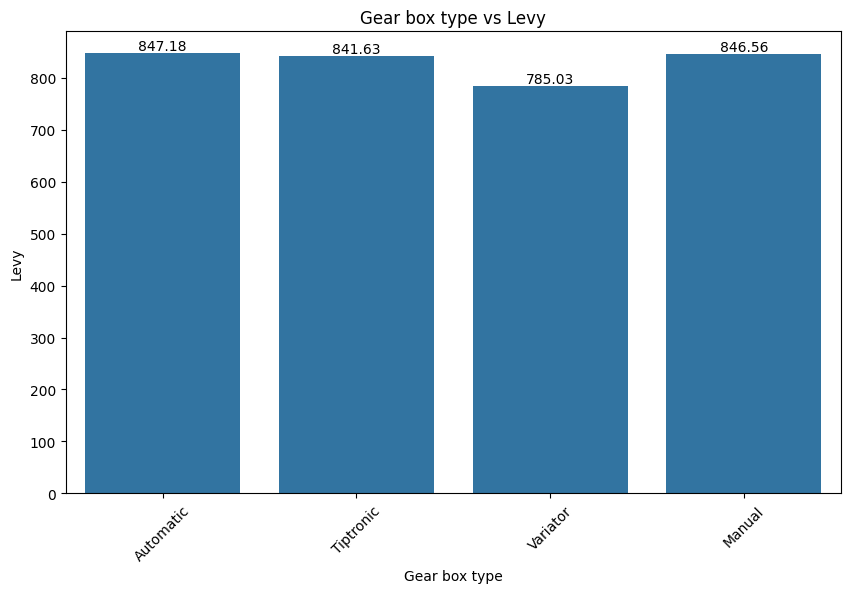

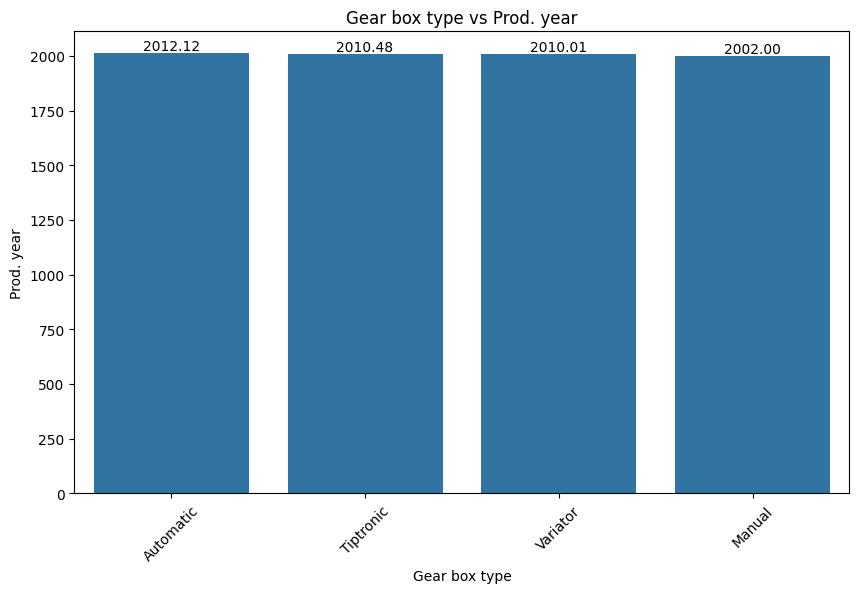

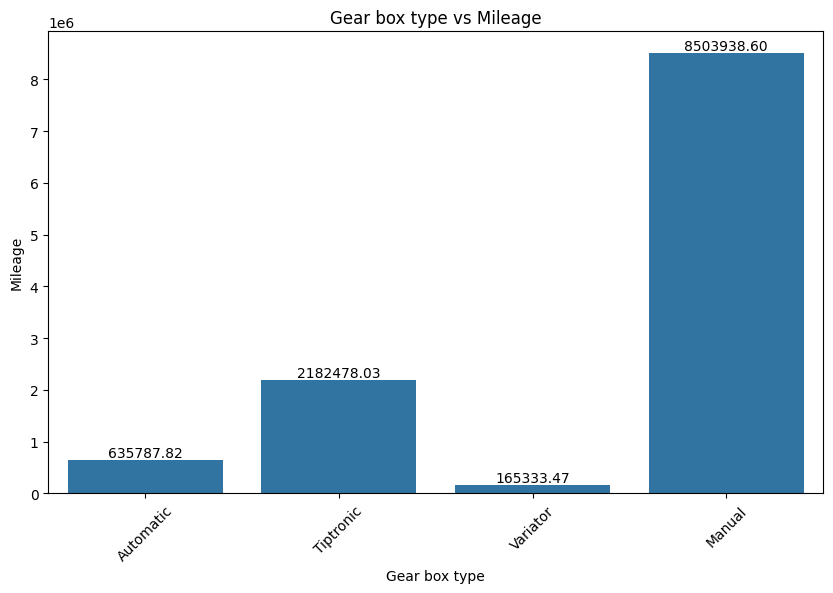

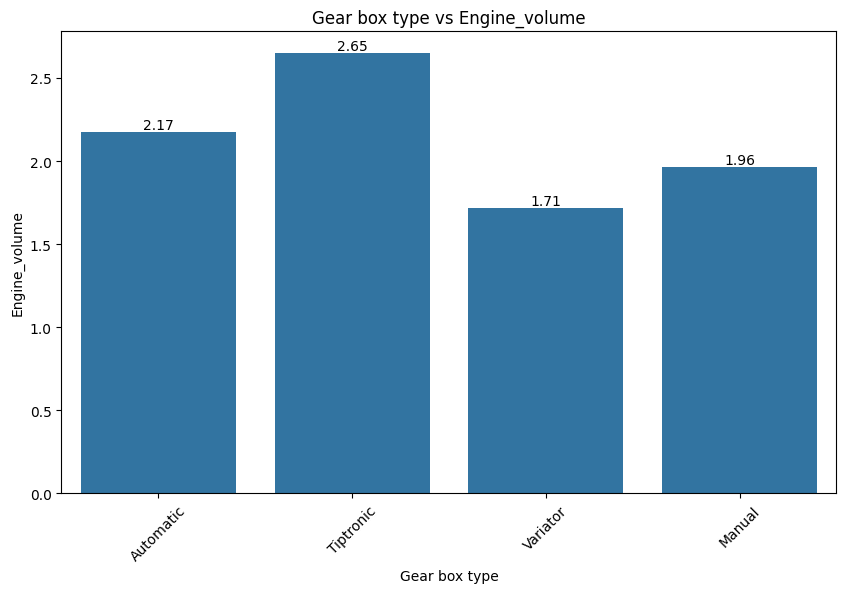

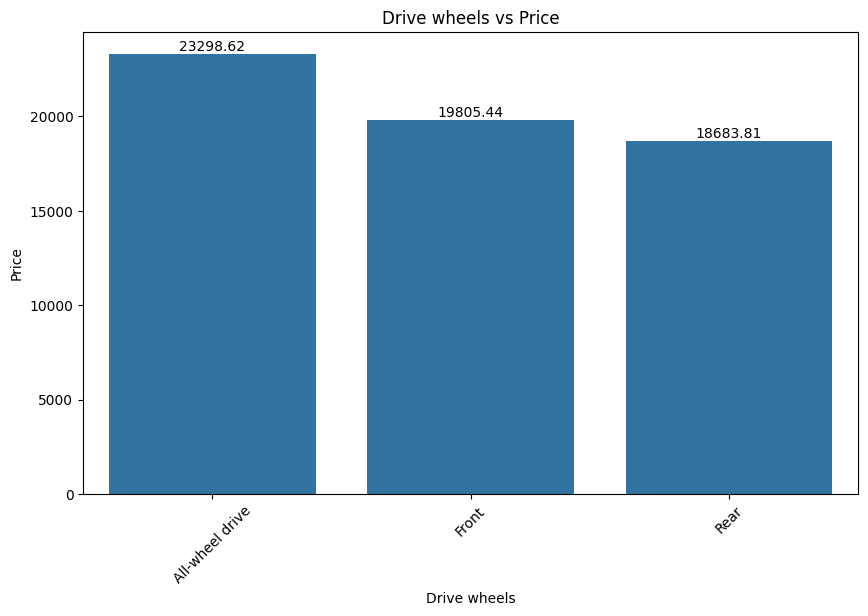

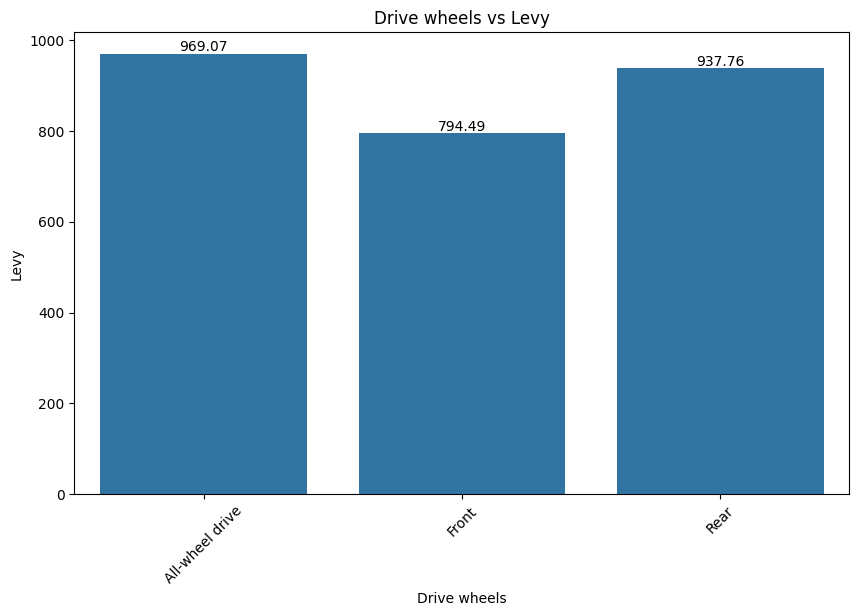

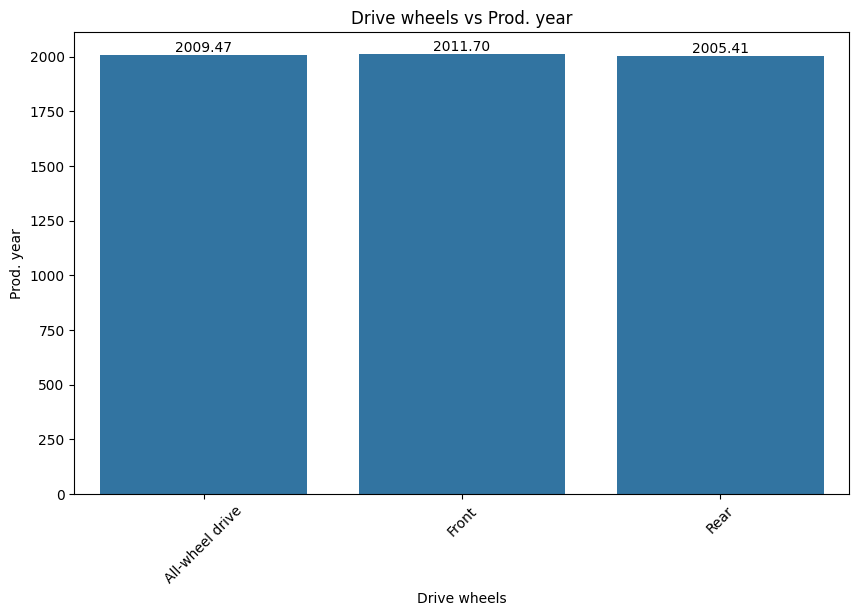

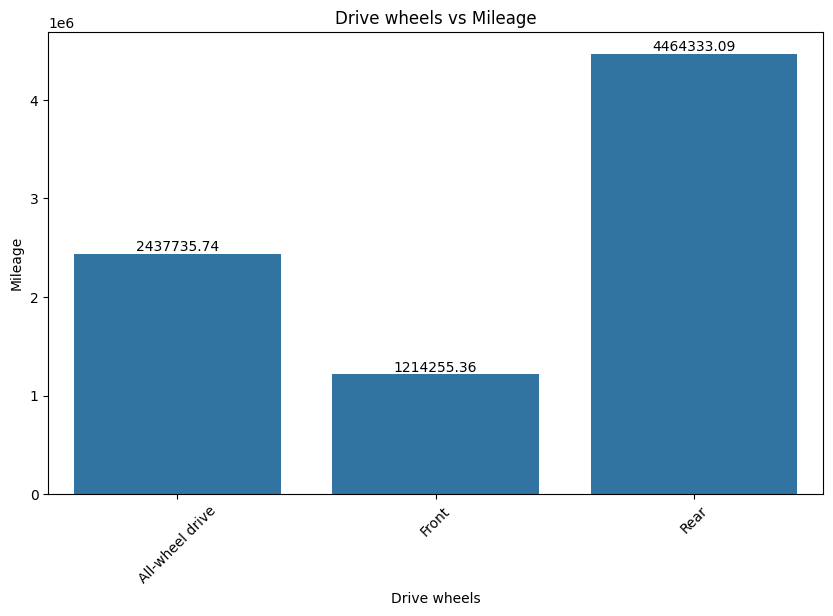

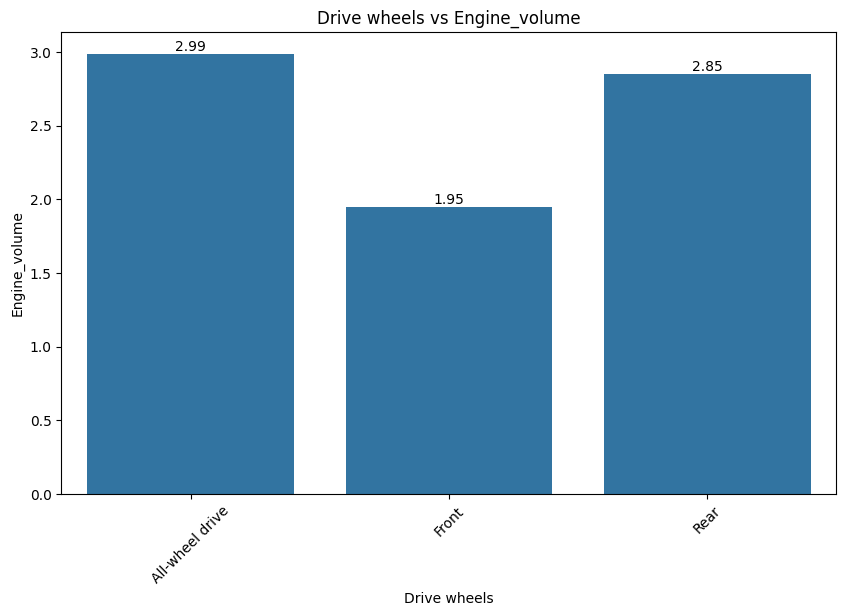

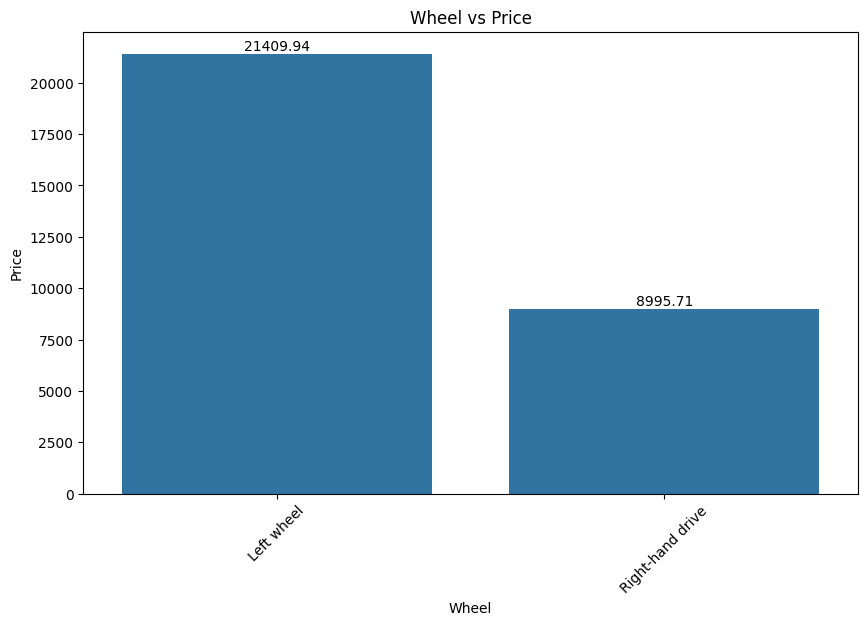

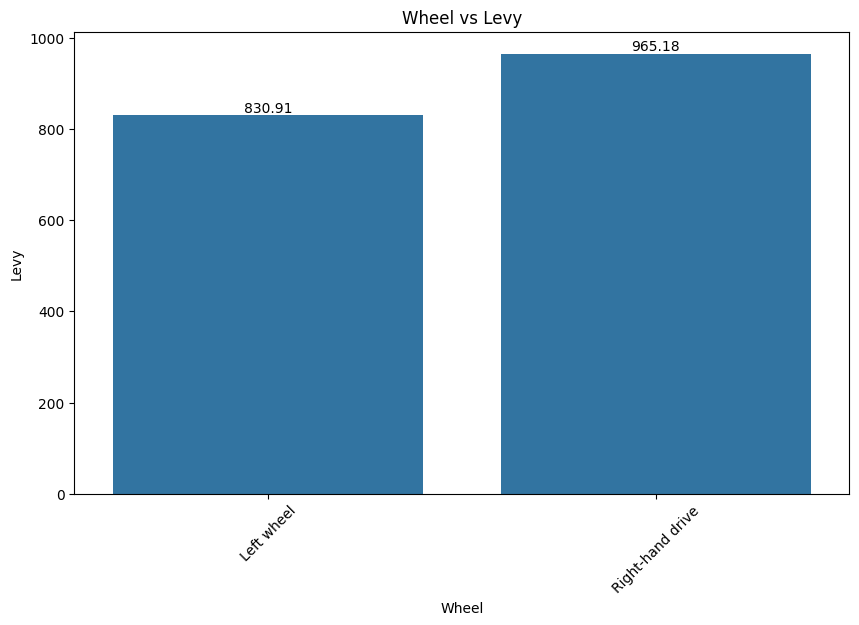

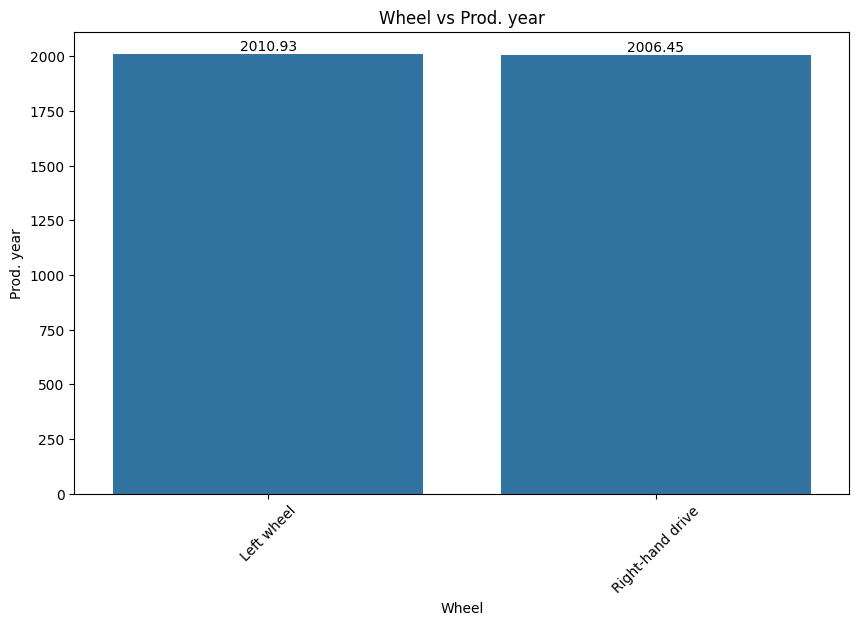

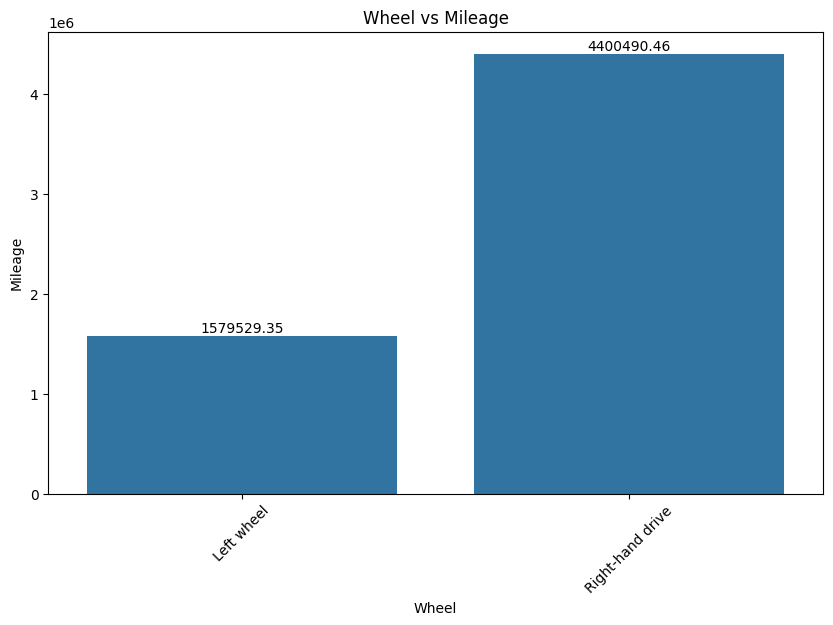

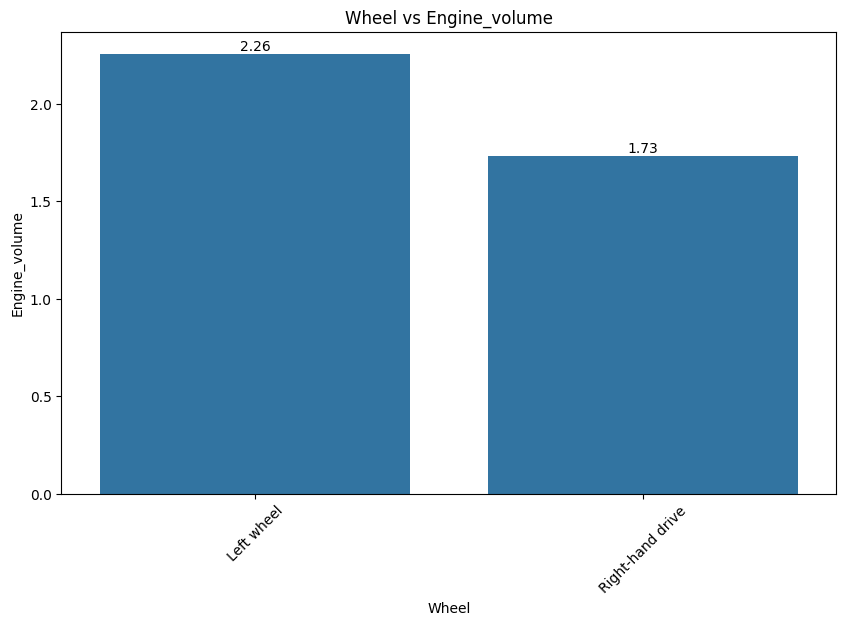

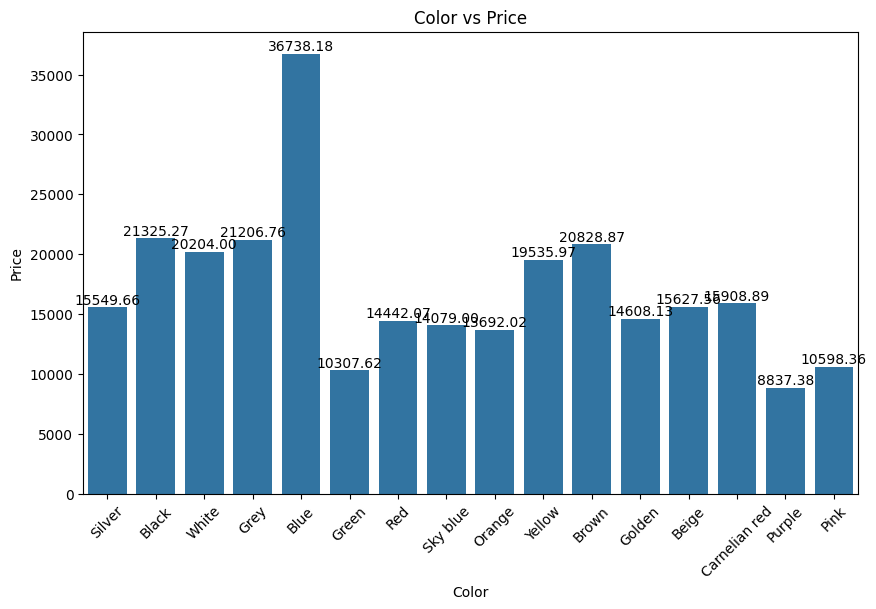

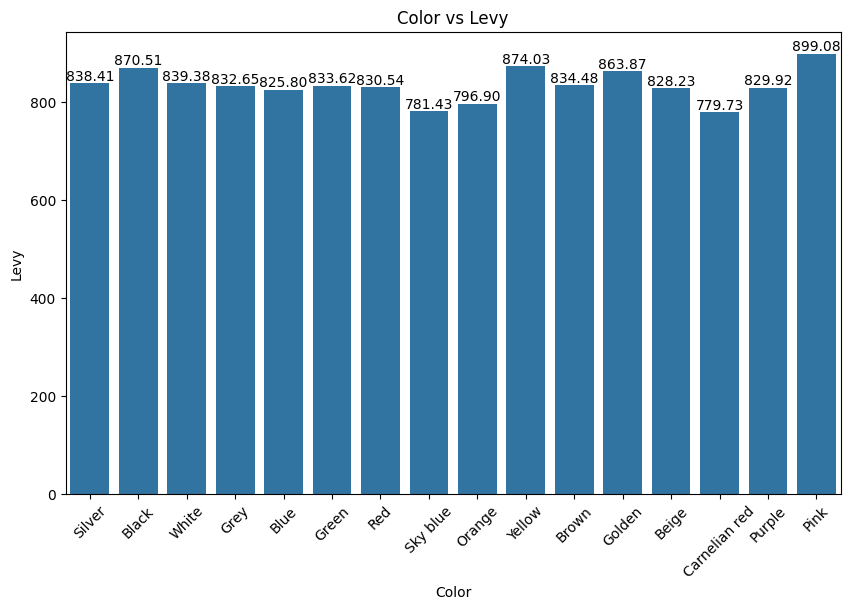

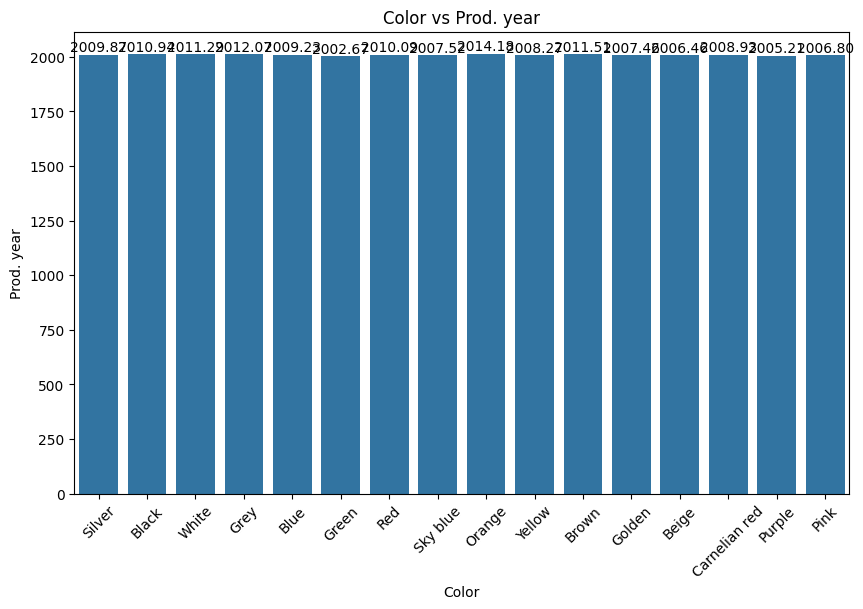

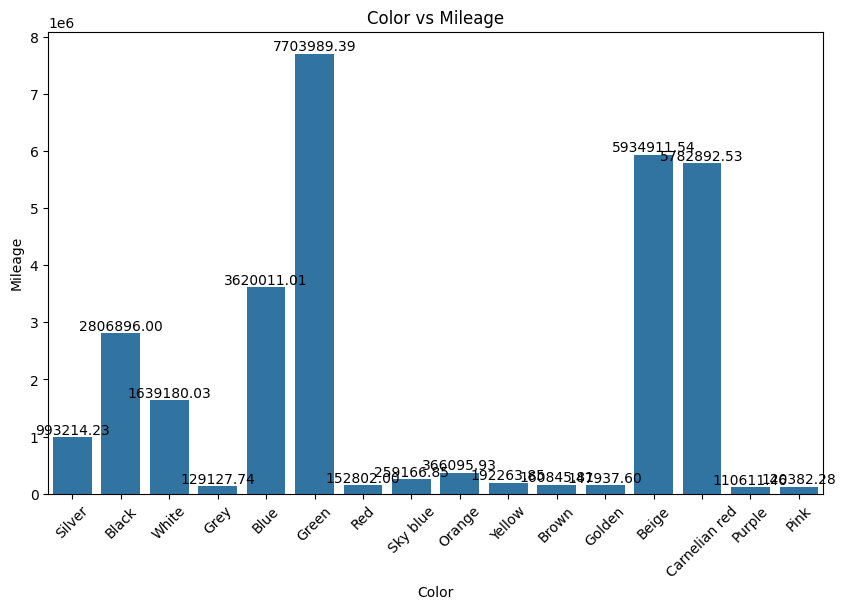

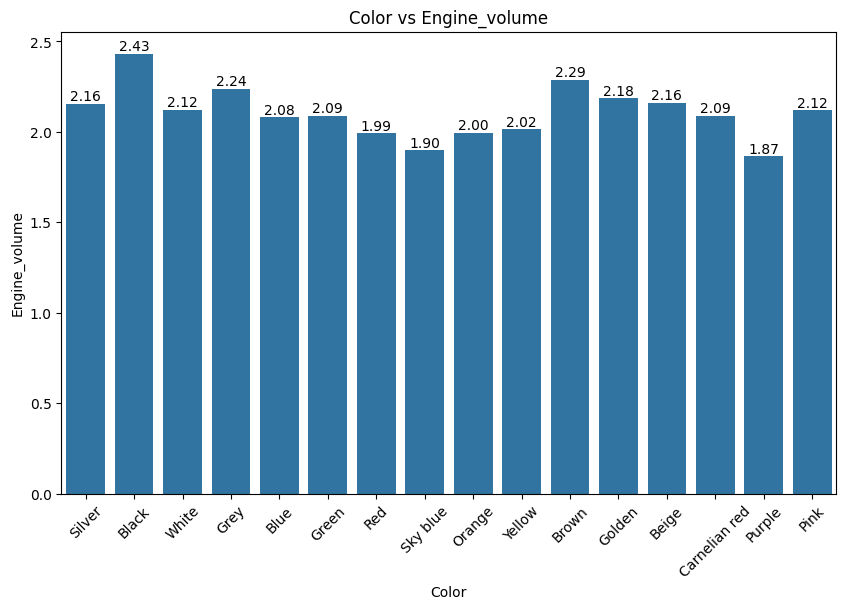

In [ ]:
## Categorical vs Continuous (barplot)
for cat in categorical:
    for cont in continuous:
        plt.figure(figsize=(10, 6))
        ax = sns.barplot(data=df, x=cat, y=cont, ci=None)
        plt.title(f'{cat} vs {cont}')

        for p in ax.patches:
            height = p.get_height()
            ax.annotate(f'{height:.2f}', (p.get_x() + p.get_width() / 2., height),
                        ha='center', va='bottom', fontsize=10, color='black', rotation=0)
        plt.xticks(rotation = 45)
        plt.show()

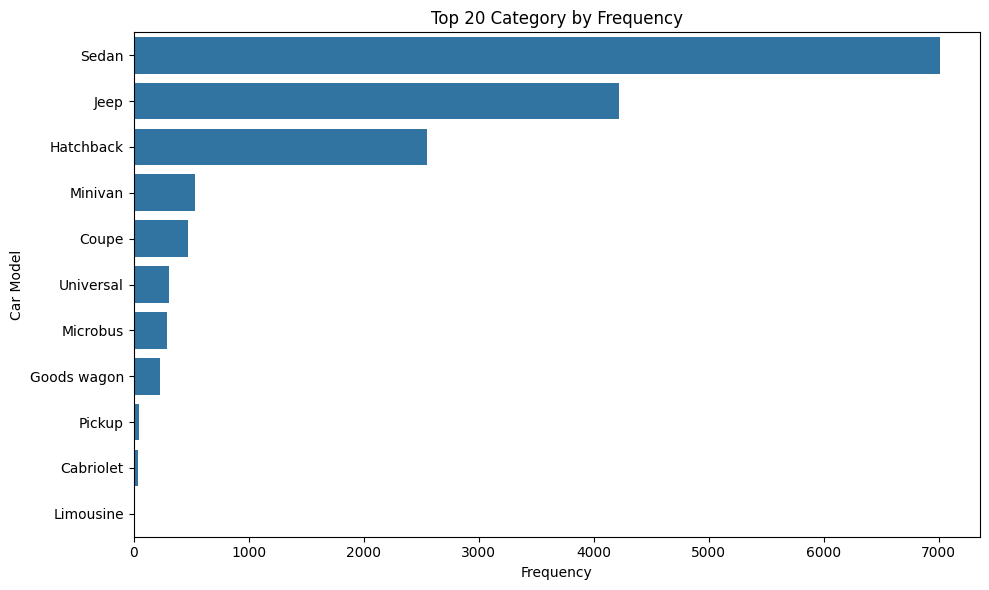

In [34]:
n = 20
category_models = df['Category'].value_counts().head(n)

plt.figure(figsize=(10, 6))
sns.barplot(x=category_models.values, y=category_models.index)
plt.title(f'Top {n} Category by Frequency')
plt.xlabel('Frequency')
plt.ylabel('Car Model')
plt.tight_layout()
plt.show()

In [35]:
max_prices_by_car = df.groupby('Category')[['Price', 'Levy']].max().sort_values(by = 'Price', ascending = False)
print(max_prices_by_car)

                Price     Levy
Category                      
Goods wagon  26307500   3811.0
Universal      872946   5679.0
Jeep           627220   7536.0
Coupe          308906   4860.0
Sedan          288521  11714.0
Pickup         116036   3910.0
Minivan        106668   7063.0
Microbus        95000   2080.0
Cabriolet       86142   5877.0
Hatchback       78829   3141.0
Limousine       30420    779.0


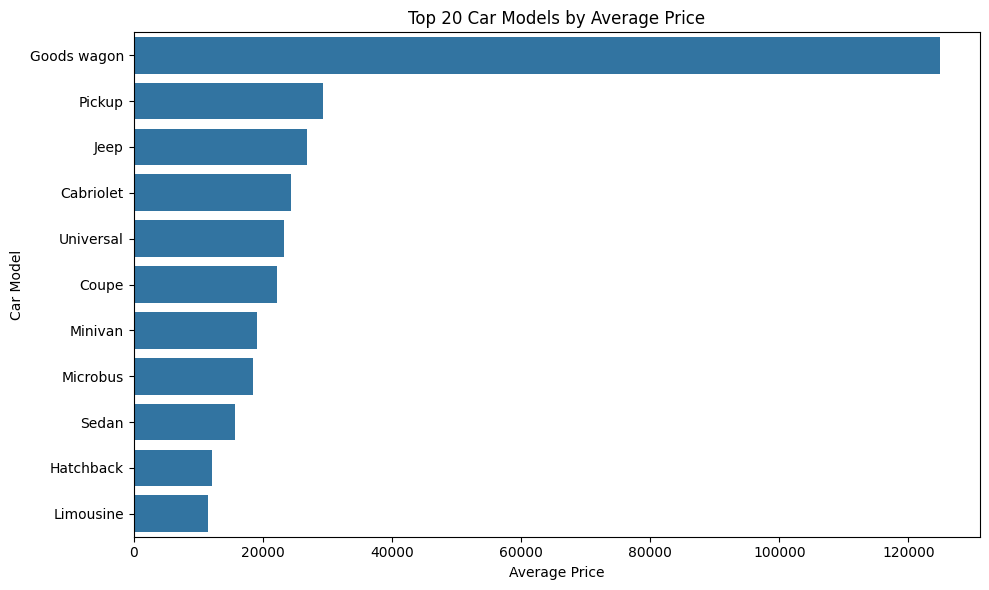

In [36]:
avg_prices_by_car = df.groupby('Category')['Price'].mean().sort_values(ascending = False)
top_car_models = avg_prices_by_car.head(n)

plt.figure(figsize = (10, 6))
sns.barplot(x = top_car_models.values, y = top_car_models.index)
plt.title(f'Top {n} Car Models by Average Price')
plt.xlabel('Average Price')
plt.ylabel('Car Model')
plt.tight_layout()
plt.show()

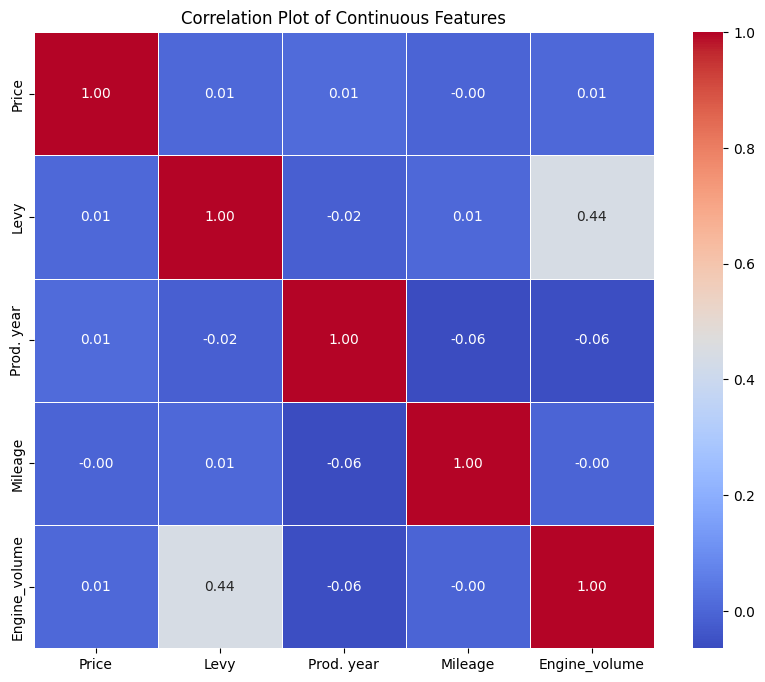

In [ ]:
corr_matrix = df[continuous].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Plot of Continuous Features')
plt.show()

In [37]:
df.drop('Manufacturer', axis = 1, inplace = True)
df.drop('Model', axis = 1, inplace = True)

In [38]:
object_types = ['Category', 'Leather interior', 'Fuel type',
       'Gear box type', 'Drive wheels', 'Wheel', 'Color']

In [39]:
df_dummies = pd.get_dummies(df[object_types])
df_dummies

Category_Cabriolet  Category_Coupe  Category_Goods wagon  \
0                   False           False                 False   
1                   False           False                 False   
2                   False           False                 False   
3                   False           False                 False   
4                   False           False                 False   
...                   ...             ...                   ...   
19230               False           False                 False   
19232               False            True                 False   
19233               False           False                 False   
19234               False           False                 False   
19236               False           False                 False   

       Category_Hatchback  Category_Jeep  Category_Limousine  \
0                   False           True               False   
1                   False           True               False   
2                    True          False               False   
3                   False           True               False   
4                    True          False               False   
...                   ...            ...                 ...   
19230                True          False               False   
19232               False          False               False   
19233               False          False               False   
19234               False           True               False   
19236               False          False               False   

       Category_Microbus  Category_Minivan  Category_Pickup  Category_Sedan  \
0                  False             False            False           False   
1                  False             False            False           False   
2                  False             False            False           False   
3                  False             False            False           False   
4                  False             False            False           False   
...                  ...               ...              ...             ...   
19230              False             False            False           False   
19232              False             False            False           False   
19233              False             False            False            True   
19234              False             False            False           False   
19236              False             False            False            True   

       ...  Color_Green  Color_Grey  Color_Orange  Color_Pink  Color_Purple  \
0      ...        False       False         False       False         False   
1      ...        False       False         False       False         False   
2      ...        False       False         False       False         False   
3      ...        False       False         False       False         False   
4      ...        False       False         False       False         False   
...    ...          ...         ...           ...         ...           ...   
19230  ...        False       False         False       False         False   
19232  ...        False       False         False       False         False   
19233  ...        False       False         False       False         False   
19234  ...        False        True         False       False         False   
19236  ...        False       False         False       False         False   

       Color_Red  Color_Silver  Color_Sky blue  Color_White  Color_Yellow  
0          False          True           False        False         False  
1          False         False           False        False         False  
2          False         False           False        False         False  
3          False         False           False         True         False  
4          False          True           False        False         False  
...          ...           ...             ...          ...           ...  
192

In [40]:
## Make the values of  colour as other except for ['Black', 'White', 'Silver'] to reduce the number of dummies
colors = ['Black', 'White', 'Silver']
for col in df['Color']:
  if col not in colors:
    df['Color'].replace(col, 'Other', inplace = True)

In [41]:
color_dummies = pd.get_dummies(df['Color'])
color_dummies

Black  Other  Silver  White
0      False  False    True  False
1       True  False   False  False
2       True  False   False  False
3      False  False   False   True
4      False  False    True  False
...      ...    ...     ...    ...
19230  False  False    True  False
19232  False  False    True  False
19233  False   True   False  False
19234  False   True   False  False
19236  False  False   False   True

[15725 rows x 4 columns]

In [42]:
df_dummies = pd.get_dummies(df[object_types])
df_dummies

Category_Cabriolet  Category_Coupe  Category_Goods wagon  \
0                   False           False                 False   
1                   False           False                 False   
2                   False           False                 False   
3                   False           False                 False   
4                   False           False                 False   
...                   ...             ...                   ...   
19230               False           False                 False   
19232               False            True                 False   
19233               False           False                 False   
19234               False           False                 False   
19236               False           False                 False   

       Category_Hatchback  Category_Jeep  Category_Limousine  \
0                   False           True               False   
1                   False           True               False   
2                    True          False               False   
3                   False           True               False   
4                    True          False               False   
...                   ...            ...                 ...   
19230                True          False               False   
19232               False          False               False   
19233               False          False               False   
19234               False           True               False   
19236               False          False               False   

       Category_Microbus  Category_Minivan  Category_Pickup  Category_Sedan  \
0                  False             False            False           False   
1                  False             False            False           False   
2                  False             False            False           False   
3                  False             False            False           False   
4                  False             False            False           False   
...                  ...               ...              ...             ...   
19230              False             False            False           False   
19232              False             False            False           False   
19233              False             False            False            True   
19234              False             False            False           False   
19236              False             False            False            True   

       ...  Gear box type_Variator  Drive wheels_All-wheel drive  \
0      ...                   False                          True   
1      ...                   False                          True   
2      ...                    True                         False   
3      ...                   False                          True   
4      ...                   False                         False   
...    ...                     ...                           ...   
19230  ...                   False                         False   
19232  ...                   False                         False   
19233  ...                   False                         False   
19234  ...                   False                         False   
19236  ...                   False                         False   

       Drive wheels_Front  Drive wheels_Rear  Wheel_Left wheel  \
0                   False              False              True   
1                   False              False              True   
2                    True              False             False   
3                   False              False              True   
4                    True              False              True   
...                   ...                ...               ...   
19230                True              False              True   
19232               False               True              True   
19233                True              False              True   
19234  

In [43]:
df.shape

(15725, 15)

In [44]:
df.columns

Index(['Price', 'Levy', 'Prod. year', 'Category', 'Leather interior',
       'Fuel type', 'Engine volume', 'Mileage', 'Cylinders', 'Gear box type',
       'Drive wheels', 'Wheel', 'Color', 'Airbags', 'Engine_volume'],
      dtype='object')

In [45]:
df_final = pd.concat([df.drop(object_types, axis = 1),  df_dummies],  axis = 1)
df_final.shape

(15725, 41)

In [46]:
df_final.head()

Price    Levy  Prod. year Engine volume  Mileage  Cylinders  Airbags  \
0  13328  1399.0        2010           3.5   186005          6       12   
1  16621  1018.0        2011             3   192000          6        8   
2   8467   779.0        2006           1.3   200000          4        2   
3   3607   862.0        2011           2.5   168966          4        0   
4  11726   446.0        2014           1.3    91901          4        4   

   Engine_volume  Category_Cabriolet  Category_Coupe  ...  \
0            3.5               False           False  ...   
1            3.0               False           False  ...   
2            1.3               False           False  ...   
3            2.5               False           False  ...   
4            1.3               False           False  ...   

   Gear box type_Variator  Drive wheels_All-wheel drive  Drive wheels_Front  \
0                   False                          True               False   
1                   False                          True               False   
2                    True                         False                True   
3                   False                          True               False   
4                   False                         False                True   

   Drive wheels_Rear  Wheel_Left wheel  Wheel_Right-hand drive  Color_Black  \
0              False              True                   False        False   
1              False              True                   False         True   
2              False             False                    True         True   
3              False              True                   False        False   
4              False              True                   False        False   

   Color_Other  Color_Silver  Color_White  
0        False          True        False  
1        False         False        False  
2        False         False        False  
3        False         False         True  
4        False          True        False  

[5 rows x 41 columns]

In [47]:
data_final = df_final.copy()

In [48]:
for feature in continuous :
  data_final[feature + '_log'] = np.log(df_final[feature] + 1)

In [49]:
data_final.drop(['Price', 'Levy', 'Prod. year', 'Engine volume', 'Mileage'], axis = 1, inplace = True)

In [53]:
## Apply a regression model and normalize it .
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

In [51]:
X = data_final.drop('Price_log', axis = 1)
y = data_final['Price_log']

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [54]:
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

LinearRegression()

In [55]:
y_pred = linear_model.predict(X_test)
mse = mean_squared_error(y_pred, y_test)
print(mse)

1.815463904058693


##Regression Analysis

In [56]:
## The relationship between independent and dependent variables is regression.
## The goal of linear regression to to find the values of parameters beta0 and beta1 such that the mean squared error will be minimum.

In [57]:
## Assumptions neede to follow in Linear regression

## 1.*Independent variables should be linearly releted to dependent.
## 2.*Every feature in the data is normally distributed.
## 3.*There should be little or no multi-collinearity in the data.
## 4. The mean of the error or residual be zero.
## 5. Residuals obtained shouldbe normally distributed.
## 6. Varaince & Residual should be same throughout the data. This is known as "Homoscedasticity".



In [58]:
from sklearn.linear_model import Ridge

ridge_model = Ridge(alpha = 1.0)
ridge_model.fit(X_train, y_train)

y_pred_ridge = ridge_model.predict(X_test)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
print(mse_ridge)

1.911055975022568
